<div style="text-align: center;">
    <img src="https://d26a57ydsghvgx.cloudfront.net/latam/Customer-Stories/Gocase/new-logo-gocase.png" alt="Logo Gocase" width="500"/>
</div>


<h1>Business Case📄<h1>



<h4>Contexto<h4>

<p>
A Gocase é uma marca que se destaca no mercado de acessórios personalizados, com foco em design refinado e funcionalidade diária. Fundada em 2015, a empresa é hoje o maior e-commerce de capas de telefone e acessórios no Brasil, e está em processo de expansão internacional, com operações em mais de 150 países e escritórios no Brasil e na Holanda.

Com uma forte presença online, a Gocase busca consolidar sua liderança global e também expandir suas operações no mundo offline, explorando novas oportunidades B2B. A empresa já conquistou uma base sólida de clientes, com mais de dois milhões de fãs online, e agora enfrenta o desafio de otimizar seus investimentos em campanhas de marketing digital, principalmente através do Facebook ADS.
<p>

<h4>Objetivo<h4>

<p>
Analisar uma planilha de extratos de campanhas de ADS, agrupadas por plataforma, idade e país, para decidir onde investir 10.000 euros em cada categoria, maximizando o retorno.

**Etapas da análise:**

1. Plataforma: Identificar onde o investimento pode gerar mais impacto.
2. Idade: Determinar a faixa etária com maior potencial.
3. País: Avaliar quais países oferecem melhor retorno.

<p>

<h2>Pacotes e bibliotecas<h2>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import os
import requests

import seaborn as sns
import plotly.express as px
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans


from PIL import Image
from wordcloud import WordCloud
from nltk.corpus import stopwords

<h2>ETL<h2>

<h4>1. Extração <h4>

In [2]:
# Define a função "excel_to_csv" que transforma o arquivo .xlsx em .csv
def excel_to_csv(excel_file):
    # Lê todas as sheets do Excel
    sheets = pd.read_excel(excel_file, sheet_name=None)

    # Caminho onde os arquivos CSV serão salvos
    path_output = 'C:/Users/Matheus Rodrigues/OneDrive/Área de Trabalho/Gocase/data/raw'

    # Para cada sheet (nome e conteúdo), salva em um CSV
    for sheet_name, data in sheets.items():
        # Define o nome do arquivo CSV usando o nome da sheet
        csv_file = os.path.join(path_output, f'{sheet_name}.csv')
         # Salva o DataFrame como CSV
        data.to_csv(csv_file, index=False) 
        print(f'Sheet "{sheet_name}" salva como {csv_file}')


In [3]:
excel_file_path = 'C:/Users/Matheus Rodrigues/OneDrive/Área de Trabalho/Gocase/data/raw/data-geral.xlsx' 

# Carrega os dados do arquivo .xlsx em .csv
excel_to_csv(excel_file_path) 


Sheet "BY PLATFORM" salva como C:/Users/Matheus Rodrigues/OneDrive/Área de Trabalho/Gocase/data/raw\BY PLATFORM.csv
Sheet "Pivot By Platform" salva como C:/Users/Matheus Rodrigues/OneDrive/Área de Trabalho/Gocase/data/raw\Pivot By Platform.csv
Sheet "BY COUNTRY" salva como C:/Users/Matheus Rodrigues/OneDrive/Área de Trabalho/Gocase/data/raw\BY COUNTRY.csv
Sheet "BY AGE" salva como C:/Users/Matheus Rodrigues/OneDrive/Área de Trabalho/Gocase/data/raw\BY AGE.csv
Sheet "Pivot By Age" salva como C:/Users/Matheus Rodrigues/OneDrive/Área de Trabalho/Gocase/data/raw\Pivot By Age.csv


In [4]:
# Define a função "csv_to_dataframe" que transforma o arquivo .csv em datafranes
def csv_to_dataframe(csv_file):
    # Lê o arquivo CSV e retorna como DataFrame
    df = pd.read_csv(csv_file)
    return df

In [5]:
# Define os caminhoo do arquivoo CSVs localizados na pasta 'raw' em variáveis
PATH_BY_AGE = 'C:/Users/Matheus Rodrigues/OneDrive/Área de Trabalho/Gocase/data/raw/BY AGE.csv'
PATH_BY_COUNTRY = 'C:/Users/Matheus Rodrigues/OneDrive/Área de Trabalho/Gocase/data/raw/BY COUNTRY.csv'
PATH_BY_PLATFORM = 'C:/Users/Matheus Rodrigues/OneDrive/Área de Trabalho/Gocase/data/raw/BY PLATFORM.csv'

# Carrega os dados de cada arquivo CSV em um DataFrame do Pandas
by_age_df = csv_to_dataframe(PATH_BY_AGE)
by_country_df = csv_to_dataframe(PATH_BY_COUNTRY)
by_platform_df = csv_to_dataframe(PATH_BY_PLATFORM)

<h4>2. Transformação<h4>

2.1 Conhecendo os dados

In [6]:
by_age_df.head()

,Ad Set Name,Age,Result Rate,Result Indicator,Results,Reach,Frequency,Link Clicks,CPC (Link) (USD),CPC (All) (USD),"Cost per 1,000 People Reached (USD)",CTR (All),Add to Cart (Facebook Pixel),Cost per Add To Cart (Facebook Pixel) (USD),Initiate Checkout (Facebook Pixel),Cost per Initiate Checkout (Facebook Pixel) (USD),Purchase (Facebook Pixel),Cost per Purchase (Facebook Pixel) (USD),Amount Spent (USD),Purchase Conversion Value (Facebook Pixel)
0,"LC Cart-Conversion 23/03/2017 (18-35, Europe+W...",18-24,0.0,-,0,65,1.061538,1,0.19,0.0475,2.923077,0.057971,0,0.0,0,0.0,0,0.0,0.19,0.0
1,"LC Cart-Conversion 23/03/2017 (18-35, Europe+W...",25-34,0.0,-,0,60,1.016667,1,0.17,0.1700,2.833333,0.016393,0,0.0,0,0.0,0,0.0,0.17,0.0
2,"LC Cart-Conversion 23/03/2017 (18-35, Europe+W...",35-44,0.0,-,0,3,1.000000,0,0.00,0.0000,0.000000,0.000000,0,0.0,0,0.0,0,0.0,0.00,0.0
3,"LC Cart-Conversion 23/03/2017 (Europe+WW, Luxu...",18-24,0.0,-,0,68,1.000000,0,0.00,0.2500,3.676471,0.014706,0,0.0,0,0.0,0,0.0,0.25,0.0
4,"LC Cart-Conversion 23/03/2017 (Europe+WW, Luxu...",25-34,0.0,-,0,41,1.000000,0,0.00,0.0000,3.902439,0.000000,0,0.0,0,0.0,0,0.0,0.16,0.0


In [7]:
by_age_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11677 entries, 0 to 11676
Data columns (total 20 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Ad Set Name                                        4647 non-null   object 
 1   Age                                                4647 non-null   object 
 2   Result Rate                                        4647 non-null   float64
 3   Result Indicator                                   11677 non-null  object 
 4   Results                                            11677 non-null  int64  
 5   Reach                                              11677 non-null  int64  
 6   Frequency                                          11677 non-null  float64
 7   Link Clicks                                        11677 non-null  int64  
 8   CPC (Link) (USD)                                   11677 non-null  float64
 9   CPC (A

In [8]:
# Checa a quantidade de valores únicos dos conjuntos de anúncios em "by_age_df"
by_age_unique = len(by_age_df['Ad Set Name'].unique())
print(by_age_unique)

1072


In [9]:
by_country_df.head()

,Ad Set Name,Country,Result Rate,Result Indicator,Results,Reach,Frequency,Link Clicks,CPC (Link) (USD),CPC (All) (USD),"Cost per 1,000 People Reached (USD)",CTR (All),Add to Cart (Facebook Pixel),Cost per Add To Cart (Facebook Pixel) (USD),Initiate Checkout (Facebook Pixel),Cost per Initiate Checkout (Facebook Pixel) (USD),Purchase (Facebook Pixel),Cost per Purchase (Facebook Pixel) (USD),Amount Spent (USD),Purchase Conversion Value (Facebook Pixel)
0,"LC Engagement 05/02/2017 (13-65+, WW, Instagram)",GU,0.159646,actions:post_engagement,379,1533,1.548598,6,0.005000,0.001364,0.019569,0.009267,10,0.003,1,0.03,1,0.03,0.03,24.90
1,"LC Engagement 29/08/2016 (13-65+, WW, Hearts)",ES,0.046080,actions:post_engagement,191,4095,1.012210,6,0.005000,0.000136,0.007326,0.053317,3,0.010,1,0.03,1,0.03,0.03,24.90
2,"LC Engagement 29/08/2016 (13-65+, WW, Hearts)",SK,0.078705,actions:post_engagement,282,3071,1.166721,34,0.001176,0.000132,0.013025,0.084287,2,0.020,1,0.04,1,0.04,0.04,29.40
3,"LC Engagement 29/08/2016 (13-65+, WW, Hearts) ...",CW,0.139437,actions:post_engagement,198,1023,1.388074,15,0.004000,0.004286,0.058651,0.009859,2,0.030,1,0.06,1,0.06,0.06,47.43
4,Viewed - 1 day - Rest of the World,AL,0.147059,actions:offsite_conversion,5,16,2.125000,0,0.000000,0.035000,4.375000,0.058824,1,0.070,1,0.07,1,0.07,0.07,21.90


In [10]:
by_country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11677 entries, 0 to 11676
Data columns (total 20 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Ad Set Name                                        11677 non-null  object 
 1   Country                                            11655 non-null  object 
 2   Result Rate                                        11677 non-null  float64
 3   Result Indicator                                   11677 non-null  object 
 4   Results                                            11677 non-null  int64  
 5   Reach                                              11677 non-null  int64  
 6   Frequency                                          11677 non-null  float64
 7   Link Clicks                                        11677 non-null  int64  
 8   CPC (Link) (USD)                                   11677 non-null  float64
 9   CPC (A

In [11]:
# Checa a quantidade de valores únicos dos conjuntos de anúncios em "by_country_df"
by_county_unique = len(by_country_df['Ad Set Name'].unique())
print(by_county_unique)

1071


In [12]:
by_platform_df.head()

,Ad Set Name,Platform,Result Rate,Result Indicator,Results,Reach,Frequency,Link Clicks,CPC (Link) (USD),CPC (All) (USD),"Cost per 1,000 People Reached (USD)",CTR (All),Add to Cart (Facebook Pixel),Cost per Add To Cart (Facebook Pixel) (USD),Initiate Checkout (Facebook Pixel),Cost per Initiate Checkout (Facebook Pixel) (USD),Purchase (Facebook Pixel),Cost per Purchase (Facebook Pixel) (USD),Amount Spent (USD),Purchase Conversion Value (Facebook Pixel)
0,"LC Cart-Conversion 23/03/2017 (18-35, Europe+W...",Facebook,0.0,-,0,91,1.043956,2,0.110000,0.044000,2.417582,0.052632,0,0.000000,0,0.00,0,0.0,0.22,0.0
1,"LC Cart-Conversion 23/03/2017 (Europe+WW, Luxu...",Facebook,0.0,-,0,76,1.000000,0,0.000000,0.290000,3.815789,0.013158,0,0.000000,0,0.00,0,0.0,0.29,0.0
2,"LC Cart-Conversion 23/03/2017 (Europe+WW, Luxu...",Facebook,0.0,-,0,114,1.105263,1,0.440000,0.073333,3.859649,0.047619,0,0.000000,0,0.00,0,0.0,0.44,0.0
3,"LC Cart-Conversion 23/03/2017 (18-35, Europe+W...",Facebook,0.0,-,0,139,1.014388,0,0.000000,0.133333,2.877698,0.021277,0,0.000000,0,0.00,0,0.0,0.40,0.0
4,"LC Conversion 23/03/2017 (18-35, Europe+WW, In...",Facebook,0.0,-,0,134,1.007463,6,0.076667,0.046000,3.432836,0.074074,6,0.076667,1,0.46,0,0.0,0.46,0.0


In [13]:
by_platform_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1619 entries, 0 to 1618
Data columns (total 20 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Ad Set Name                                        1619 non-null   object 
 1   Platform                                           1619 non-null   object 
 2   Result Rate                                        1619 non-null   float64
 3   Result Indicator                                   1619 non-null   object 
 4   Results                                            1619 non-null   int64  
 5   Reach                                              1619 non-null   int64  
 6   Frequency                                          1619 non-null   float64
 7   Link Clicks                                        1619 non-null   int64  
 8   CPC (Link) (USD)                                   1619 non-null   float64
 9   CPC (All

In [14]:
# Checa a quantidade de valores únicos dos conjuntos de anúncios em "by_platform_df"
by_platform_unique = len(by_platform_df['Ad Set Name'].unique())
print(by_platform_unique)

1071


refazer dict columns

In [15]:
data_dictionary = {
    "Ad Set Name": {
        "dtype": "object",
        "description": "Nome do conjunto de anúncios."
    },
    "Country": {
        "dtype": "object",
        "description": "País onde os anúncios foram exibidos."
    },
    "Result Rate": {
        "dtype": "float64",
        "description": "Taxa de resultados gerados pelos anúncios."
    },
    "Result Indicator": {
        "dtype": "object",
        "description": "Indicador que representa o tipo de resultado obtido (ex: cliques, conversões)."
    },
    "Results": {
        "dtype": "int64",
        "description": "Número total de resultados alcançados com os anúncios."
    },
    "Reach": {
        "dtype": "int64",
        "description": "Número de pessoas únicas que visualizaram os anúncios."
    },
    "Frequency": {
        "dtype": "float64",
        "description": "Número médio de vezes que cada pessoa viu os anúncios."
    },
    "Link Clicks": {
        "dtype": "int64",
        "description": "Número total de cliques no link dos anúncios."
    },
    "CPC (Link) (USD)": {
        "dtype": "float64",
        "description": "Custo por clique em links, em dólares americanos."
    },
    "CPC (All) (USD)": {
        "dtype": "float64",
        "description": "Custo por clique em geral, em dólares americanos."
    },
    "Cost per 1,000 People Reached (USD)": {
        "dtype": "float64",
        "description": "Custo para alcançar 1.000 pessoas, em dólares americanos."
    },
    "CTR (All)": {
        "dtype": "float64",
        "description": "Taxa de cliques em relação ao número total de impressões."
    },
    "Add to Cart (Facebook Pixel)": {
        "dtype": "int64",
        "description": "Número de adições ao carrinho rastreadas pelo Facebook Pixel."
    },
    "Cost per Add To Cart (Facebook Pixel) (USD)": {
        "dtype": "float64",
        "description": "Custo por cada adição ao carrinho, em dólares americanos."
    },
    "Initiate Checkout (Facebook Pixel)": {
        "dtype": "int64",
        "description": "Número de inícios de checkout rastreados pelo Facebook Pixel."
    },
    "Cost per Initiate Checkout (Facebook Pixel) (USD)": {
        "dtype": "float64",
        "description": "Custo por cada início de checkout, em dólares americanos."
    },
    "Purchase (Facebook Pixel)": {
        "dtype": "int64",
        "description": "Número de compras rastreadas pelo Facebook Pixel."
    },
    "Cost per Purchase (Facebook Pixel) (USD)": {
        "dtype": "float64",
        "description": "Custo por cada compra, em dólares americanos."
    },
    "Amount Spent (USD)": {
        "dtype": "float64",
        "description": "Total gasto em anúncios, em dólares americanos."
    },
    "Purchase Conversion Value (Facebook Pixel)": {
        "dtype": "float64",
        "description": "Valor total das conversões de compras rastreadas pelo Facebook Pixel."
    }
}


2.2 Tratamento de valores nulos e colunas duplicadas

In [16]:
# Define a função "clean_dataframe" que verifica a consistência (dados nulos e colunas duplicadas) dos dados do dataframe
def clean_dataframe(df):

    # Remove linhas que possuem valores NaN
    df = df.dropna()
    print("Linhas com valores NaN foram removidas.")

    # Verifica se há linhas duplicadas
    duplicate_counts = df.duplicated().sum()  
    if duplicate_counts > 0:
        print(f"Linhas duplicadas encontradas: {duplicate_counts}. Removendo linhas duplicadas.")
        df = df.drop_duplicates()
    else: 
        print(f"Não há linhas duplicadas.")
    
    return df


In [17]:
by_age_df_cleaned = clean_dataframe(by_age_df)

Linhas com valores NaN foram removidas.
Linhas duplicadas encontradas: 1. Removendo linhas duplicadas.


In [18]:
by_country_df_cleaned = clean_dataframe(by_country_df)

Linhas com valores NaN foram removidas.
Não há linhas duplicadas.


In [19]:
by_platform_df_cleaned = clean_dataframe(by_platform_df)

Linhas com valores NaN foram removidas.
Não há linhas duplicadas.


2.3 Refatoração dos dataframe's

In [20]:
def substituir_ad_set_por_grupo(df, coluna_ad_set='Ad Set Name'):
    # Função para categorizar os grupos com base no início do nome
    def classificar_grupo(ad_set_name):
        # Verifica se o valor é uma string, caso contrário, retorna 'Outros' ou 'Desconhecido'
        if isinstance(ad_set_name, str):
            # Para garantir que comparações sejam case-insensitive
            ad_set_name = ad_set_name.upper()  
            if ad_set_name.startswith('LC'):
                return 'Lookalike Conversion'
            elif ad_set_name.startswith('ADD TO CART'):
                return 'Add to cart'
            elif ad_set_name.startswith('VIEWED'):
                return 'Viewed'
            elif any(termo in ad_set_name for termo in ['EUROPE', 'W -', 'WW']):
                return 'Segmentação Demográfica e Geográfica'
            elif ad_set_name.startswith('INSTAGRAM POST'):
                return 'Instagram Campanha'
            elif ad_set_name.startswith('RL Cart-Conversion'):
                return 'Remarketing to add cart'
            else:
                return 'Outros'  
        else:
            return 'Desconhecido'  

    # Aplicando a função de classificação para cada valor da coluna
    df['group_campanha'] = df[coluna_ad_set].apply(classificar_grupo)
    
    return df

In [21]:
# Categoriza os nomes dos conjuntos de ADS em grupos específicos e os adiciona como uma nova coluna em um DataFrame.
by_age_df_refatorado = substituir_ad_set_por_grupo(by_age_df_cleaned)


In [22]:
# Renomeia o nome das colunas e define uma nova ordem para as colunas
by_age_df_refatorado = by_age_df_refatorado.rename(columns={
    "Platform": "platform",
    "Age": "age",
    "Result Rate": "result_rate",
    "Result Indicator": "result_indicator",
    "Results": "results",
    "Reach": "reach",
    "Frequency": "frequency",
    "Link Clicks": "link_clicks",
    "CPC (Link) (USD)": "cpc_link_usd",
    "CPC (All) (USD)": "cpc_all_usd",
    "Cost per 1,000 People Reached (USD)": "cpm_usd",
    "CTR (All)": "ctr_all",
    "Add to Cart (Facebook Pixel)": "add_to_cart",
    "Cost per Add To Cart (Facebook Pixel) (USD)": "cost_per_add_to_cart_usd",
    "Initiate Checkout (Facebook Pixel)": "initiate_checkout",
    "Cost per Initiate Checkout (Facebook Pixel) (USD)": "cost_per_initiate_checkout_usd",
    "Purchase (Facebook Pixel)": "purchase",
    "Cost per Purchase (Facebook Pixel) (USD)": "cost_per_purchase_usd",
    "Amount Spent (USD)": "amount_spent_usd",
    "Purchase Conversion Value (Facebook Pixel)": "purchase_conversion_value"
})[["group_campanha", "age", "result_rate", "result_indicator", "results", "reach", "frequency", 
    "link_clicks", "cpc_link_usd", "cpc_all_usd", "cpm_usd", "ctr_all", "add_to_cart", 
    "cost_per_add_to_cart_usd", "initiate_checkout", "cost_per_initiate_checkout_usd", 
    "purchase", "cost_per_purchase_usd", "amount_spent_usd", "purchase_conversion_value"]]


In [23]:
by_age_df_refatorado.head()

,group_campanha,age,result_rate,result_indicator,results,reach,frequency,link_clicks,cpc_link_usd,cpc_all_usd,cpm_usd,ctr_all,add_to_cart,cost_per_add_to_cart_usd,initiate_checkout,cost_per_initiate_checkout_usd,purchase,cost_per_purchase_usd,amount_spent_usd,purchase_conversion_value
0,Lookalike Conversion,18-24,0.0,-,0,65,1.061538,1,0.19,0.0475,2.923077,0.057971,0,0.0,0,0.0,0,0.0,0.19,0.0
1,Lookalike Conversion,25-34,0.0,-,0,60,1.016667,1,0.17,0.1700,2.833333,0.016393,0,0.0,0,0.0,0,0.0,0.17,0.0
2,Lookalike Conversion,35-44,0.0,-,0,3,1.000000,0,0.00,0.0000,0.000000,0.000000,0,0.0,0,0.0,0,0.0,0.00,0.0
3,Lookalike Conversion,18-24,0.0,-,0,68,1.000000,0,0.00,0.2500,3.676471,0.014706,0,0.0,0,0.0,0,0.0,0.25,0.0
4,Lookalike Conversion,25-34,0.0,-,0,41,1.000000,0,0.00,0.0000,3.902439,0.000000,0,0.0,0,0.0,0,0.0,0.16,0.0


In [24]:
# Checa a conscistência dos dados após manipulações
by_age_df_refatorado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4646 entries, 0 to 4646
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   group_campanha                  4646 non-null   object 
 1   age                             4646 non-null   object 
 2   result_rate                     4646 non-null   float64
 3   result_indicator                4646 non-null   object 
 4   results                         4646 non-null   int64  
 5   reach                           4646 non-null   int64  
 6   frequency                       4646 non-null   float64
 7   link_clicks                     4646 non-null   int64  
 8   cpc_link_usd                    4646 non-null   float64
 9   cpc_all_usd                     4646 non-null   float64
 10  cpm_usd                         4646 non-null   float64
 11  ctr_all                         4646 non-null   float64
 12  add_to_cart                     4646 no

In [25]:
# Categoriza os nomes dos conjuntos de ADS em grupos específicos e os adiciona como uma nova coluna em um DataFrame.
by_country_df_refatorado = substituir_ad_set_por_grupo(by_country_df_cleaned)


C:\Users\Matheus Rodrigues\AppData\Local\Temp\ipykernel_11544\3096180095.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['group_campanha'] = df[coluna_ad_set].apply(classificar_grupo)


In [26]:
# Renomeia o nome das colunas e define uma nova ordem para as colunas
by_country_df_refatorado = by_country_df_refatorado.rename(columns={
    "Country": "country",
    "Result Rate": "result_rate",
    "Result Indicator": "result_indicator",
    "Results": "results",
    "Reach": "reach",
    "Frequency": "frequency",
    "Link Clicks": "link_clicks",
    "CPC (Link) (USD)": "cpc_link_usd",
    "CPC (All) (USD)": "cpc_all_usd",
    "Cost per 1,000 People Reached (USD)": "cpm_usd",
    "CTR (All)": "ctr_all",
    "Add to Cart (Facebook Pixel)": "add_to_cart",
    "Cost per Add To Cart (Facebook Pixel) (USD)": "cost_per_add_to_cart_usd",
    "Initiate Checkout (Facebook Pixel)": "initiate_checkout",
    "Cost per Initiate Checkout (Facebook Pixel) (USD)": "cost_per_initiate_checkout_usd",
    "Purchase (Facebook Pixel)": "purchase",
    "Cost per Purchase (Facebook Pixel) (USD)": "cost_per_purchase_usd",
    "Amount Spent (USD)": "amount_spent_usd",
    "Purchase Conversion Value (Facebook Pixel)": "purchase_conversion_value"
})[["group_campanha", "country", "result_rate", "result_indicator", "results", "reach", "frequency", 
    "link_clicks", "cpc_link_usd", "cpc_all_usd", "cpm_usd", "ctr_all", "add_to_cart", 
    "cost_per_add_to_cart_usd", "initiate_checkout", "cost_per_initiate_checkout_usd", 
    "purchase", "cost_per_purchase_usd", "amount_spent_usd", "purchase_conversion_value"]]


In [27]:
by_country_df_refatorado.head()

,group_campanha,country,result_rate,result_indicator,results,reach,frequency,link_clicks,cpc_link_usd,cpc_all_usd,cpm_usd,ctr_all,add_to_cart,cost_per_add_to_cart_usd,initiate_checkout,cost_per_initiate_checkout_usd,purchase,cost_per_purchase_usd,amount_spent_usd,purchase_conversion_value
0,Lookalike Conversion,GU,0.159646,actions:post_engagement,379,1533,1.548598,6,0.005000,0.001364,0.019569,0.009267,10,0.003,1,0.03,1,0.03,0.03,24.90
1,Lookalike Conversion,ES,0.046080,actions:post_engagement,191,4095,1.012210,6,0.005000,0.000136,0.007326,0.053317,3,0.010,1,0.03,1,0.03,0.03,24.90
2,Lookalike Conversion,SK,0.078705,actions:post_engagement,282,3071,1.166721,34,0.001176,0.000132,0.013025,0.084287,2,0.020,1,0.04,1,0.04,0.04,29.40
3,Lookalike Conversion,CW,0.139437,actions:post_engagement,198,1023,1.388074,15,0.004000,0.004286,0.058651,0.009859,2,0.030,1,0.06,1,0.06,0.06,47.43
4,Viewed,AL,0.147059,actions:offsite_conversion,5,16,2.125000,0,0.000000,0.035000,4.375000,0.058824,1,0.070,1,0.07,1,0.07,0.07,21.90


In [28]:
# Checa a conscistência dos dados após manipulações
by_country_df_refatorado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11655 entries, 0 to 11676
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   group_campanha                  11655 non-null  object 
 1   country                         11655 non-null  object 
 2   result_rate                     11655 non-null  float64
 3   result_indicator                11655 non-null  object 
 4   results                         11655 non-null  int64  
 5   reach                           11655 non-null  int64  
 6   frequency                       11655 non-null  float64
 7   link_clicks                     11655 non-null  int64  
 8   cpc_link_usd                    11655 non-null  float64
 9   cpc_all_usd                     11655 non-null  float64
 10  cpm_usd                         11655 non-null  float64
 11  ctr_all                         11655 non-null  float64
 12  add_to_cart                     11655

In [29]:
# Categoriza os nomes dos conjuntos de ADS em grupos específicos e os adiciona como uma nova coluna em um DataFrame.
by_platform_df_refatorado = substituir_ad_set_por_grupo(by_platform_df_cleaned)


In [30]:
# Renomeia o nome das colunas e define uma nova ordem para as colunas
by_platform_df_refatorado = by_platform_df_refatorado.rename(columns={
    "Platform": "platform",
    "Result Rate": "result_rate",
    "Result Indicator": "result_indicator",
    "Results": "results",
    "Reach": "reach",
    "Frequency": "frequency",
    "Link Clicks": "link_clicks",
    "CPC (Link) (USD)": "cpc_link_usd",
    "CPC (All) (USD)": "cpc_all_usd",
    "Cost per 1,000 People Reached (USD)": "cpm_usd",
    "CTR (All)": "ctr_all",
    "Add to Cart (Facebook Pixel)": "add_to_cart",
    "Cost per Add To Cart (Facebook Pixel) (USD)": "cost_per_add_to_cart_usd",
    "Initiate Checkout (Facebook Pixel)": "initiate_checkout",
    "Cost per Initiate Checkout (Facebook Pixel) (USD)": "cost_per_initiate_checkout_usd",
    "Purchase (Facebook Pixel)": "purchase",
    "Cost per Purchase (Facebook Pixel) (USD)": "cost_per_purchase_usd",
    "Amount Spent (USD)": "amount_spent_usd",
    "Purchase Conversion Value (Facebook Pixel)": "purchase_conversion_value"
})[["group_campanha", "platform", "result_rate", "result_indicator", "results", "reach", "frequency", 
    "link_clicks", "cpc_link_usd", "cpc_all_usd", "cpm_usd", "ctr_all", "add_to_cart", 
    "cost_per_add_to_cart_usd", "initiate_checkout", "cost_per_initiate_checkout_usd", 
    "purchase", "cost_per_purchase_usd", "amount_spent_usd", "purchase_conversion_value"]]


In [31]:
by_platform_df_refatorado.head()

,group_campanha,platform,result_rate,result_indicator,results,reach,frequency,link_clicks,cpc_link_usd,cpc_all_usd,cpm_usd,ctr_all,add_to_cart,cost_per_add_to_cart_usd,initiate_checkout,cost_per_initiate_checkout_usd,purchase,cost_per_purchase_usd,amount_spent_usd,purchase_conversion_value
0,Lookalike Conversion,Facebook,0.0,-,0,91,1.043956,2,0.110000,0.044000,2.417582,0.052632,0,0.000000,0,0.00,0,0.0,0.22,0.0
1,Lookalike Conversion,Facebook,0.0,-,0,76,1.000000,0,0.000000,0.290000,3.815789,0.013158,0,0.000000,0,0.00,0,0.0,0.29,0.0
2,Lookalike Conversion,Facebook,0.0,-,0,114,1.105263,1,0.440000,0.073333,3.859649,0.047619,0,0.000000,0,0.00,0,0.0,0.44,0.0
3,Lookalike Conversion,Facebook,0.0,-,0,139,1.014388,0,0.000000,0.133333,2.877698,0.021277,0,0.000000,0,0.00,0,0.0,0.40,0.0
4,Lookalike Conversion,Facebook,0.0,-,0,134,1.007463,6,0.076667,0.046000,3.432836,0.074074,6,0.076667,1,0.46,0,0.0,0.46,0.0


In [32]:
# Checa a conscistência dos dados após manipulações
by_platform_df_refatorado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1619 entries, 0 to 1618
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   group_campanha                  1619 non-null   object 
 1   platform                        1619 non-null   object 
 2   result_rate                     1619 non-null   float64
 3   result_indicator                1619 non-null   object 
 4   results                         1619 non-null   int64  
 5   reach                           1619 non-null   int64  
 6   frequency                       1619 non-null   float64
 7   link_clicks                     1619 non-null   int64  
 8   cpc_link_usd                    1619 non-null   float64
 9   cpc_all_usd                     1619 non-null   float64
 10  cpm_usd                         1619 non-null   float64
 11  ctr_all                         1619 non-null   float64
 12  add_to_cart                     16

<h4>2.4 Enriquecimento do dataframe "by_country_df_refatorado"<h4>

In [33]:
url_abv = 'C:/Users/Matheus Rodrigues/OneDrive/Área de Trabalho/Gocase/data/raw/country-by-abbreviation.json'
url_pop = 'C:/Users/Matheus Rodrigues/OneDrive/Área de Trabalho/Gocase/data/raw/country-by-population.json'

# Carregar o JSON com nomes e siglas
with open(url_abv, 'r') as file:
    siglas_json = json.load(file)

# Carregar o JSON com a população
with open(url_pop, 'r') as file:
    populacao_json = json.load(file)

# Converter o JSON de siglas para um DataFrame
siglas_df = pd.DataFrame(siglas_json)
populacao_df  = pd.DataFrame(populacao_json)
# Verificar o formato do JSON de população e transformar em um dicionário
# Se for uma lista de dicionários, transforme-a em um dicionário
if isinstance(populacao_json, list):
    populacao_json = {item['country']: item['population'] for item in populacao_json}

# Substituir a sigla pelo nome do país
by_country_df_refatorado['country_name'] = by_country_df_refatorado['country'].map(siglas_df.set_index('abbreviation')['country'])

# Adicionar a população ao DataFrame
by_country_df_refatorado['population'] = by_country_df_refatorado['country_name'].map(populacao_json)

by_country_df_refatorado = by_country_df_refatorado[['group_campanha', 'country_name', 'population', 'result_rate', 'result_indicator', 'results', 'reach', 'frequency', 
                                                     'link_clicks', 'cpc_link_usd', 'cpc_all_usd', 'cpm_usd', 'ctr_all', 'add_to_cart', 'cost_per_add_to_cart_usd',
                                                     'initiate_checkout', 'cost_per_initiate_checkout_usd', 'purchase', 'cost_per_purchase_usd', 'amount_spent_usd',
                                                     'purchase_conversion_value']]
by_country_df_refatorado.head(10)


,group_campanha,country_name,population,result_rate,result_indicator,results,reach,frequency,link_clicks,cpc_link_usd,...,cpm_usd,ctr_all,add_to_cart,cost_per_add_to_cart_usd,initiate_checkout,cost_per_initiate_checkout_usd,purchase,cost_per_purchase_usd,amount_spent_usd,purchase_conversion_value
0,Lookalike Conversion,Guam,165768.0,0.159646,actions:post_engagement,379,1533,1.548598,6,0.005000,...,0.019569,0.009267,10,0.003000,1,0.030000,1,0.03,0.03,24.90
1,Lookalike Conversion,Spain,46796540.0,0.046080,actions:post_engagement,191,4095,1.012210,6,0.005000,...,0.007326,0.053317,3,0.010000,1,0.030000,1,0.03,0.03,24.90
2,Lookalike Conversion,Slovakia,5446771.0,0.078705,actions:post_engagement,282,3071,1.166721,34,0.001176,...,0.013025,0.084287,2,0.020000,1,0.040000,1,0.04,0.04,29.40
3,Lookalike Conversion,NaN,NaN,0.139437,actions:post_engagement,198,1023,1.388074,15,0.004000,...,0.058651,0.009859,2,0.030000,1,0.060000,1,0.06,0.06,47.43
4,Viewed,Albania,2866376.0,0.147059,actions:offsite_conversion,5,16,2.125000,0,0.000000,...,4.375000,0.058824,1,0.070000,1,0.070000,1,0.07,0.07,21.90
5,Add to cart,Chile,18729160.0,1.290323,actions:offsite_conversion,40,5,6.200000,2,0.050000,...,20.000000,0.161290,12,0.008333,10,0.010000,1,0.10,0.10,24.90
6,Add to cart,Poland,37974750.0,0.484536,actions:offsite_conversion,47,6,16.166667,2,0.190000,...,63.333333,0.030928,16,0.023750,7,0.054286,2,0.19,0.38,49.80
7,Lookalike Conversion,Ireland,4867309.0,0.006098,actions:offsite_conversion.fb_pixel_initiate_c...,1,144,1.138889,0,0.000000,...,1.736111,0.024390,2,0.125000,1,0.250000,1,0.25,0.25,30.80
8,Viewed,Chile,18729160.0,0.319149,actions:offsite_conversion,45,40,3.525000,1,0.290000,...,7.250000,0.056738,3,0.096667,2,0.145000,1,0.29,0.29,30.80
9,Viewed,Luxembourg,607950.0,0.315789,actions:offsite_conversion,24,40,1.900000,1,0.300000,...,7.500000,0.013158,7,0.042857,7,0.042857,1,0.30,0.30,21.90


<h4>2.5 Normalização dos dados<h4>

In [34]:
def std_dados(df):
    df_normalizado = df.copy()

    selected_columns = [
    'result_rate',
    'results',
    'reach',
    'frequency',
    'link_clicks',
    'ctr_all',
    'add_to_cart',
    'initiate_checkout',
    'purchase',
    'amount_spent_usd',
    'purchase_conversion_value'
]
    
    # Normalizando as colunas selecionadas
    for col in selected_columns:
        if col in df.columns:
            media = df[col].mean()
            desvio_padrao = df[col].std()
            # Normalizando (subtraindo a média e dividindo pelo desvio padrão)
            df_normalizado[col + '_std'] = (df[col] - media) / desvio_padrao

    # Criando uma lista de colunas normalizadas e incluindo 'group_campanha' no início
    colunas_normalizadas = ['group_campanha'] + [col + '_std' for col in selected_columns if col in df.columns]

    # Selecionando apenas as colunas desejadas
    df_normalizado = df_normalizado[colunas_normalizadas]
    
    return df_normalizado


In [35]:
by_age_df_std = std_dados(by_age_df_refatorado)
by_country_df_std = std_dados(by_country_df_refatorado)
by_platform_df_std = std_dados(by_platform_df_refatorado)

In [36]:
plataform_km = by_platform_df_std.drop(['group_campanha'], axis=1)

In [37]:
wcss = []

# Treinar 10 modelos de K-médias variando o número de clusters de 1 a 10
for n_clusters in range(1, 11):
    # Inicializar o modelo KMeans
    model = KMeans(n_clusters=n_clusters)
    
    # Treinar o modelo
    model.fit(plataform_km)
    
    # Adicionar o WCSS à lista
    wcss.append(model.inertia_)

print(wcss)

[17798.0, 11749.77488047618, 10009.306577466263, 8830.16664601228, 7633.08680408979, 5558.866173577091, 5644.507268029811, 5128.174891543941, 4506.262878590935, 3932.0815401449495]


In [38]:
model.__dict__

{'n_clusters': 10,
 'init': 'k-means++',
 'max_iter': 300,
 'tol': 0.0001,
 'n_init': 'auto',
 'verbose': 0,
 'random_state': None,
 'copy_x': True,
 'algorithm': 'lloyd',
 'feature_names_in_': array(['result_rate_std', 'results_std', 'reach_std', 'frequency_std',
        'link_clicks_std', 'ctr_all_std', 'add_to_cart_std',
        'initiate_checkout_std', 'purchase_std', 'amount_spent_usd_std',
        'purchase_conversion_value_std'], dtype=object),
 'n_features_in_': 11,
 '_tol': 9.993823347745509e-05,
 '_n_init': 1,
 '_algorithm': 'lloyd',
 '_n_threads': 12,
 'cluster_centers_': array([[-2.10994797e-01, -7.06207989e-02, -2.55277755e-01,
         -2.60111241e-01, -2.61570549e-01, -5.19775431e-01,
         -2.85323660e-01, -2.90087109e-01, -2.83216338e-01,
         -3.07571061e-01, -2.88323824e-01],
        [ 9.13963548e-01,  6.89567031e-02,  3.08413475e+00,
          1.01231149e+00,  5.57671790e+00,  6.46379822e-01,
          1.08883259e+01,  1.30523823e+01,  1.28734737e+01,
       

C:\Users\Matheus Rodrigues\AppData\Local\Temp\ipykernel_11544\608893323.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  grafico = sns.lineplot(x=range(1, 11), y=wcss, marker="8", palette="pastel")


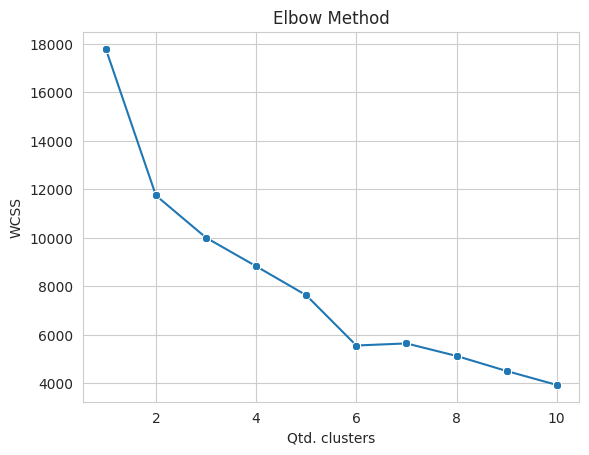

In [39]:
# Gerando gráfico lineplot para o método 'Elbow Method'
with sns.axes_style('whitegrid'):

  grafico = sns.lineplot(x=range(1, 11), y=wcss, marker="8", palette="pastel")
  grafico.set(title='Elbow Method', ylabel='WCSS', xlabel='Qtd. clusters')

<h4>3. Carregamento<h4>

In [40]:
# Defina a função 'save_df_to_csv' que salva o dataframe no formata .csv na pasta 'processed'
def save_df_to_csv(df, file_name):
    # Define o caminho fixo da pasta onde o arquivo será salvo
    folder_path = 'C:/Users/Matheus Rodrigues/OneDrive/Área de Trabalho/Gocase/data/processed'
    
    # Verifica se o caminho da pasta existe
    if not os.path.exists(folder_path):
        raise Exception(f"A pasta '{folder_path}' não existe.")
    
    # Define o caminho completo do arquivo
    file_path = os.path.join(folder_path, file_name)
    
    # Salva o DataFrame em formato CSV
    df.to_csv(file_path, index=False)


3.1 Carregamento dos dataframe's refatorados

In [41]:
save_df_to_csv(by_age_df_refatorado, 'by_age_refatorado.csv')
save_df_to_csv(by_country_df_refatorado, 'by_country_refatorado.csv')
save_df_to_csv(by_platform_df_refatorado, 'by_platform_refatorado.csv')

3.2 Carregamento dos dataframe's normalizados

In [42]:
save_df_to_csv(by_age_df_std, 'by_age_std.csv')
save_df_to_csv(by_country_df_std, 'by_country_std.csv')
save_df_to_csv(by_platform_df_std, 'by_platform_std.csv')

<h4>4. Análise por <strong>plataforma</strong></h4>


4.1 Correlação das colunas

In [43]:
def plot_correlation_matrix(df, selected_columns, title='Matriz de Correlação'):
    # Calcula a matriz de correlação
    correlation_matrix = df[selected_columns].corr()
    
    # Exibe a matriz de correlação
    print(correlation_matrix)

    # Plota o gráfico de calor
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
    plt.title(title)
    plt.show()
    
selected_columns = [
    'result_rate_std',
    'results_std',
    'reach_std',
    'frequency_std',
    'link_clicks_std',
    'ctr_all_std',
    'add_to_cart_std',
    'initiate_checkout_std',
    'purchase_std',
    'amount_spent_usd_std',
    'purchase_conversion_value_std'
]


                               result_rate_std  results_std  reach_std   
result_rate_std                       1.000000     0.265680   0.092498  \
results_std                           0.265680     1.000000   0.675811   
reach_std                             0.092498     0.675811   1.000000   
frequency_std                         0.061942    -0.010328  -0.038355   
link_clicks_std                       0.027551     0.403369   0.823591   
ctr_all_std                           0.298589     0.045278   0.174001   
add_to_cart_std                      -0.019075     0.057139   0.628101   
initiate_checkout_std                 0.002078     0.057551   0.592995   
purchase_std                          0.003396    -0.001455   0.499591   
amount_spent_usd_std                 -0.082601     0.033152   0.592163   
purchase_conversion_value_std         0.009431     0.001646   0.492643   

                               frequency_std  link_clicks_std  ctr_all_std   
result_rate_std                  

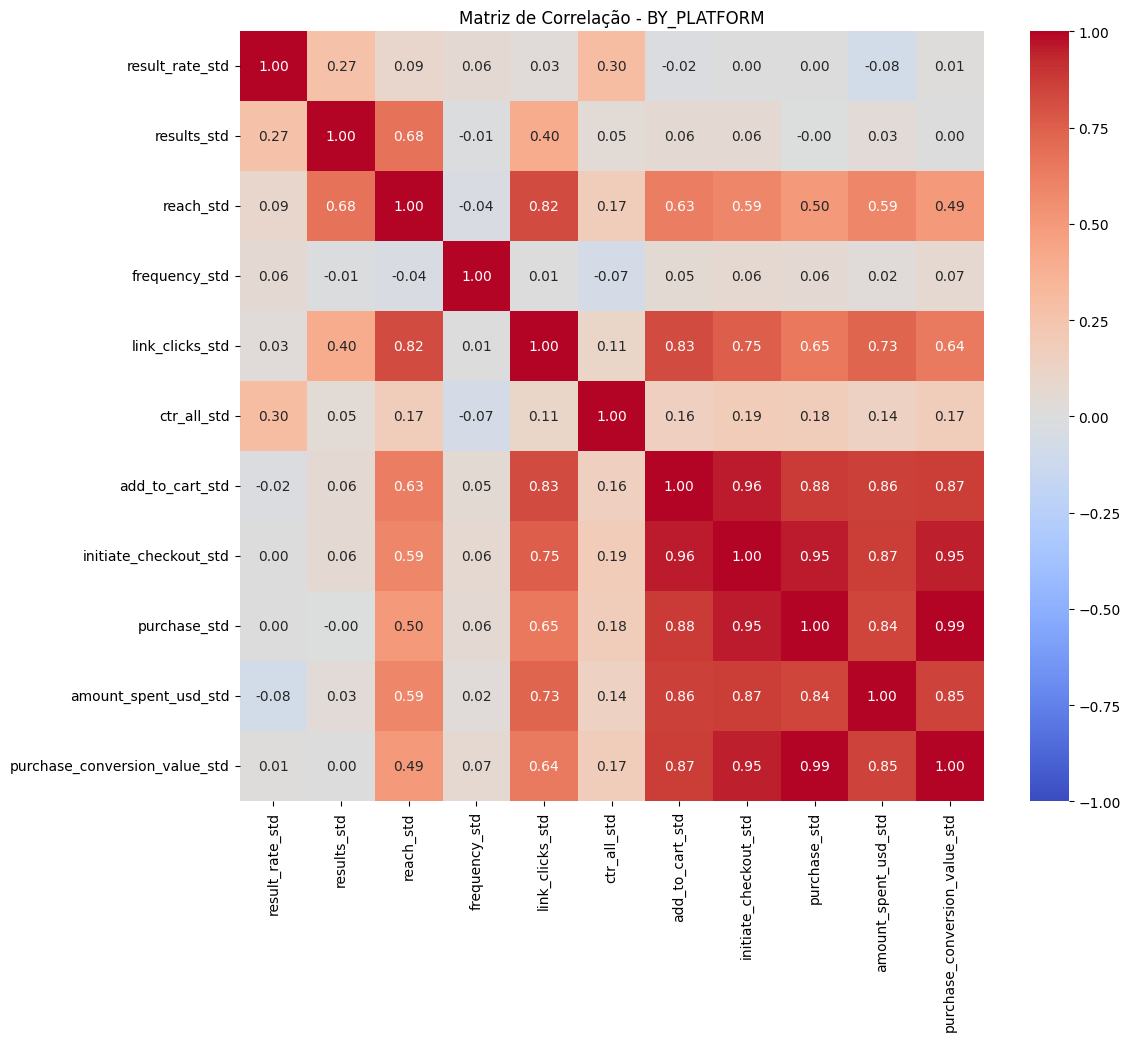

In [44]:
# Chame a função passando o DataFrame e as colunas selecionadas
plot_correlation_matrix(by_platform_df_std, selected_columns, title='Matriz de Correlação - BY_PLATFORM')

Com base nas correlaões podemos inferir que 'amount_spent_usd_std' e 'purchase_conversion_value_std' possuem uma forma correlação positiva. Isso nos leva a ideia do cálculo do ROI(Return on Investment).


In [45]:
# Agrupar os dados pela coluna 'Platform'
group_gereal = by_platform_df_refatorado.groupby('platform').agg({
    'amount_spent_usd': 'sum',
    'purchase_conversion_value': 'sum'
}).reset_index()

# Calcular o ROI para cada plataforma
group_gereal['ROI (%)'] = ((group_gereal['purchase_conversion_value'] - group_gereal['amount_spent_usd']) / group_gereal['amount_spent_usd']) * 100

# Calcular as porcentagens proporcionais
total_amount_spent = group_gereal['amount_spent_usd'].sum()
total_purchase_value = group_gereal['purchase_conversion_value'].sum()

group_gereal['percentage_amount_spent_usd'] = (group_gereal['amount_spent_usd'] / total_amount_spent) * 100
group_gereal['percentage_purchase_conversion_value'] = (group_gereal['purchase_conversion_value'] / total_purchase_value) * 100

In [46]:
group_gereal = group_gereal[['platform', 'amount_spent_usd', 'percentage_amount_spent_usd',
                                  'purchase_conversion_value', 'percentage_purchase_conversion_value',
                                  'ROI (%)']]
group_gereal.head()

,platform,amount_spent_usd,percentage_amount_spent_usd,purchase_conversion_value,percentage_purchase_conversion_value,ROI (%)
0,Audience Network,542.00,0.255073,1811.76,0.595226,234.273063
1,Facebook,165468.45,77.871823,248295.80,81.573749,50.056280
2,Instagram,46477.77,21.873104,54274.43,17.831025,16.775030


In [47]:
# Agrupar os dados pela coluna 'Platform' e 'Grupo Geral'
group_gereal_platform = by_platform_df_refatorado.groupby(['platform', 'group_campanha']).agg({
    'amount_spent_usd': 'sum',
    'purchase_conversion_value': 'sum'
}).reset_index()

# Calcular o ROI para cada grupo de plataforma e tipo de anúncio
group_gereal_platform['ROI (%)'] = ((group_gereal_platform['purchase_conversion_value'] - group_gereal_platform['amount_spent_usd']) / group_gereal_platform['amount_spent_usd']) * 100

# Calcular as porcentagens proporcionais
total_amount_spent = group_gereal_platform['amount_spent_usd'].sum()
total_purchase_value = group_gereal_platform['purchase_conversion_value'].sum()

group_gereal_platform['percentage_amount_spent_usd'] = (group_gereal_platform['amount_spent_usd'] / total_amount_spent) * 100
group_gereal_platform['percentage_purchase_conversion_value'] = (group_gereal_platform['purchase_conversion_value'] / total_purchase_value) * 100

# Arredondar as colunas 'ROI (%)', 'Percentage of Amount Spent (%)', 'Percentage of Purchase Conversion Value (%)' para 2 casas decimais
group_gereal_platform['ROI (%)'] = group_gereal_platform['ROI (%)'].round(2)
group_gereal_platform['percentage_amount_spent_usd'] = group_gereal_platform['percentage_amount_spent_usd'].round(2)
group_gereal_platform['percentage_purchase_conversion_value'] = group_gereal_platform['percentage_purchase_conversion_value'].round(2)


In [48]:
group_gereal_platform = group_gereal_platform[['group_campanha', 'platform', 'amount_spent_usd',
                   'percentage_amount_spent_usd','purchase_conversion_value',
                   'percentage_purchase_conversion_value','ROI (%)']]
group_gereal_platform.head(15)

,group_campanha,platform,amount_spent_usd,percentage_amount_spent_usd,purchase_conversion_value,percentage_purchase_conversion_value,ROI (%)
0,Add to cart,Audience Network,147.06,0.07,1350.99,0.44,818.67
1,Lookalike Conversion,Audience Network,184.79,0.09,19.71,0.01,-89.33
2,Outros,Audience Network,2.88,0.00,0.00,0.00,-100.00
3,Viewed,Audience Network,207.27,0.10,441.06,0.14,112.79
4,Add to cart,Facebook,4357.78,2.05,16309.26,5.36,274.26
5,Lookalike Conversion,Facebook,157608.94,74.17,223564.13,73.45,41.85
6,Outros,Facebook,22.53,0.01,0.00,0.00,-100.00
7,Segmentação Demográfica e Geográfica,Facebook,418.07,0.20,527.68,0.17,26.22
8,Viewed,Facebook,3061.13,1.44,7894.73,2.59,157.90
9,Add to cart,Instagram,818.23,0.39,4489.72,1.48,448.71


<h4>Looklike Conversion<h4>

In [49]:
lookalike_conversion_df = by_platform_df_refatorado[by_platform_df_refatorado['group_campanha'] == 'Lookalike Conversion']

# Agrupar os dados pela coluna 'Platform' e 'group_campanha'
grouped_lookalike = lookalike_conversion_df.groupby(['platform', 'group_campanha']).agg({
    'reach': 'sum',
    'link_clicks': 'sum',
    'purchase': 'sum',
    'amount_spent_usd': 'sum',
    'purchase_conversion_value': 'sum'
}).reset_index()

# 1. Calcular a taxa de conversão
grouped_lookalike['conversion_rate'] = (grouped_lookalike['purchase'] / grouped_lookalike['link_clicks']) * 100

# 2. Calcular o CPC (Custo por Clique)
grouped_lookalike['cpc_link_usd'] = grouped_lookalike['amount_spent_usd'] / grouped_lookalike['link_clicks']

# 3. Calcular o custo por aquisição (CPA)
grouped_lookalike['cpa_usd'] = grouped_lookalike['amount_spent_usd'] / grouped_lookalike['purchase']

# 4. Calcular o ROI (Retorno sobre Investimento)
grouped_lookalike['roi'] = ((grouped_lookalike['purchase_conversion_value'] - grouped_lookalike['amount_spent_usd']) / grouped_lookalike['amount_spent_usd']) * 100

# Calcular as porcentagens proporcionais
total_amount_spent = grouped_lookalike['amount_spent_usd'].sum()
total_purchase_value = grouped_lookalike['purchase_conversion_value'].sum()

grouped_lookalike['percentage_amount_spent_usd'] = (grouped_lookalike['amount_spent_usd'] / total_amount_spent) * 100
grouped_lookalike['percentage_purchase_conversion_value'] = (grouped_lookalike['purchase_conversion_value'] / total_purchase_value) * 100

# Arredondar as colunas para 2 casas decimais
grouped_lookalike = grouped_lookalike.round(2)
grouped_lookalike.head()


,platform,group_campanha,reach,link_clicks,purchase,amount_spent_usd,purchase_conversion_value,conversion_rate,cpc_link_usd,cpa_usd,roi,percentage_amount_spent_usd,percentage_purchase_conversion_value
0,Audience Network,Lookalike Conversion,355104,16405,1,184.79,19.71,0.01,0.01,184.79,-89.33,0.09,0.01
1,Facebook,Lookalike Conversion,71938720,829455,7056,157608.94,223564.13,0.85,0.19,22.34,41.85,77.81,82.49
2,Instagram,Lookalike Conversion,41034394,607798,1440,44756.42,47438.82,0.24,0.07,31.08,5.99,22.10,17.50


In [189]:

import plotly.graph_objects as go

data = grouped_lookalike

# Criando cores personalizadas para cada plataforma
colors = {
    'Facebook': 'blue',
    'Instagram': 'orange',
}

# Gráfico para Alcance por Plataforma
fig_reach = go.Figure()

# Adicionando as barras de Alcance para cada plataforma
for platform in data['platform'].unique():
    fig_reach.add_trace(go.Bar(
        x=[platform],
        y=data[data['platform'] == platform]['conversion_rate'],
        name='Taxa de conversão',
        marker=dict(color=colors.get(platform, 'grey')),  # Cor para 'Alcance'
        showlegend=False  # Remove a legenda
    ))

# Atualizando layout
fig_reach.update_layout(
    title='Taxa de conversão por Plataforma',
    xaxis_title='Plataformas',
    yaxis_title='Taxa de conversão',
    width=600,  # Largura do gráfico
    height=600,  # Altura do gráfico
)

# Exibindo o gráfico
fig_reach.show()

SyntaxError: invalid syntax (1186463488.py, line 36)

C:\Users\Matheus Rodrigues\AppData\Local\Temp\ipykernel_11544\3277644558.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_lookalike, x='platform', y='reach', palette='viridis')


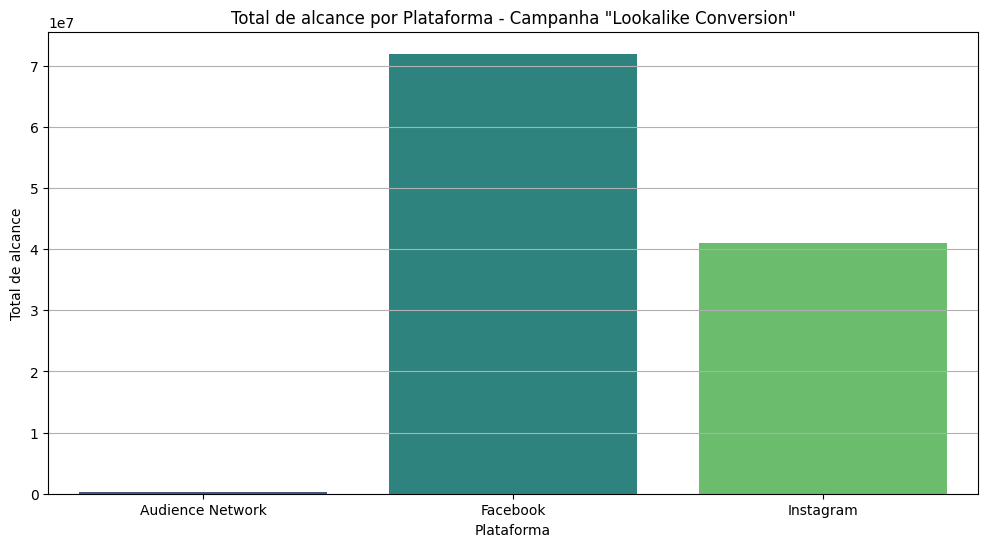

C:\Users\Matheus Rodrigues\AppData\Local\Temp\ipykernel_11544\3277644558.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_lookalike, x='platform', y='amount_spent_usd', palette='viridis')


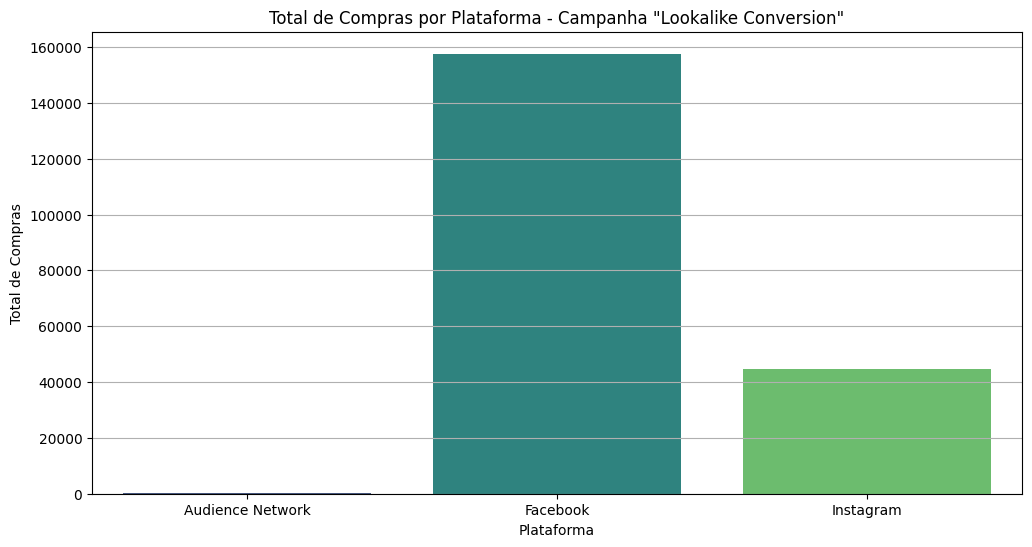

C:\Users\Matheus Rodrigues\AppData\Local\Temp\ipykernel_11544\3277644558.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_lookalike, x='platform', y='purchase', palette='viridis')


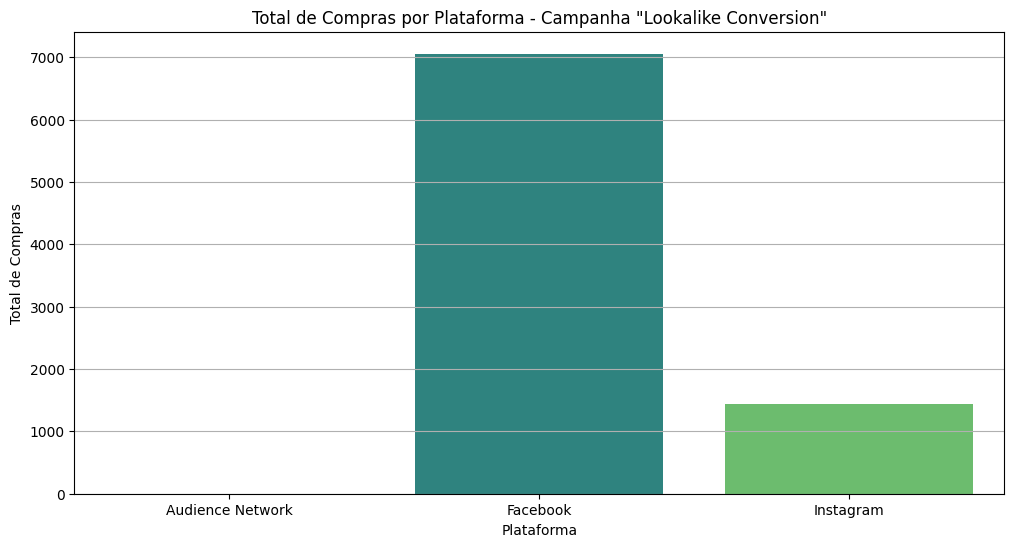

C:\Users\Matheus Rodrigues\AppData\Local\Temp\ipykernel_11544\3277644558.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_lookalike, x='platform', y='cpc_link_usd', palette='viridis')


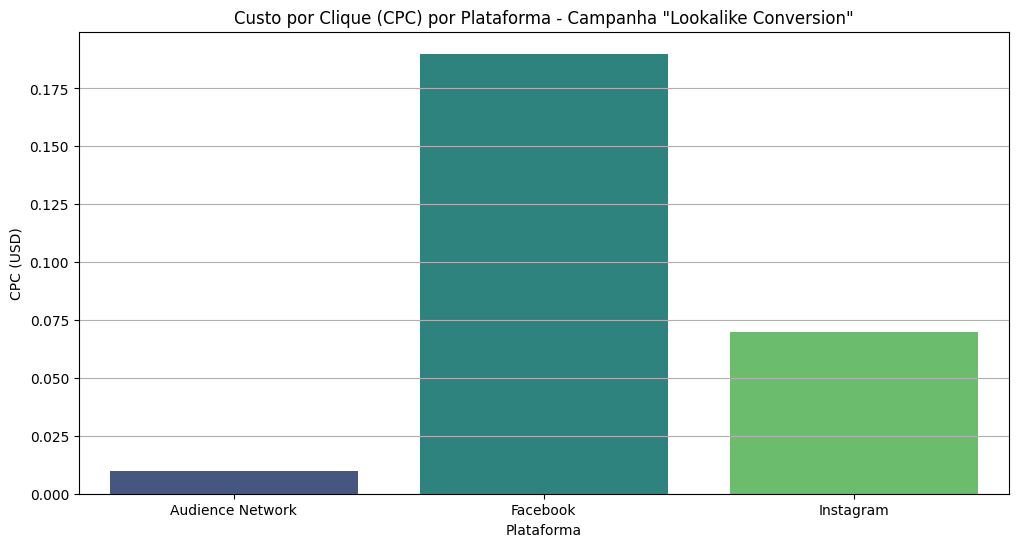

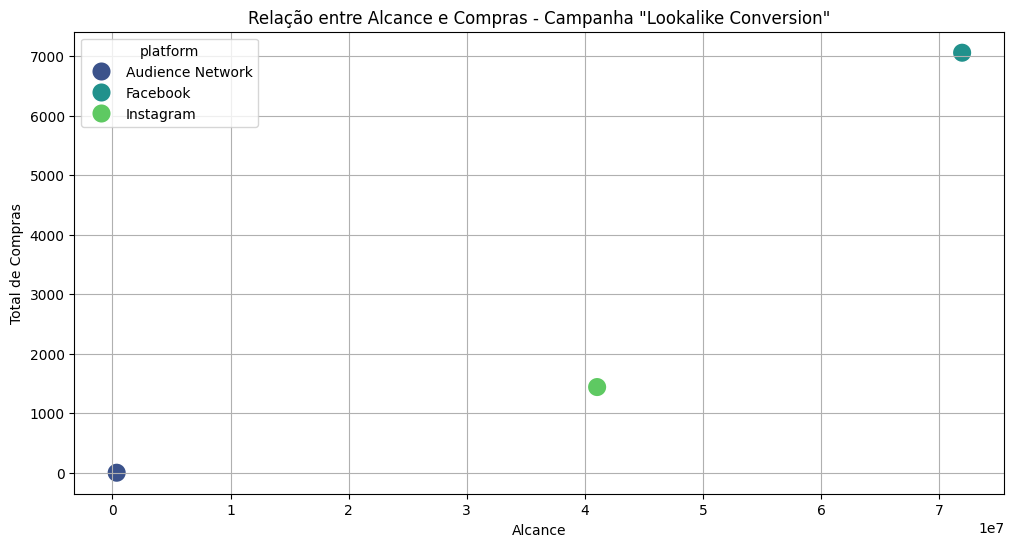

In [50]:
# colocar o numero no eixo X
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_lookalike, x='platform', y='reach', palette='viridis')
plt.title('Total de alcance por Plataforma - Campanha "Lookalike Conversion"')
plt.ylabel('Total de alcance')
plt.xlabel('Plataforma')
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_lookalike, x='platform', y='amount_spent_usd', palette='viridis')
plt.title('Total de Compras por Plataforma - Campanha "Lookalike Conversion"')
plt.ylabel('Total de Compras')
plt.xlabel('Plataforma')
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_lookalike, x='platform', y='purchase', palette='viridis')
plt.title('Total de Compras por Plataforma - Campanha "Lookalike Conversion"')
plt.ylabel('Total de Compras')
plt.xlabel('Plataforma')
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_lookalike, x='platform', y='cpc_link_usd', palette='viridis')
plt.title('Custo por Clique (CPC) por Plataforma - Campanha "Lookalike Conversion"')
plt.ylabel('CPC (USD)')
plt.xlabel('Plataforma')
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(data=grouped_lookalike, x='reach', y='purchase', hue='platform', palette='viridis', s=200)
plt.title('Relação entre Alcance e Compras - Campanha "Lookalike Conversion"')
plt.ylabel('Total de Compras')
plt.xlabel('Alcance')
plt.grid()
plt.show()


In [51]:
lookalike_conversion_df = by_platform_df_refatorado[by_platform_df_refatorado['group_campanha'] == 'Lookalike Conversion']

# Agrupar os dados pela coluna 'Platform' e 'group_campanha'
grouped_lookalike_simu = lookalike_conversion_df.groupby(['platform', 'group_campanha']).agg({
    'reach': 'sum',
    'link_clicks': 'sum',
    'purchase': 'sum',
    'amount_spent_usd': 'sum',
    'purchase_conversion_value': 'sum'
}).reset_index()

# Remover os resultados da plataforma 'Audience Network'
grouped_lookalike_simu = grouped_lookalike_simu[grouped_lookalike_simu['platform'] != 'Audience Network']
# 1. Calcular o CPC (Custo por Clique) e CPM (Custo por Mil Impressões)

grouped_lookalike_simu['cpm_usd'] = (grouped_lookalike_simu['amount_spent_usd'] / grouped_lookalike_simu['reach']) * 1000

# Simulação de um investimento de 10.000 dólares
investment = 10000

# 2. Prever o alcance adicional com o novo investimento
grouped_lookalike_simu['simulated_reach'] = (investment / grouped_lookalike_simu['cpm_usd']) * 1000

# 3. Calcular a nova estimativa de alcance total
grouped_lookalike_simu['total_reach_with_investment'] = grouped_lookalike_simu['reach'] + grouped_lookalike_simu['simulated_reach']

# Arredondar as colunas para 2 casas decimais
grouped_lookalike_simu = grouped_lookalike_simu[['platform', 'group_campanha', 'simulated_reach', 'total_reach_with_investment']].round(2)


grouped_lookalike_simu.head()

,platform,group_campanha,simulated_reach,total_reach_with_investment
1,Facebook,Lookalike Conversion,4564380.68,76503100.68
2,Instagram,Lookalike Conversion,9168381.65,50202775.65


C:\Users\Matheus Rodrigues\AppData\Local\Temp\ipykernel_11544\4018183179.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_lookalike_simu, x='platform', y='simulated_reach', palette='viridis')


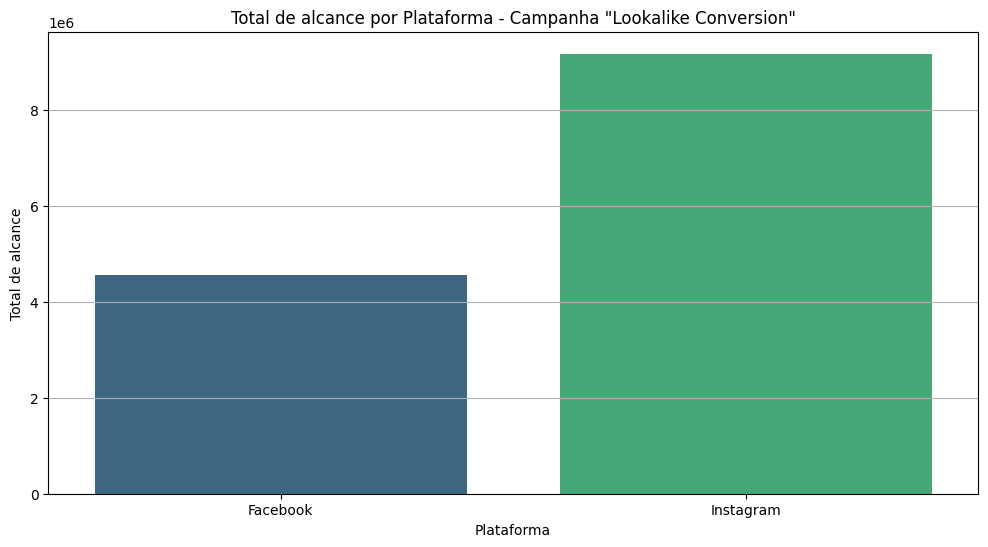

In [52]:
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_lookalike_simu, x='platform', y='simulated_reach', palette='viridis')
plt.title('Total de alcance por Plataforma - Campanha "Lookalike Conversion"')
plt.ylabel('Total de alcance')
plt.xlabel('Plataforma')
plt.grid(axis='y')
plt.show()

<h4>Add to cart<h4>

In [53]:
print(by_platform_df_refatorado.columns)

Index(['group_campanha', 'platform', 'result_rate', 'result_indicator',
       'results', 'reach', 'frequency', 'link_clicks', 'cpc_link_usd',
       'cpc_all_usd', 'cpm_usd', 'ctr_all', 'add_to_cart',
       'cost_per_add_to_cart_usd', 'initiate_checkout',
       'cost_per_initiate_checkout_usd', 'purchase', 'cost_per_purchase_usd',
       'amount_spent_usd', 'purchase_conversion_value'],
      dtype='object')


In [175]:
add_to_cart_df = by_platform_df_refatorado[by_platform_df_refatorado['group_campanha'] == 'Add to cart']

# Agrupar os dados pela coluna 'platform' e 'group_campanha'
grouped_add_to_cart = add_to_cart_df.groupby(['platform', 'group_campanha']).agg({
    'reach': 'sum',
    'link_clicks': 'sum',
    'purchase': 'sum',
    'amount_spent_usd': 'sum',
    'purchase_conversion_value': 'sum'
}).reset_index()

# Calcular a taxa de conversão
grouped_add_to_cart['conversion_rate'] = (grouped_add_to_cart['purchase'] / grouped_add_to_cart['link_clicks']) * 100
grouped_add_to_cart['cpc_link_usd'] = grouped_add_to_cart['amount_spent_usd'] / grouped_add_to_cart['link_clicks']

# Calcular o ROI (Retorno sobre Investimento)
grouped_add_to_cart['roi'] = ((grouped_add_to_cart['purchase_conversion_value'] - grouped_add_to_cart['amount_spent_usd']) / grouped_add_to_cart['amount_spent_usd']) * 100
# Calcular as porcentagens proporcionais
total_amount_spent = grouped_add_to_cart['amount_spent_usd'].sum()
total_purchase_value = grouped_add_to_cart['purchase_conversion_value'].sum()

grouped_add_to_cart['percentage_amount_spent_usd'] = (grouped_add_to_cart['amount_spent_usd'] / total_amount_spent) * 100
grouped_add_to_cart['percentage_purchase_conversion_value'] = (grouped_add_to_cart['purchase_conversion_value'] / total_purchase_value) * 100

# Arredondar as colunas para 2 casas decimais
grouped_add_to_cart = grouped_add_to_cart.round(2)
grouped_add_to_cart.head()


,platform,group_campanha,reach,link_clicks,purchase,amount_spent_usd,purchase_conversion_value,conversion_rate,cpc_link_usd,roi,percentage_amount_spent_usd,percentage_purchase_conversion_value
0,Audience Network,Add to cart,27787,3082,37,147.06,1350.99,1.20,0.05,818.67,2.76,6.10
1,Facebook,Add to cart,102806,6052,470,4357.78,16309.26,7.77,0.72,274.26,81.87,73.63
2,Instagram,Add to cart,78615,1575,126,818.23,4489.72,8.00,0.52,448.71,15.37,20.27


C:\Users\Matheus Rodrigues\AppData\Local\Temp\ipykernel_11544\3648123316.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_add_to_cart, x='platform', y='cpc_link_usd', palette='viridis')


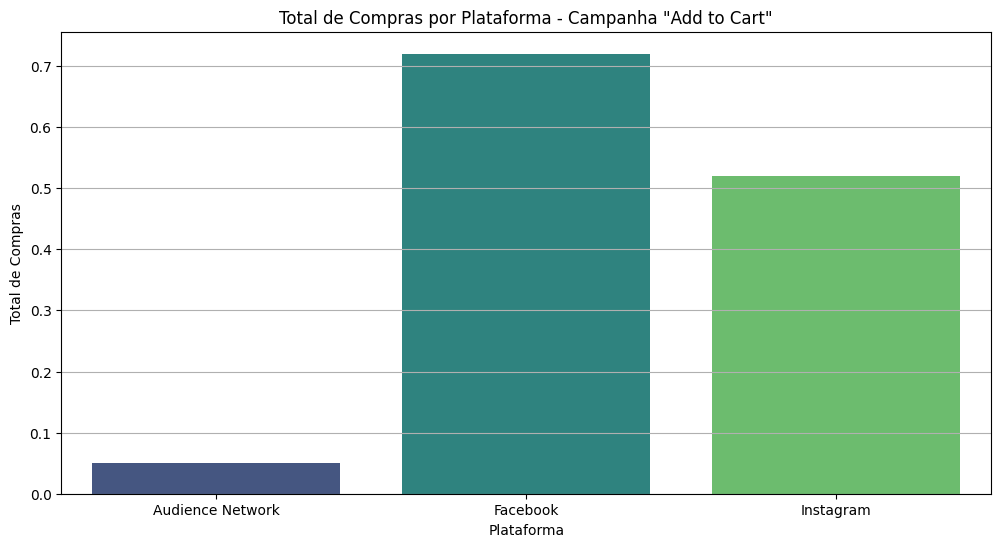

C:\Users\Matheus Rodrigues\AppData\Local\Temp\ipykernel_11544\3648123316.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_add_to_cart, x='platform', y='link_clicks', palette='viridis')


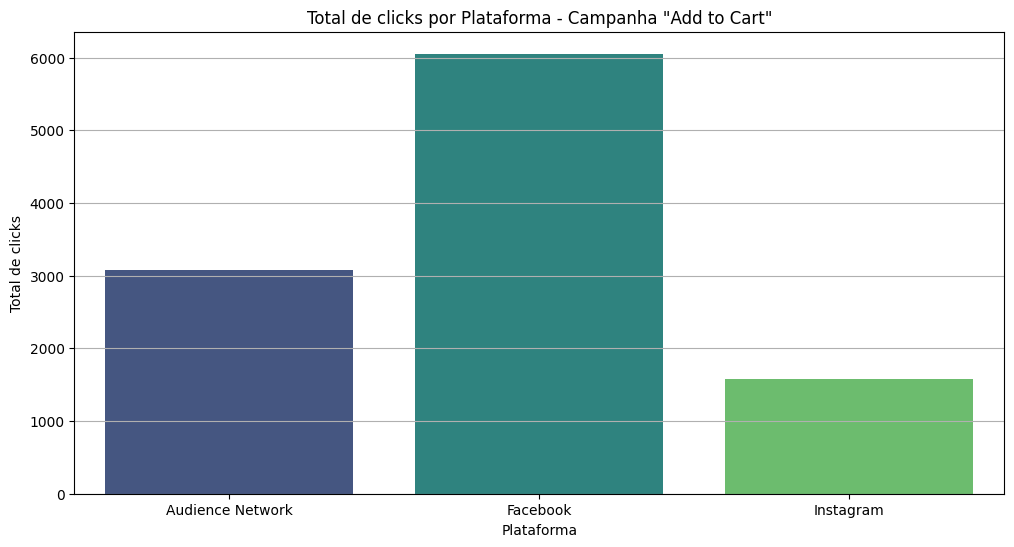

C:\Users\Matheus Rodrigues\AppData\Local\Temp\ipykernel_11544\3648123316.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_add_to_cart, x='platform', y='cpc_link_usd', palette='viridis')


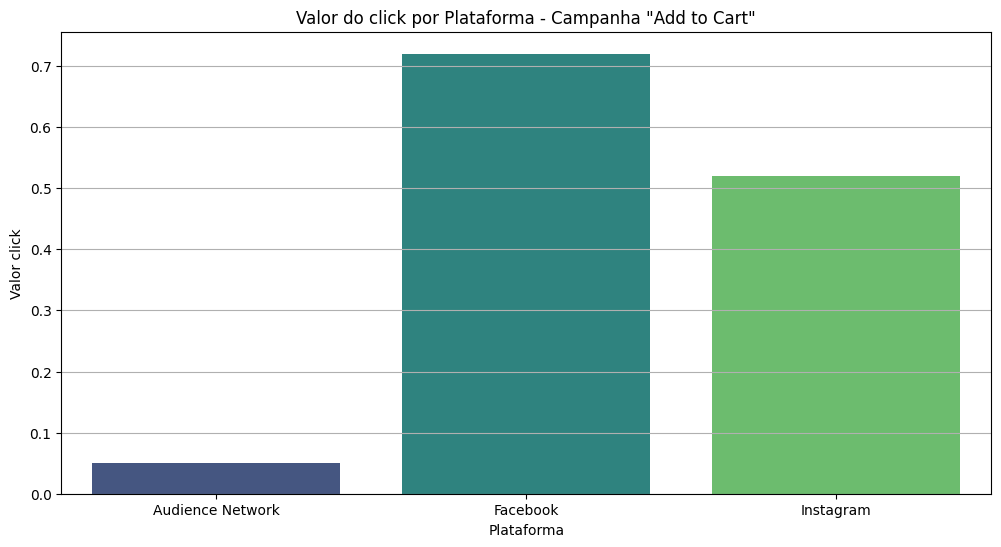

C:\Users\Matheus Rodrigues\AppData\Local\Temp\ipykernel_11544\3648123316.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_add_to_cart, x='platform', y='roi', palette='viridis')


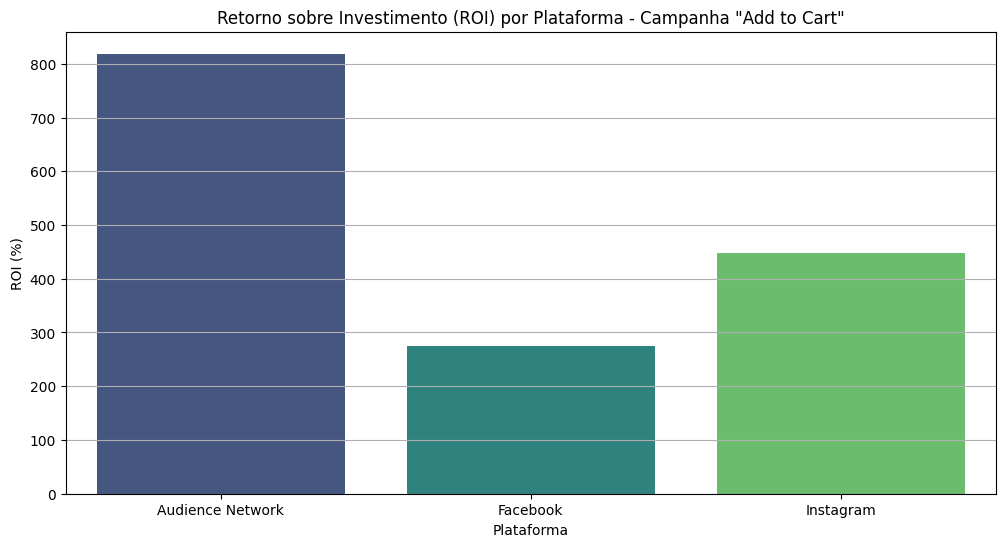

In [55]:
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_add_to_cart, x='platform', y='cpc_link_usd', palette='viridis')
plt.title('Total de Compras por Plataforma - Campanha "Add to Cart"')
plt.ylabel('Total de Compras')
plt.xlabel('Plataforma')
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_add_to_cart, x='platform', y='link_clicks', palette='viridis')
plt.title('Total de clicks por Plataforma - Campanha "Add to Cart"')
plt.ylabel('Total de clicks')
plt.xlabel('Plataforma')
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_add_to_cart, x='platform', y='cpc_link_usd', palette='viridis')
plt.title('Valor do click por Plataforma - Campanha "Add to Cart"')
plt.ylabel('Valor click')
plt.xlabel('Plataforma')
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_add_to_cart, x='platform', y='roi', palette='viridis')
plt.title('Retorno sobre Investimento (ROI) por Plataforma - Campanha "Add to Cart"')
plt.ylabel('ROI (%)')
plt.xlabel('Plataforma')
plt.grid(axis='y')
plt.show()



<h4>Viewed<h4>

In [56]:
viewed_df = by_platform_df_refatorado[by_platform_df_refatorado['group_campanha'] == 'Viewed']

# Agrupar os dados pela coluna 'platform' e 'group_campanha'
grouped_viewed = viewed_df.groupby(['platform', 'group_campanha']).agg({
    'reach': 'sum',
    'link_clicks': 'sum',
    'amount_spent_usd': 'sum',
    'purchase_conversion_value': 'sum'  # Incluindo o valor de conversão
}).reset_index()

# 1. Calcular a taxa de cliques (CTR)
grouped_viewed['ctr_all'] = (grouped_viewed['link_clicks'] / grouped_viewed['reach']) * 100

# 2. Calcular o CPM (Custo por Mil Impressões)
grouped_viewed['cpm_usd'] = (grouped_viewed['amount_spent_usd'] / grouped_viewed['reach']) * 1000

# 3. Calcular o CPC (Custo por Clique)
grouped_viewed['cpc_link_usd'] = grouped_viewed['amount_spent_usd'] / grouped_viewed['link_clicks']

# 4. Calcular o ROI (Retorno sobre Investimento)
grouped_viewed['roi'] = ((grouped_viewed['purchase_conversion_value'] - grouped_viewed['amount_spent_usd']) / grouped_viewed['amount_spent_usd']) * 100

total_amount_spent = grouped_viewed['amount_spent_usd'].sum()
total_purchase_value = grouped_viewed['purchase_conversion_value'].sum()

grouped_viewed['percentage_amount_spent_usd'] = (grouped_viewed['amount_spent_usd'] / total_amount_spent) * 100
grouped_viewed['percentage_purchase_conversion_value'] = (grouped_viewed['purchase_conversion_value'] / total_purchase_value) * 100

# Arredondar as colunas para 2 casas decimais
grouped_viewed = grouped_viewed.round(2)
grouped_viewed.head()

,platform,group_campanha,reach,link_clicks,amount_spent_usd,purchase_conversion_value,ctr_all,cpm_usd,cpc_link_usd,roi,percentage_amount_spent_usd,percentage_purchase_conversion_value
0,Audience Network,Viewed,81540,9069,207.27,441.06,11.12,2.54,0.02,112.79,5.14,4.14
1,Facebook,Viewed,323223,11408,3061.13,7894.73,3.53,9.47,0.27,157.90,75.96,74.17
2,Instagram,Viewed,239444,3616,761.49,2308.14,1.51,3.18,0.21,203.11,18.90,21.69


C:\Users\Matheus Rodrigues\AppData\Local\Temp\ipykernel_11544\151829005.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_viewed, x='platform', y='reach', palette='viridis')


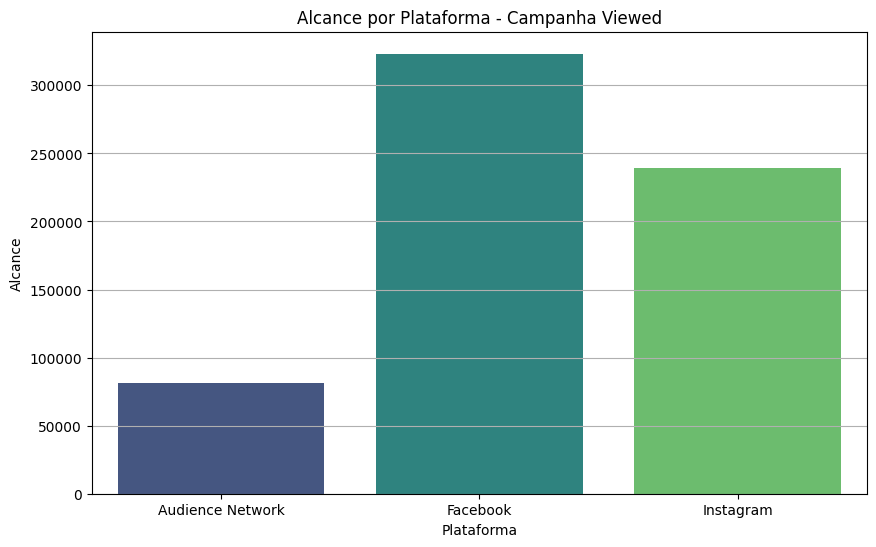

C:\Users\Matheus Rodrigues\AppData\Local\Temp\ipykernel_11544\151829005.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_viewed, x='platform', y='ctr_all', palette='viridis')


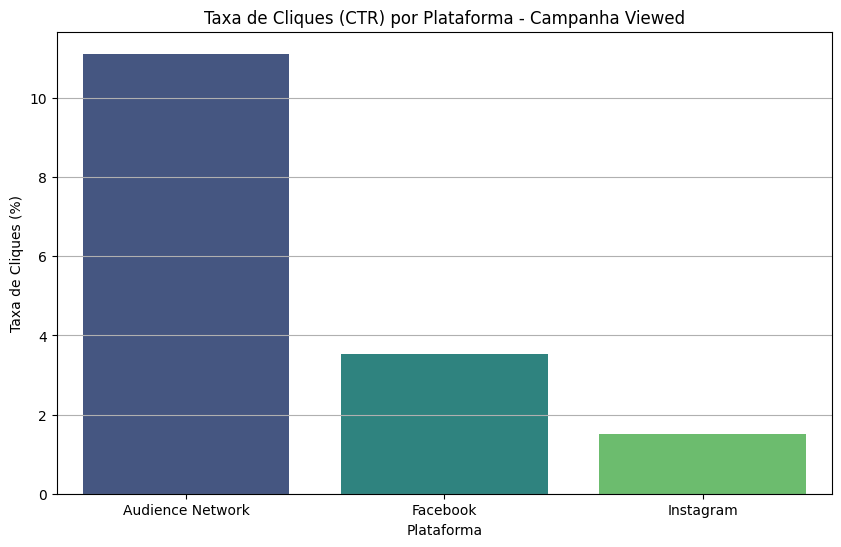

C:\Users\Matheus Rodrigues\AppData\Local\Temp\ipykernel_11544\151829005.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_viewed, x='platform', y='cpc_link_usd', palette='viridis')


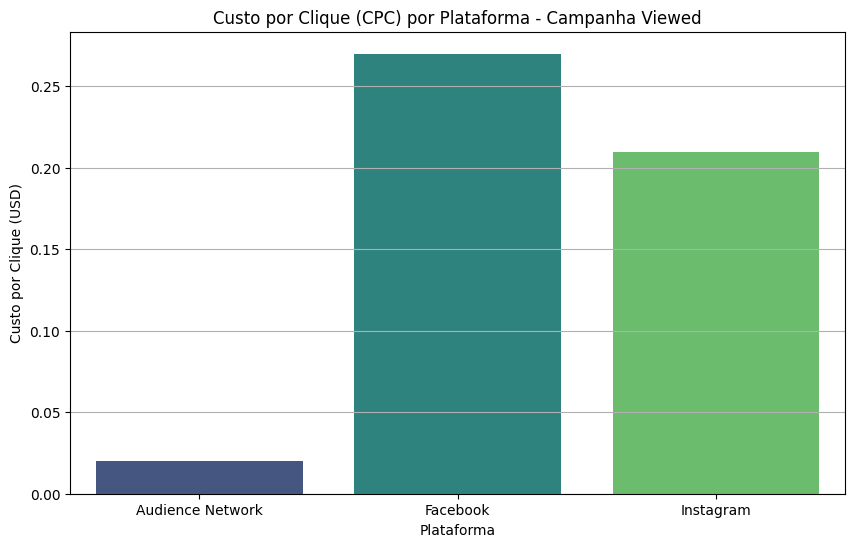

C:\Users\Matheus Rodrigues\AppData\Local\Temp\ipykernel_11544\151829005.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_viewed, x='platform', y='roi', palette='viridis')


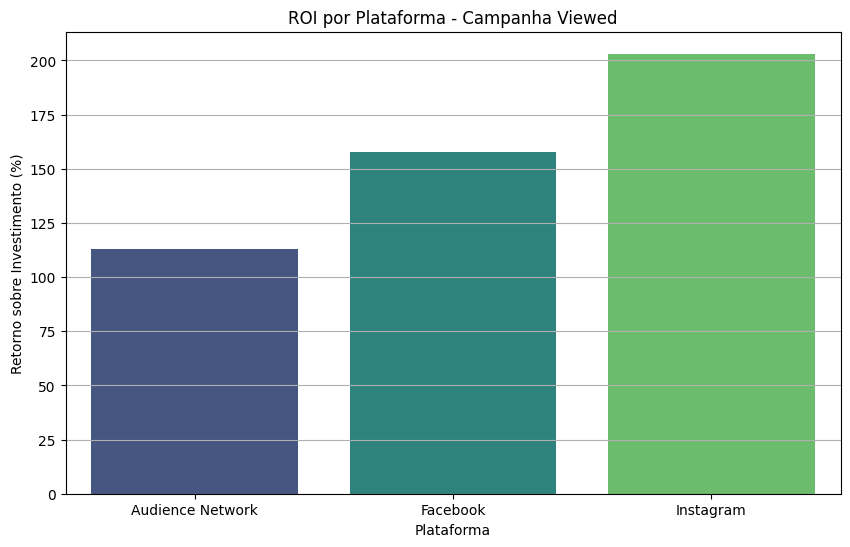

In [57]:
# Gráfico de Barras do Alcance por Plataforma
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_viewed, x='platform', y='reach', palette='viridis')
plt.title('Alcance por Plataforma - Campanha Viewed')
plt.xlabel('Plataforma')
plt.ylabel('Alcance')
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_viewed, x='platform', y='ctr_all', palette='viridis')
plt.title('Taxa de Cliques (CTR) por Plataforma - Campanha Viewed')
plt.xlabel('Plataforma')
plt.ylabel('Taxa de Cliques (%)')
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_viewed, x='platform', y='cpc_link_usd', palette='viridis')
plt.title('Custo por Clique (CPC) por Plataforma - Campanha Viewed')
plt.xlabel('Plataforma')
plt.ylabel('Custo por Clique (USD)')
plt.grid(axis='y')
plt.show()

# Gráfico de Barras do ROI por Plataforma
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_viewed, x='platform', y='roi', palette='viridis')
plt.title('ROI por Plataforma - Campanha Viewed')
plt.xlabel('Plataforma')
plt.ylabel('Retorno sobre Investimento (%)')
plt.grid(axis='y')
plt.show()

<h4>Segmentação Demográfica e Geográfica<h4>

In [58]:
segmentation_df = by_platform_df_refatorado[by_platform_df_refatorado['group_campanha'] == 'Segmentação Demográfica e Geográfica']

# Agrupar os dados pela coluna 'Platform' e 'group_campanha'
grouped_segmentation = segmentation_df.groupby(['platform', 'group_campanha']).agg({
    'reach': 'sum',
    'link_clicks': 'sum',
    'amount_spent_usd': 'sum',
    'purchase_conversion_value': 'sum',
    'frequency': 'mean',  # A média de frequência
    'ctr_all': 'mean',     # A média de CTR
    'cpm_usd': 'mean',     # A média de CPM
    'cpc_link_usd': 'mean' # A média de CPC
}).reset_index()

# Calcular o ROI (Retorno sobre Investimento)
grouped_segmentation['roi'] = ((grouped_segmentation['purchase_conversion_value'] - grouped_segmentation['amount_spent_usd']) / grouped_segmentation['amount_spent_usd']) * 100

# Calcular as porcentagens proporcionais
total_amount_spent_segmentation = grouped_segmentation['amount_spent_usd'].sum()
total_purchase_value_segmentation = grouped_segmentation['purchase_conversion_value'].sum()

grouped_segmentation['percentage_amount_spent_usd'] = (grouped_segmentation['amount_spent_usd'] / total_amount_spent_segmentation) * 100
grouped_segmentation['percentage_purchase_conversion_value'] = (grouped_segmentation['purchase_conversion_value'] / total_purchase_value_segmentation) * 100

# Arredondar as colunas para 2 casas decimais
grouped_segmentation = grouped_segmentation.round(2)
grouped_segmentation.head()


,platform,group_campanha,reach,link_clicks,amount_spent_usd,purchase_conversion_value,frequency,ctr_all,cpm_usd,cpc_link_usd,roi,percentage_amount_spent_usd,percentage_purchase_conversion_value
0,Facebook,Segmentação Demográfica e Geográfica,353356,5599,418.07,527.68,1.41,0.04,1.14,0.37,26.22,75.66,93.32
1,Instagram,Segmentação Demográfica e Geográfica,201009,1094,134.52,37.75,1.06,0.00,0.29,0.45,-71.94,24.34,6.68


C:\Users\Matheus Rodrigues\AppData\Local\Temp\ipykernel_11544\144437454.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_segmentation, x='platform', y='amount_spent_usd', palette='viridis')


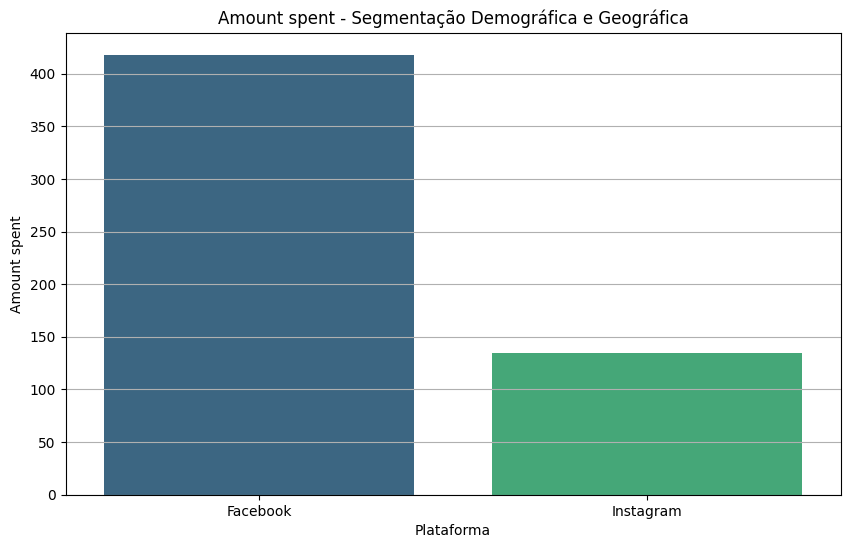

C:\Users\Matheus Rodrigues\AppData\Local\Temp\ipykernel_11544\144437454.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_segmentation, x='platform', y='frequency', palette='viridis')


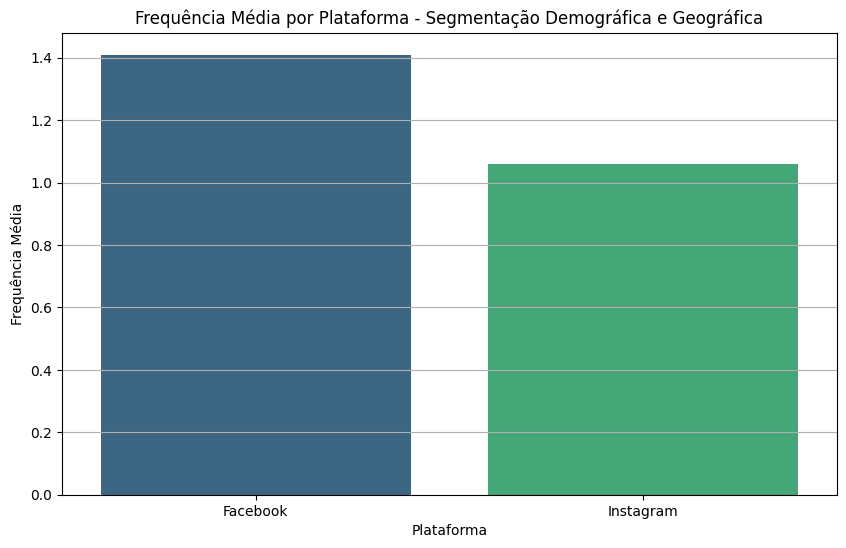

C:\Users\Matheus Rodrigues\AppData\Local\Temp\ipykernel_11544\144437454.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_segmentation, x='platform', y='ctr_all', palette='Greens_d')


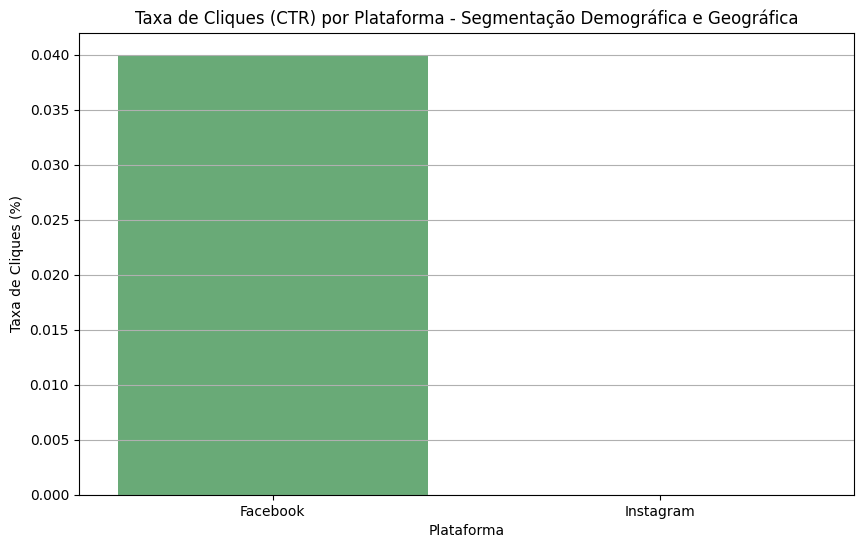

C:\Users\Matheus Rodrigues\AppData\Local\Temp\ipykernel_11544\144437454.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_segmentation, x='platform', y='reach', palette='viridis')


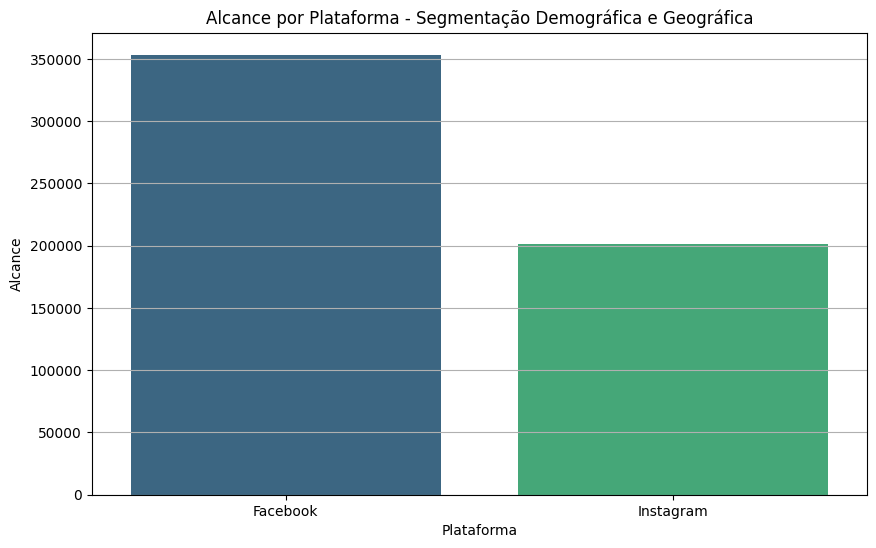

C:\Users\Matheus Rodrigues\AppData\Local\Temp\ipykernel_11544\144437454.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_segmentation, x='platform', y='cpc_link_usd', palette='viridis')


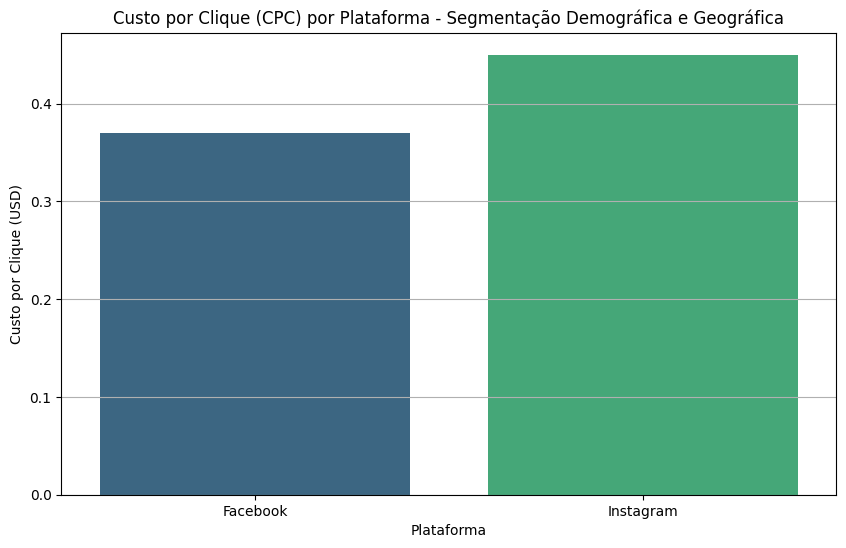

In [59]:
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_segmentation, x='platform', y='amount_spent_usd', palette='viridis')
plt.title('Amount spent - Segmentação Demográfica e Geográfica')
plt.xlabel('Plataforma')
plt.ylabel('Amount spent')
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_segmentation, x='platform', y='frequency', palette='viridis')
plt.title('Frequência Média por Plataforma - Segmentação Demográfica e Geográfica')
plt.xlabel('Plataforma')
plt.ylabel('Frequência Média')
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_segmentation, x='platform', y='ctr_all', palette='Greens_d')
plt.title('Taxa de Cliques (CTR) por Plataforma - Segmentação Demográfica e Geográfica')
plt.xlabel('Plataforma')
plt.ylabel('Taxa de Cliques (%)')
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_segmentation, x='platform', y='reach', palette='viridis')
plt.title('Alcance por Plataforma - Segmentação Demográfica e Geográfica')
plt.xlabel('Plataforma')
plt.ylabel('Alcance')
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_segmentation, x='platform', y='cpc_link_usd', palette='viridis')
plt.title('Custo por Clique (CPC) por Plataforma - Segmentação Demográfica e Geográfica')
plt.xlabel('Plataforma')
plt.ylabel('Custo por Clique (USD)')
plt.grid(axis='y')
plt.show()

<h4>Instagram Campanha<h4>

In [60]:
# Filtrando o DataFrame para a campanha "Instagram Campanha"
instagram_campaign_df = by_platform_df_refatorado[by_platform_df_refatorado['group_campanha'] == 'Instagram Campanha']

# Agrupando os dados pela coluna 'Platform' e 'group_campanha'
grouped_instagram = instagram_campaign_df.groupby(['platform', 'group_campanha']).agg({
    'reach': 'sum',
    'link_clicks': 'sum',
    'amount_spent_usd': 'sum',
    'purchase_conversion_value': 'sum',
    'frequency': 'sum',  # Somando a frequência
    'ctr_all': 'mean',   # Média da taxa de cliques
    'cpm_usd': 'mean',   # Média do CPM
    'cpc_link_usd': 'mean'  # Média do CPC
}).reset_index()

# Calculando ROI
grouped_instagram['roi'] = ((grouped_instagram['purchase_conversion_value'] - grouped_instagram['amount_spent_usd']) / grouped_instagram['amount_spent_usd']) * 100

# Calculando as porcentagens proporcionais
total_amount_spent_instagram = grouped_instagram['amount_spent_usd'].sum()
total_purchase_value_instagram = grouped_instagram['purchase_conversion_value'].sum()

grouped_instagram['percentage_amount_spent_usd'] = (grouped_instagram['amount_spent_usd'] / total_amount_spent_instagram) * 100
grouped_instagram['percentage_purchase_conversion_value'] = (grouped_instagram['purchase_conversion_value'] / total_purchase_value_instagram) * 100

# Arredondar os resultados para 2 casas decimais
grouped_instagram = grouped_instagram.round(2)

# Exibindo os resultados
grouped_instagram.head()

,platform,group_campanha,reach,link_clicks,amount_spent_usd,purchase_conversion_value,frequency,ctr_all,cpm_usd,cpc_link_usd,roi,percentage_amount_spent_usd,percentage_purchase_conversion_value
0,Instagram,Instagram Campanha,2561,13,5.0,0.0,1.0,0.01,1.95,0.38,-100.0,100.0,NaN


<h2>Análise por <strong>idade<strong><h2>

                               result_rate_std  results_std  reach_std   
result_rate_std                       1.000000     0.063673   0.010428  \
results_std                           0.063673     1.000000   0.680934   
reach_std                             0.010428     0.680934   1.000000   
frequency_std                         0.034262    -0.005279  -0.024501   
link_clicks_std                      -0.004008     0.387726   0.808713   
ctr_all_std                           0.082902     0.006919   0.022660   
add_to_cart_std                      -0.015247     0.059324   0.611129   
initiate_checkout_std                -0.010552     0.064921   0.577580   
purchase_std                         -0.008968     0.007473   0.466323   
amount_spent_usd_std                 -0.033981     0.041861   0.587436   
purchase_conversion_value_std        -0.007802     0.010542   0.457349   

                               frequency_std  link_clicks_std  ctr_all_std   
result_rate_std                  

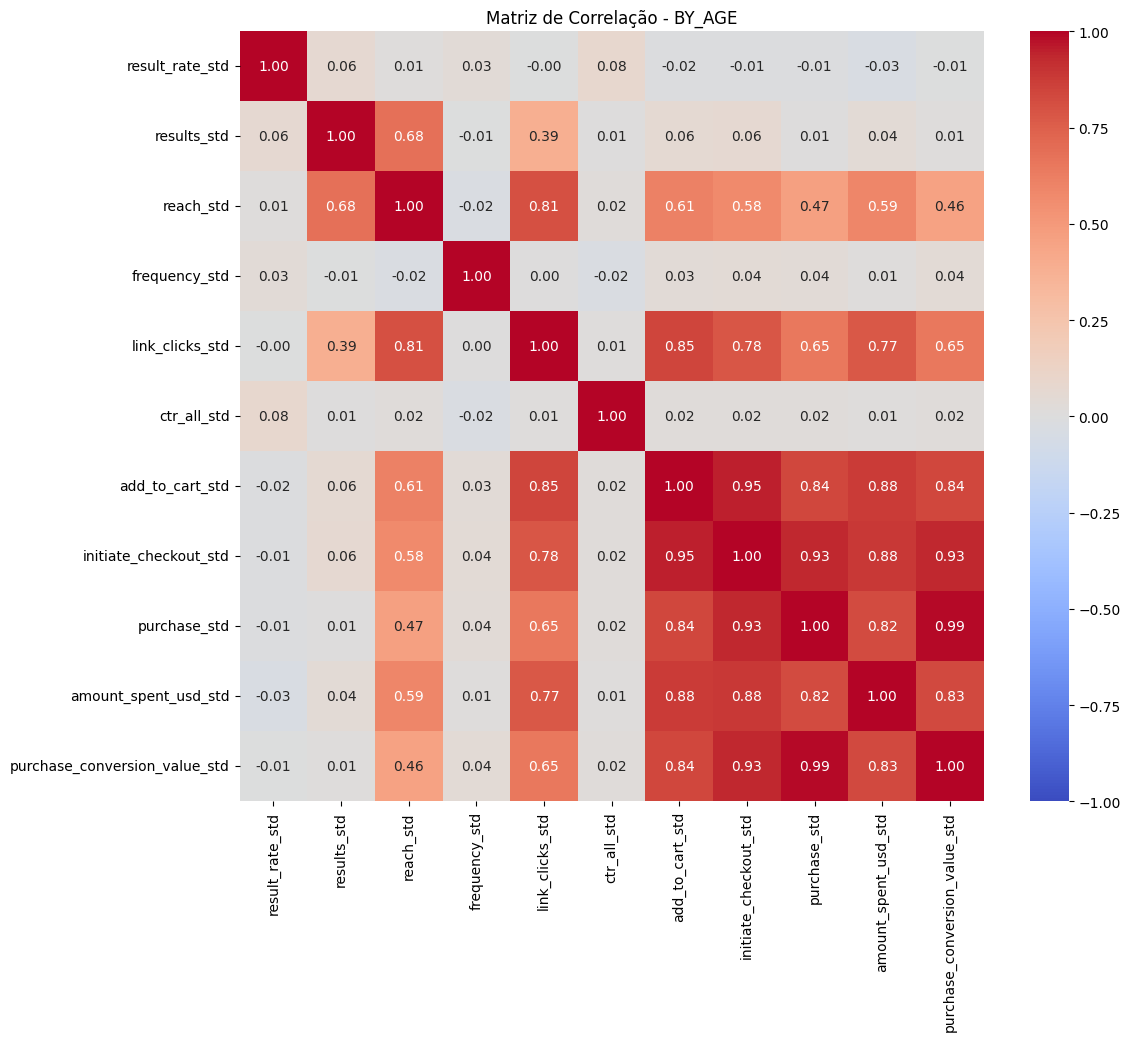

In [61]:
# Chame a função passando o DataFrame e as colunas selecionadas
plot_correlation_matrix(by_age_df_std, selected_columns, title='Matriz de Correlação - BY_AGE')

Visão geral

In [62]:
# Agrupar os dados pela coluna 'Platform'
group_gereal_age = by_age_df_refatorado.groupby('age').agg({
    'amount_spent_usd': 'sum',
    'purchase_conversion_value': 'sum'
}).reset_index()

# Calcular o ROI para cada plataforma
group_gereal_age['ROI (%)'] = ((group_gereal_age['purchase_conversion_value'] - group_gereal_age['amount_spent_usd']) / group_gereal_age['amount_spent_usd']) * 100

# Calcular as porcentagens proporcionais
total_amount_spent = group_gereal_age['amount_spent_usd'].sum()
total_purchase_value = group_gereal_age['purchase_conversion_value'].sum()

group_gereal_age['percentage_amount_spent_usd'] = (group_gereal_age['amount_spent_usd'] / total_amount_spent) * 100
group_gereal_age['percentage_purchase_conversion_value'] = (group_gereal_age['purchase_conversion_value'] / total_purchase_value) * 100

group_gereal_age = group_gereal_age[['age', 'amount_spent_usd', 'percentage_amount_spent_usd',
                                  'purchase_conversion_value', 'percentage_purchase_conversion_value',
                                  'ROI (%)']]
group_gereal_age.head()

,age,amount_spent_usd,percentage_amount_spent_usd,purchase_conversion_value,percentage_purchase_conversion_value,ROI (%)
0,13-17,29088.00,13.688322,30275.51,9.947287,4.082474
1,18-24,98947.94,46.563230,133076.73,43.723537,34.491663
2,25-34,69352.53,32.636130,115169.29,37.839889,66.063574
3,35-44,13607.99,6.403690,22604.67,7.426964,66.113217
4,45-54,1087.07,0.511557,2469.33,0.811320,127.154645


Visão por faixa de idade

In [63]:
# Agrupar os dados pela coluna 'Platform' e 'Grupo Geral'
group_gereal_age = by_age_df_refatorado.groupby(['age', 'group_campanha']).agg({
    'amount_spent_usd': 'sum',
    'purchase_conversion_value': 'sum'
}).reset_index()

# Calcular o ROI para cada grupo de plataforma e tipo de anúncio
group_gereal_age['ROI (%)'] = ((group_gereal_age['purchase_conversion_value'] - group_gereal_age['amount_spent_usd']) / group_gereal_age['amount_spent_usd']) * 100

# Calcular as porcentagens proporcionais
total_amount_spent = group_gereal_age['amount_spent_usd'].sum()
total_purchase_value = group_gereal_age['purchase_conversion_value'].sum()

group_gereal_age['percentage_amount_spent_usd'] = (group_gereal_age['amount_spent_usd'] / total_amount_spent) * 100
group_gereal_age['percentage_purchase_conversion_value'] = (group_gereal_age['purchase_conversion_value'] / total_purchase_value) * 100

# Arredondar as colunas 'ROI (%)', 'Percentage of Amount Spent (%)', 'Percentage of Purchase Conversion Value (%)' para 2 casas decimais
group_gereal_age['ROI (%)'] = group_gereal_age['ROI (%)'].round(2)
group_gereal_age['percentage_amount_spent_usd'] = group_gereal_age['percentage_amount_spent_usd'].round(2)
group_gereal_age['percentage_purchase_conversion_value'] = group_gereal_age['percentage_purchase_conversion_value'].round(2)

group_gereal_age = group_gereal_age[['group_campanha', 'age', 'amount_spent_usd',
                   'percentage_amount_spent_usd','purchase_conversion_value',
                   'percentage_purchase_conversion_value','ROI (%)']]

group_gereal_age.head(37)


,group_campanha,age,amount_spent_usd,percentage_amount_spent_usd,purchase_conversion_value,percentage_purchase_conversion_value,ROI (%)
0,Add to cart,13-17,0.00,0.00,0.00,0.00,NaN
1,Lookalike Conversion,13-17,28775.18,13.54,30039.81,9.87,4.39
2,Segmentação Demográfica e Geográfica,13-17,312.75,0.15,235.70,0.08,-24.64
3,Viewed,13-17,0.07,0.00,0.00,0.00,-100.00
4,Add to cart,18-24,2817.95,1.33,10501.26,3.45,272.66
5,Instagram Campanha,18-24,4.02,0.00,0.00,0.00,-100.00
6,Lookalike Conversion,18-24,93741.39,44.11,116970.40,38.43,24.78
7,Outros,18-24,16.22,0.01,0.00,0.00,-100.00
8,Segmentação Demográfica e Geográfica,18-24,152.60,0.07,255.03,0.08,67.12
9,Viewed,18-24,2215.76,1.04,5350.04,1.76,141.45


<h4>Lookalike Conversion<h4>	

In [64]:
lookalike_conversion_age_df = by_age_df_refatorado[by_age_df_refatorado['group_campanha'] == 'Lookalike Conversion']

# Agrupar os dados pela coluna 'Platform' e 'group_campanha'
grouped_lookalike_age = lookalike_conversion_age_df.groupby(['age', 'group_campanha']).agg({
    'reach': 'sum',
    'link_clicks': 'sum',
    'purchase': 'sum',
    'amount_spent_usd': 'sum',
    'purchase_conversion_value': 'sum'
}).reset_index()

# 1. Calcular a taxa de conversão
grouped_lookalike_age['conversion_rate'] = (grouped_lookalike_age['purchase'] / grouped_lookalike_age['link_clicks']) * 100

# 2. Calcular o CPC (Custo por Clique)
grouped_lookalike_age['cpc_link_usd'] = grouped_lookalike_age['amount_spent_usd'] / grouped_lookalike_age['link_clicks']

# 3. Calcular o custo por aquisição (CPA)
grouped_lookalike_age['cpa_usd'] = grouped_lookalike_age['amount_spent_usd'] / grouped_lookalike_age['purchase']

# 4. Calcular o ROI (Retorno sobre Investimento)
grouped_lookalike_age['roi(%)'] = ((grouped_lookalike_age['purchase_conversion_value'] - grouped_lookalike_age['amount_spent_usd']) / grouped_lookalike_age['amount_spent_usd']) * 100

# Calcular as porcentagens proporcionais
total_amount_spent = grouped_lookalike_age['amount_spent_usd'].sum()
total_purchase_value = grouped_lookalike_age['purchase_conversion_value'].sum()

grouped_lookalike_age['percentage_amount_spent_usd'] = (grouped_lookalike_age['amount_spent_usd'] / total_amount_spent) * 100
grouped_lookalike_age['percentage_purchase_conversion_value'] = (grouped_lookalike_age['purchase_conversion_value'] / total_purchase_value) * 100

# Arredondar as colunas para 2 casas decimais
grouped_lookalike_age = grouped_lookalike_age.round(2)
grouped_lookalike_age.head(10)


,age,group_campanha,reach,link_clicks,purchase,amount_spent_usd,purchase_conversion_value,conversion_rate,cpc_link_usd,cpa_usd,roi(%),percentage_amount_spent_usd,percentage_purchase_conversion_value
0,13-17,Lookalike Conversion,21477159,339169,966,28775.18,30039.81,0.28,0.08,29.79,4.39,14.21,11.08
1,18-24,Lookalike Conversion,56769834,663645,3664,93741.39,116970.40,0.55,0.14,25.58,24.78,46.28,43.16
2,25-34,Lookalike Conversion,26827765,353262,3233,66285.03,103486.77,0.92,0.19,20.50,56.12,32.72,38.19
3,35-44,Lookalike Conversion,5284449,84545,580,12573.67,18790.82,0.69,0.15,21.68,49.45,6.21,6.93
4,45-54,Lookalike Conversion,549566,8297,38,840.59,1236.60,0.46,0.10,22.12,47.11,0.41,0.46
5,55-64,Lookalike Conversion,145811,2079,10,184.85,308.93,0.48,0.09,18.48,67.12,0.09,0.11
6,65+,Lookalike Conversion,293129,2723,5,160.93,166.87,0.18,0.06,32.19,3.69,0.08,0.06


<h4>Visualização - Lookalike Conversion<h4>

C:\Users\Matheus Rodrigues\AppData\Local\Temp\ipykernel_11544\812583923.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_lookalike_age, x='age', y='reach', palette='viridis')


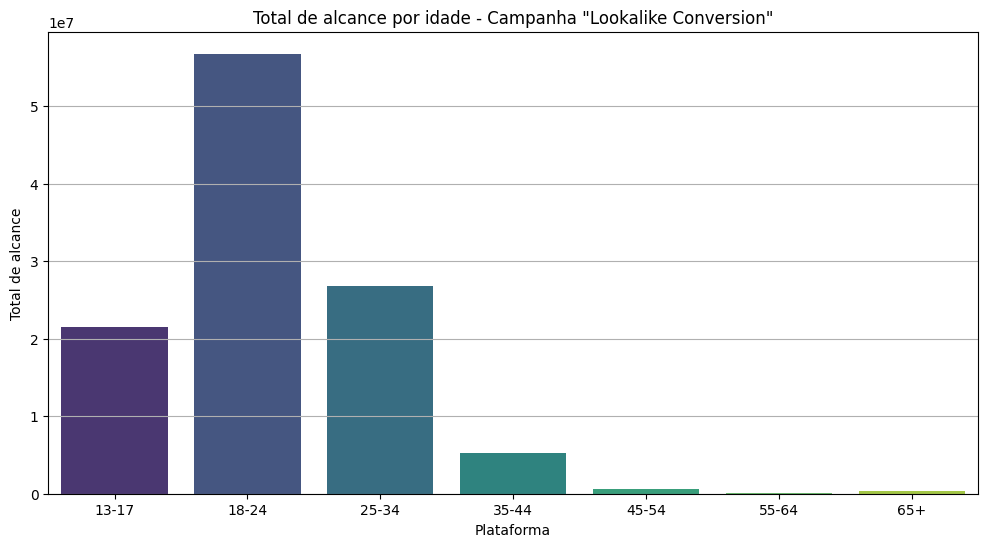

C:\Users\Matheus Rodrigues\AppData\Local\Temp\ipykernel_11544\812583923.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_lookalike_age, x='age', y='amount_spent_usd', palette='viridis')


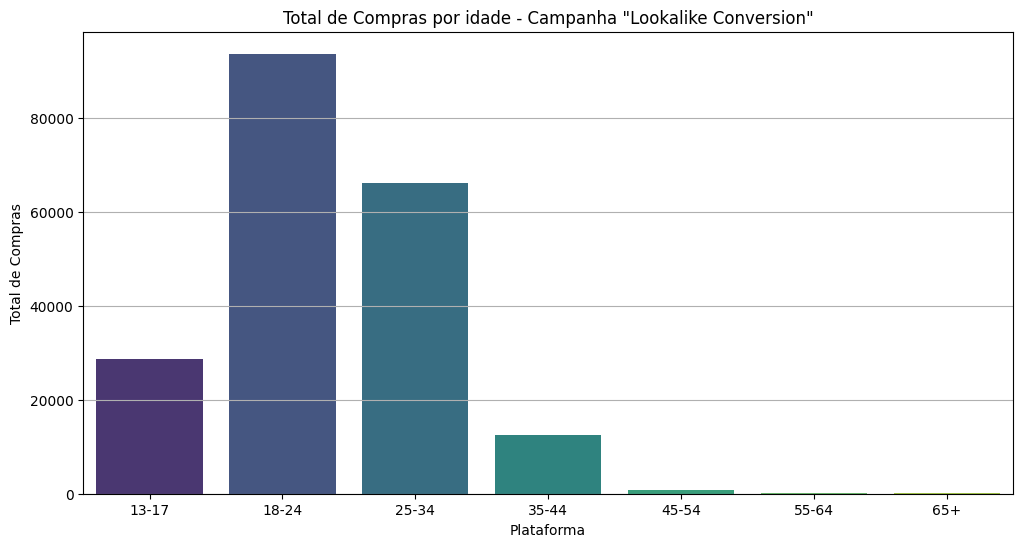

C:\Users\Matheus Rodrigues\AppData\Local\Temp\ipykernel_11544\812583923.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_lookalike_age, x='age', y='purchase', palette='viridis')


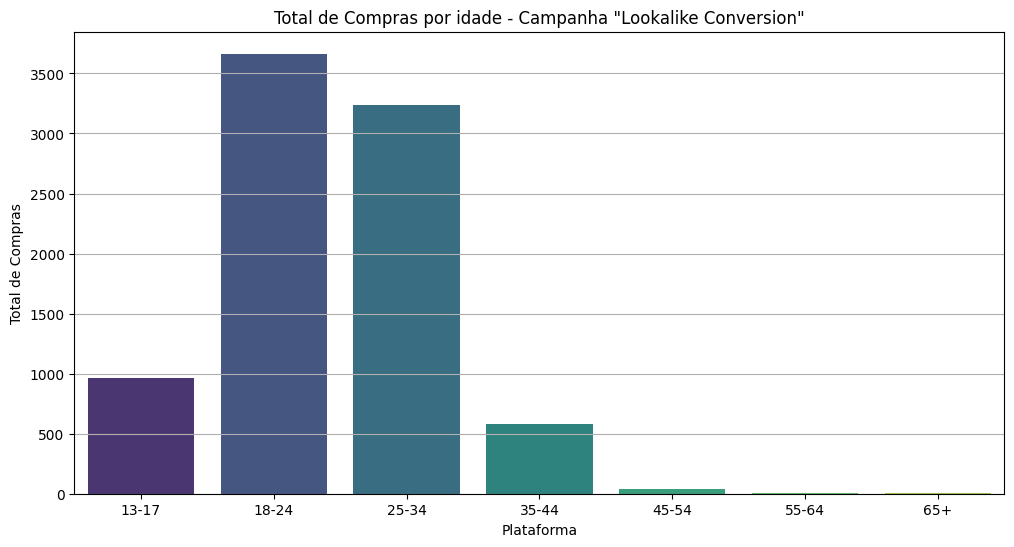

C:\Users\Matheus Rodrigues\AppData\Local\Temp\ipykernel_11544\812583923.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_lookalike_age, x='age', y='cpc_link_usd', palette='viridis')


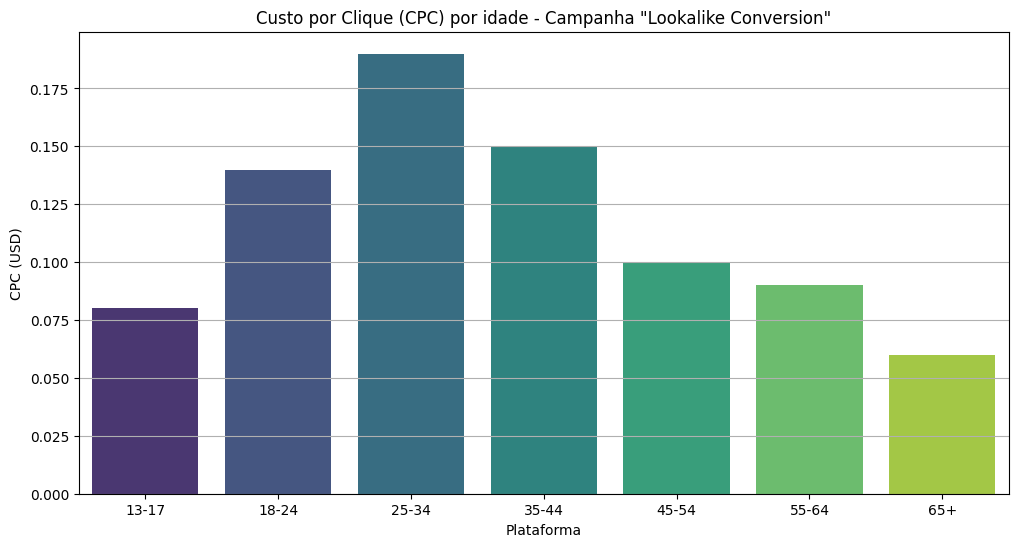

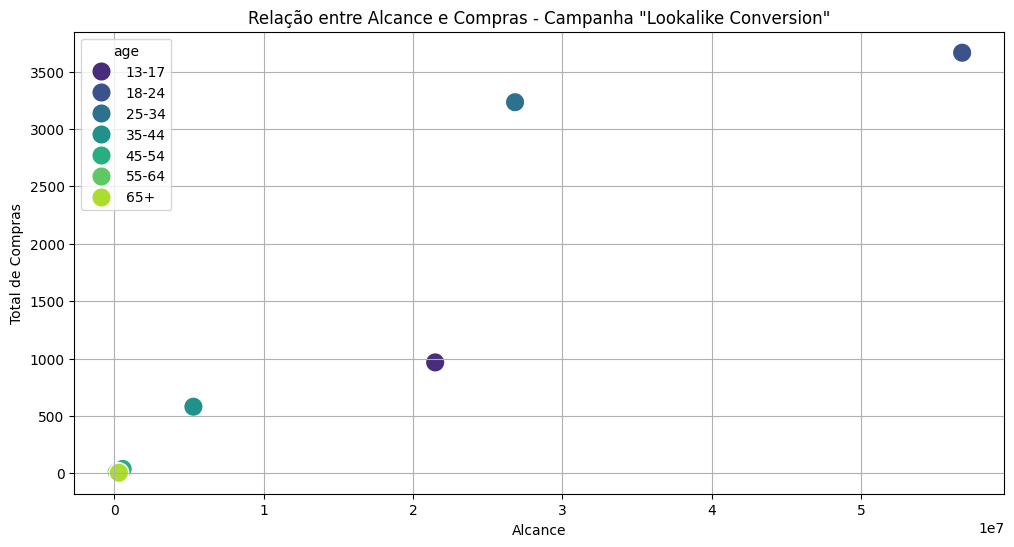

In [65]:
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_lookalike_age, x='age', y='reach', palette='viridis')
plt.title('Total de alcance por idade - Campanha "Lookalike Conversion"')
plt.ylabel('Total de alcance')
plt.xlabel('Plataforma')
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_lookalike_age, x='age', y='amount_spent_usd', palette='viridis')
plt.title('Total de Compras por idade - Campanha "Lookalike Conversion"')
plt.ylabel('Total de Compras')
plt.xlabel('Plataforma')
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_lookalike_age, x='age', y='purchase', palette='viridis')
plt.title('Total de Compras por idade - Campanha "Lookalike Conversion"')
plt.ylabel('Total de Compras')
plt.xlabel('Plataforma')
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_lookalike_age, x='age', y='cpc_link_usd', palette='viridis')
plt.title('Custo por Clique (CPC) por idade - Campanha "Lookalike Conversion"')
plt.ylabel('CPC (USD)')
plt.xlabel('Plataforma')
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(data=grouped_lookalike_age, x='reach', y='purchase', hue='age', palette='viridis', s=200)
plt.title('Relação entre Alcance e Compras - Campanha "Lookalike Conversion"')
plt.ylabel('Total de Compras')
plt.xlabel('Alcance')
plt.grid()
plt.show()


<h4>Add to cart<h4>

In [66]:
add_to_cart_age_df = by_age_df_refatorado[by_age_df_refatorado['group_campanha'] == 'Add to cart']

# Agrupar os dados pela coluna 'age' e 'group_campanha'
grouped_add_to_cart_age = add_to_cart_age_df.groupby(['age', 'group_campanha']).agg({
    'reach': 'sum',
    'link_clicks': 'sum',
    'purchase': 'sum',
    'amount_spent_usd': 'sum',
    'purchase_conversion_value': 'sum'
}).reset_index()

# Calcular a taxa de conversão
grouped_add_to_cart_age['conversion_rate'] = (grouped_add_to_cart_age['purchase'] / grouped_add_to_cart_age['link_clicks']) * 100
grouped_add_to_cart_age['cpc_link_usd'] = grouped_add_to_cart_age['amount_spent_usd'] / grouped_add_to_cart_age['link_clicks']

# Calcular o ROI (Retorno sobre Investimento)
grouped_add_to_cart_age['roi(%)'] = ((grouped_add_to_cart_age['purchase_conversion_value'] - grouped_add_to_cart_age['amount_spent_usd']) / grouped_add_to_cart_age['amount_spent_usd']) * 100
# Calcular as porcentagens proporcionais
total_amount_spent = grouped_add_to_cart_age['amount_spent_usd'].sum()
total_purchase_value = grouped_add_to_cart_age['purchase_conversion_value'].sum()

grouped_add_to_cart_age['percentage_amount_spent_usd'] = (grouped_add_to_cart_age['amount_spent_usd'] / total_amount_spent) * 100
grouped_add_to_cart_age['percentage_purchase_conversion_value'] = (grouped_add_to_cart_age['purchase_conversion_value'] / total_purchase_value) * 100

# Arredondar as colunas para 2 casas decimais
grouped_add_to_cart_age = grouped_add_to_cart_age.round(2)

grouped_add_to_cart_age = grouped_add_to_cart_age[['age', 'group_campanha', 'reach', 'link_clicks', 'cpc_link_usd', 'purchase', 'conversion_rate','amount_spent_usd',
                                            'percentage_amount_spent_usd', 'purchase_conversion_value', 'percentage_purchase_conversion_value', 'roi(%)' ]]
grouped_add_to_cart_age.head()


,age,group_campanha,reach,link_clicks,cpc_link_usd,purchase,conversion_rate,amount_spent_usd,percentage_amount_spent_usd,purchase_conversion_value,percentage_purchase_conversion_value,roi(%)
0,13-17,Add to cart,1,0,NaN,0,NaN,0.00,0.00,0.00,0.00,NaN
1,18-24,Add to cart,79759,6200,0.45,310,5.00,2817.95,52.92,10501.26,47.41,272.66
2,25-34,Add to cart,39231,3147,0.56,215,6.83,1754.16,32.95,8143.38,36.76,364.23
3,35-44,Add to cart,8914,1042,0.56,79,7.58,581.85,10.93,2574.96,11.63,342.55
4,45-54,Add to cart,1993,247,0.54,26,10.53,133.83,2.51,856.94,3.87,540.32


<h4>Visualização - Add to cart<h4>

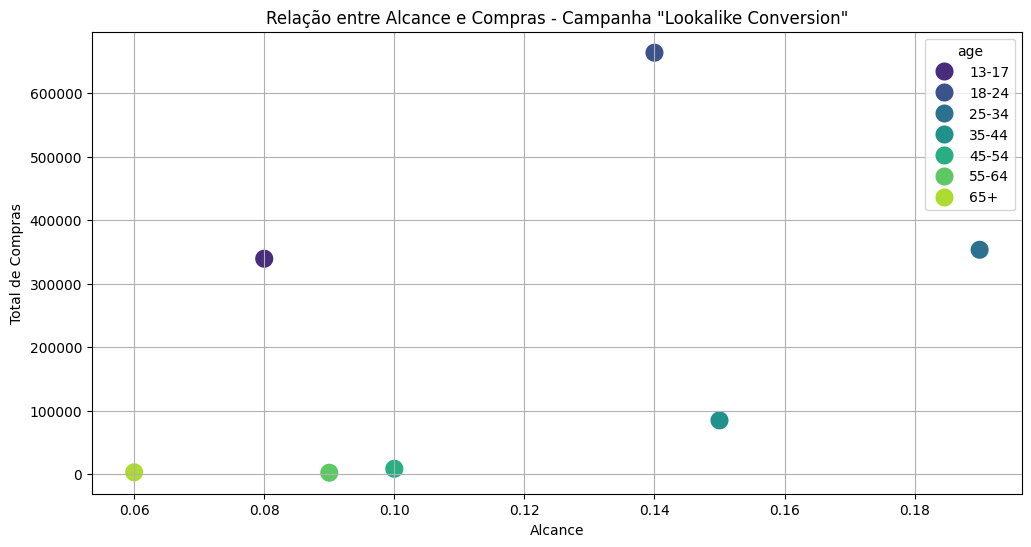

C:\Users\Matheus Rodrigues\AppData\Local\Temp\ipykernel_11544\1844344924.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_add_to_cart_age, x='age', y='link_clicks', palette='viridis')


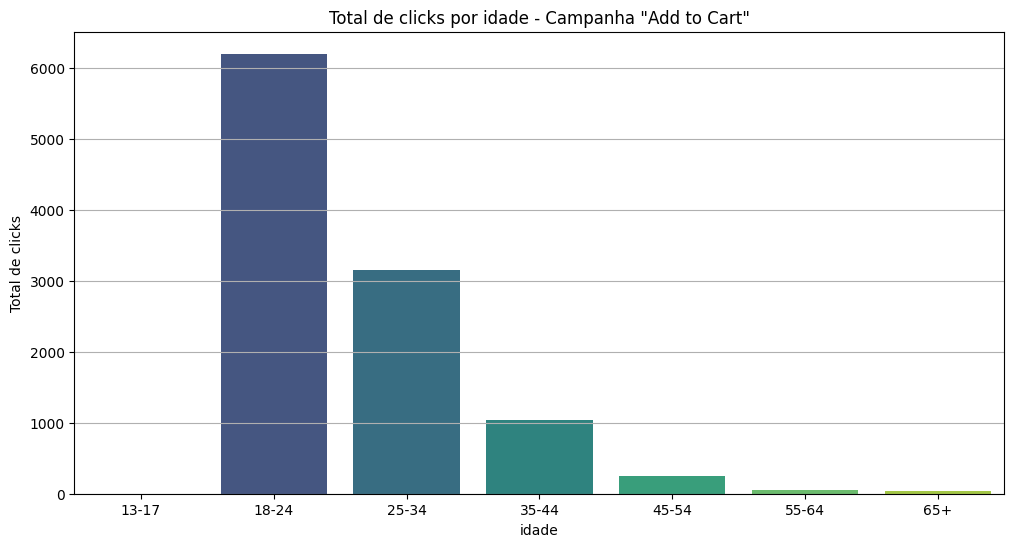

C:\Users\Matheus Rodrigues\AppData\Local\Temp\ipykernel_11544\1844344924.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_add_to_cart_age, x='age', y='cpc_link_usd', palette='viridis')


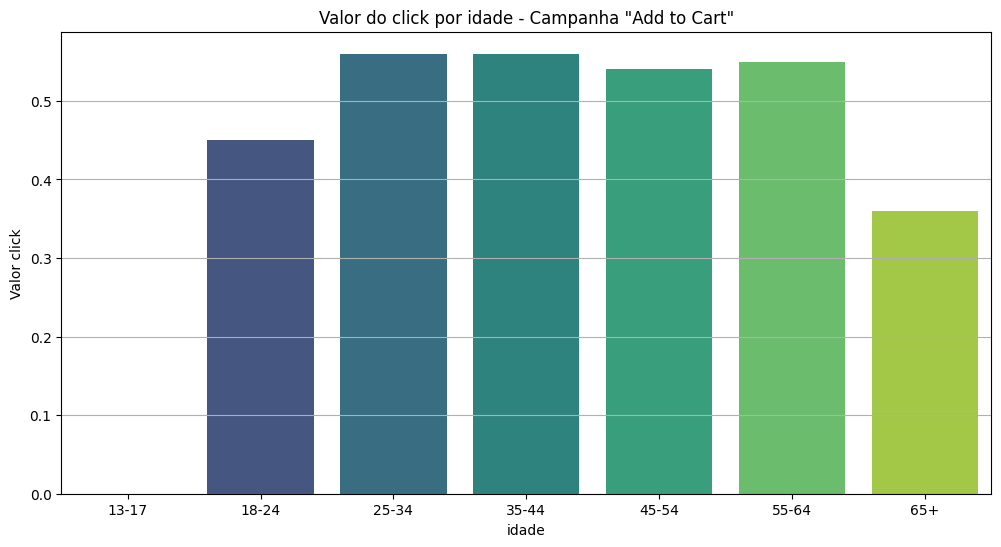

C:\Users\Matheus Rodrigues\AppData\Local\Temp\ipykernel_11544\1844344924.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_add_to_cart_age, x='age', y='roi(%)', palette='viridis')


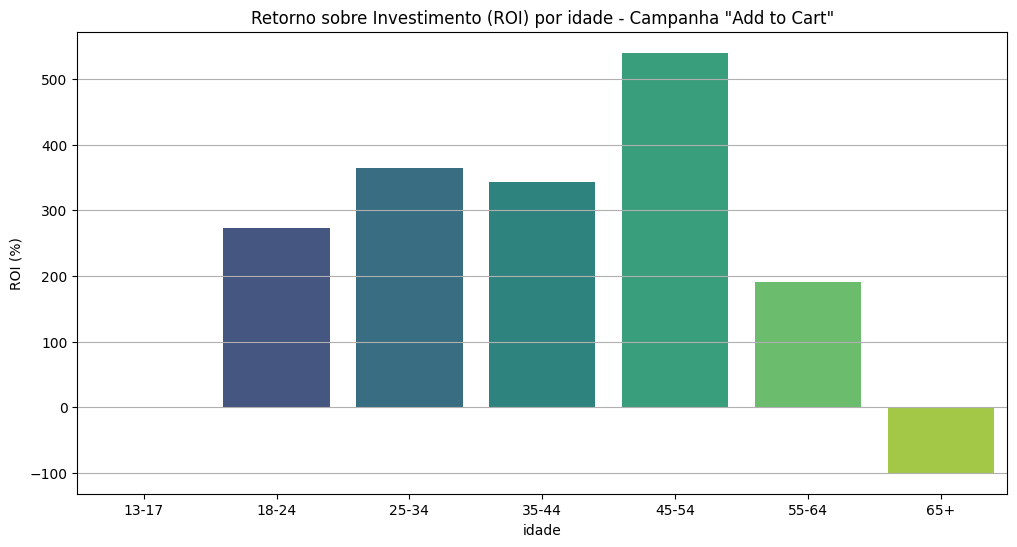

In [67]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=grouped_lookalike_age, x='cpc_link_usd', y='link_clicks', hue='age', palette='viridis', s=200)
plt.title('Relação entre Alcance e Compras - Campanha "Lookalike Conversion"')
plt.ylabel('Total de Compras')
plt.xlabel('Alcance')
plt.grid()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_add_to_cart_age, x='age', y='link_clicks', palette='viridis')
plt.title('Total de clicks por idade - Campanha "Add to Cart"')
plt.ylabel('Total de clicks')
plt.xlabel('idade')
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_add_to_cart_age, x='age', y='cpc_link_usd', palette='viridis')
plt.title('Valor do click por idade - Campanha "Add to Cart"')
plt.ylabel('Valor click')
plt.xlabel('idade')
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_add_to_cart_age, x='age', y='roi(%)', palette='viridis')
plt.title('Retorno sobre Investimento (ROI) por idade - Campanha "Add to Cart"')
plt.ylabel('ROI (%)')
plt.xlabel('idade')
plt.grid(axis='y')
plt.show()

<h4>Viewed<h4>

In [68]:
viewed_age_df = by_age_df_refatorado[by_age_df_refatorado['group_campanha'] == 'Viewed']

# Agrupar os dados pela coluna 'platform' e 'group_campanha'
grouped_viewed_age = viewed_age_df.groupby(['age', 'group_campanha']).agg({
    'reach': 'sum',
    'link_clicks': 'sum',
    'amount_spent_usd': 'sum',
    'purchase_conversion_value': 'sum'  # Incluindo o valor de conversão
}).reset_index()

# 1. Calcular a taxa de cliques (CTR)
grouped_viewed_age['ctr_all'] = (grouped_viewed_age['link_clicks'] / grouped_viewed_age['reach']) * 100

# 2. Calcular o CPM (Custo por Mil Impressões)
grouped_viewed_age['cpm_usd'] = (grouped_viewed_age['amount_spent_usd'] / grouped_viewed_age['reach']) * 1000

# 3. Calcular o CPC (Custo por Clique)
grouped_viewed_age['cpc_link_usd'] = grouped_viewed_age['amount_spent_usd'] / grouped_viewed_age['link_clicks']

# 4. Calcular o ROI (Retorno sobre Investimento)
grouped_viewed_age['roi'] = ((grouped_viewed_age['purchase_conversion_value'] - grouped_viewed_age['amount_spent_usd']) / grouped_viewed_age['amount_spent_usd']) * 100

total_amount_spent = grouped_viewed_age['amount_spent_usd'].sum()
total_purchase_value = grouped_viewed_age['purchase_conversion_value'].sum()

grouped_viewed_age['percentage_amount_spent_usd'] = (grouped_viewed_age['amount_spent_usd'] / total_amount_spent) * 100
grouped_viewed_age['percentage_purchase_conversion_value'] = (grouped_viewed_age['purchase_conversion_value'] / total_purchase_value) * 100

# Arredondar as colunas para 2 casas decimais
grouped_viewed_age = grouped_viewed_age.round(2)
grouped_viewed_age.head()

,age,group_campanha,reach,link_clicks,amount_spent_usd,purchase_conversion_value,ctr_all,cpm_usd,cpc_link_usd,roi,percentage_amount_spent_usd,percentage_purchase_conversion_value
0,13-17,Viewed,14,1,0.07,0.00,7.14,5.00,0.07,-100.00,0.00,0.00
1,18-24,Viewed,311294,14845,2215.76,5350.04,4.77,7.12,0.15,141.45,54.97,50.26
2,25-34,Viewed,131223,6040,1223.20,3514.24,4.60,9.32,0.20,187.30,30.34,33.02
3,35-44,Viewed,34003,2306,443.65,1189.09,6.78,13.05,0.19,168.02,11.01,11.17
4,45-54,Viewed,5970,661,112.38,375.79,11.07,18.82,0.17,234.39,2.79,3.53


C:\Users\Matheus Rodrigues\AppData\Local\Temp\ipykernel_11544\1985812742.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_viewed_age, x='age', y='reach', palette='viridis')


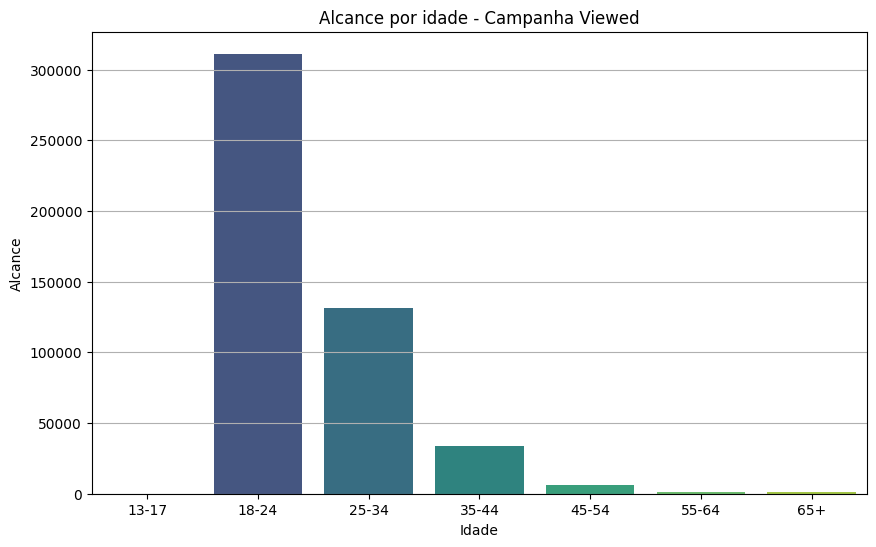

C:\Users\Matheus Rodrigues\AppData\Local\Temp\ipykernel_11544\1985812742.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_viewed_age, x='age', y='ctr_all', palette='viridis')


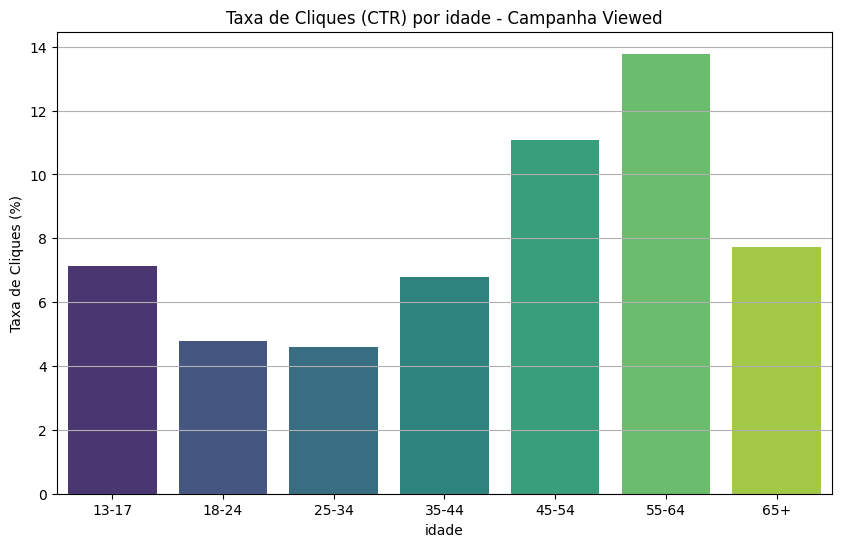

C:\Users\Matheus Rodrigues\AppData\Local\Temp\ipykernel_11544\1985812742.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_viewed_age, x='age', y='cpc_link_usd', palette='viridis')


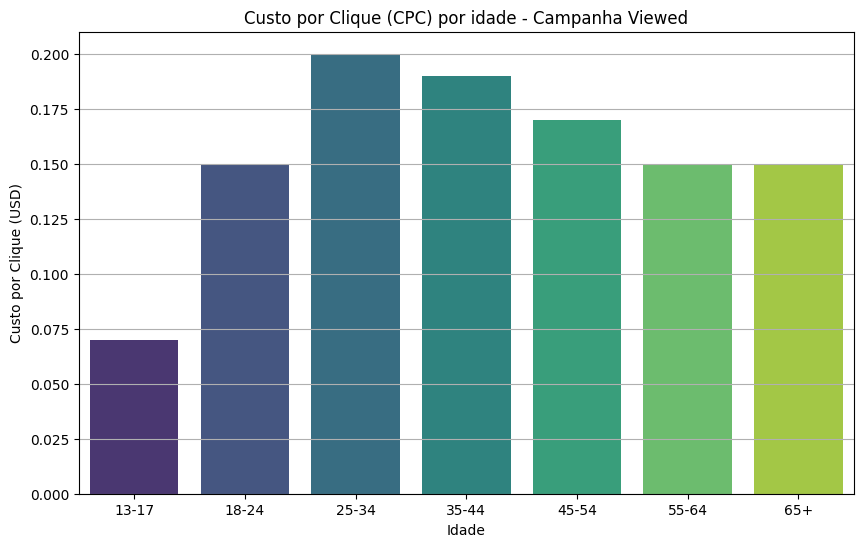

C:\Users\Matheus Rodrigues\AppData\Local\Temp\ipykernel_11544\1985812742.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_viewed_age, x='age', y='roi', palette='viridis')


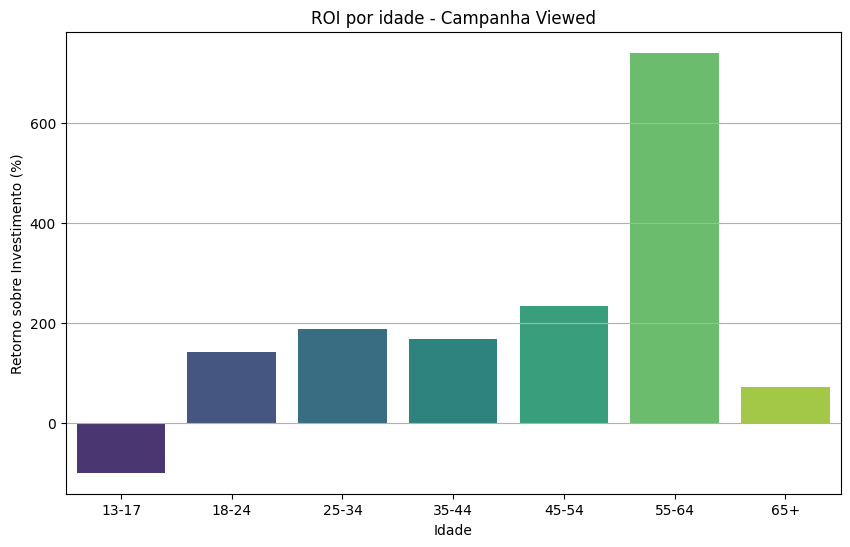

In [69]:
# Gráfico de Barras do Alcance por Plataforma
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_viewed_age, x='age', y='reach', palette='viridis')
plt.title('Alcance por idade - Campanha Viewed')
plt.xlabel('Idade')
plt.ylabel('Alcance')
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_viewed_age, x='age', y='ctr_all', palette='viridis')
plt.title('Taxa de Cliques (CTR) por idade - Campanha Viewed')
plt.xlabel('idade')
plt.ylabel('Taxa de Cliques (%)')
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_viewed_age, x='age', y='cpc_link_usd', palette='viridis')
plt.title('Custo por Clique (CPC) por idade - Campanha Viewed')
plt.xlabel('Idade')
plt.ylabel('Custo por Clique (USD)')
plt.grid(axis='y')
plt.show()

# Gráfico de Barras do ROI por Plataforma
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_viewed_age, x='age', y='roi', palette='viridis')
plt.title('ROI por idade - Campanha Viewed')
plt.xlabel('Idade')
plt.ylabel('Retorno sobre Investimento (%)')
plt.grid(axis='y')
plt.show()

<h4>Segmentação Demográfica e Geográfica<h4>

In [70]:
segmentation_df_age = by_age_df_refatorado[by_age_df_refatorado['group_campanha'] == 'Segmentação Demográfica e Geográfica']

# Agrupar os dados pela coluna 'Platform' e 'group_campanha'
grouped_segmentation_age = segmentation_df_age.groupby(['age', 'group_campanha']).agg({
    'reach': 'sum',
    'link_clicks': 'sum',
    'amount_spent_usd': 'sum',
    'purchase_conversion_value': 'sum',
    'frequency': 'mean',  # A média de frequência
    'ctr_all': 'mean',     # A média de CTR
    'cpm_usd': 'mean',     # A média de CPM
    'cpc_link_usd': 'mean' # A média de CPC
}).reset_index()

# Calcular o ROI (Retorno sobre Investimento)
grouped_segmentation_age['roi'] = ((grouped_segmentation_age['purchase_conversion_value'] - grouped_segmentation_age['amount_spent_usd']) / grouped_segmentation_age['amount_spent_usd']) * 100

# Calcular as porcentagens proporcionais
total_amount_spent_segmentation = grouped_segmentation_age['amount_spent_usd'].sum()
total_purchase_value_segmentation = grouped_segmentation_age['purchase_conversion_value'].sum()

grouped_segmentation_age['percentage_amount_spent_usd'] = (grouped_segmentation_age['amount_spent_usd'] / total_amount_spent_segmentation) * 100
grouped_segmentation_age['percentage_purchase_conversion_value'] = (grouped_segmentation_age['purchase_conversion_value'] / total_purchase_value_segmentation) * 100

# Arredondar as colunas para 2 casas decimais
grouped_segmentation_age = grouped_segmentation_age.round(2)
grouped_segmentation_age.head(10)


,age,group_campanha,reach,link_clicks,amount_spent_usd,purchase_conversion_value,frequency,ctr_all,cpm_usd,cpc_link_usd,roi,percentage_amount_spent_usd,percentage_purchase_conversion_value
0,13-17,Segmentação Demográfica e Geográfica,273922,4137,312.75,235.70,1.60,0.05,1.44,0.07,-24.64,56.59,41.69
1,18-24,Segmentação Demográfica e Geográfica,187107,1626,152.60,255.03,1.18,0.02,0.56,0.25,67.12,27.61,45.10
2,25-34,Segmentação Demográfica e Geográfica,72564,871,80.74,24.90,1.15,0.02,0.70,1.23,-69.16,14.61,4.40
3,35-44,Segmentação Demográfica e Geográfica,3953,59,6.58,49.80,1.12,0.03,1.08,0.12,656.84,1.19,8.81


<h4>Visualização - Segmentação Demográfica e Geográfica<h4>

C:\Users\Matheus Rodrigues\AppData\Local\Temp\ipykernel_11544\241082438.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_segmentation_age, x='age', y='amount_spent_usd', palette='viridis')


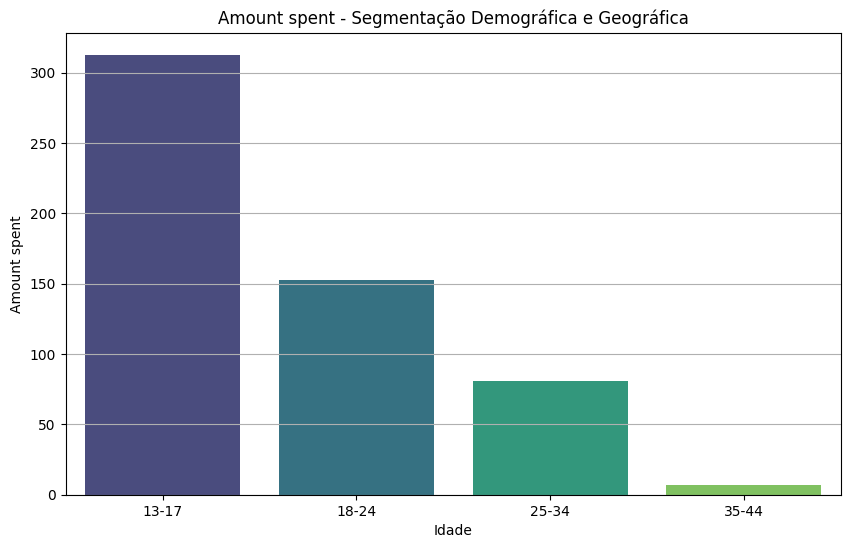

C:\Users\Matheus Rodrigues\AppData\Local\Temp\ipykernel_11544\241082438.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_segmentation_age, x='age', y='frequency', palette='viridis')


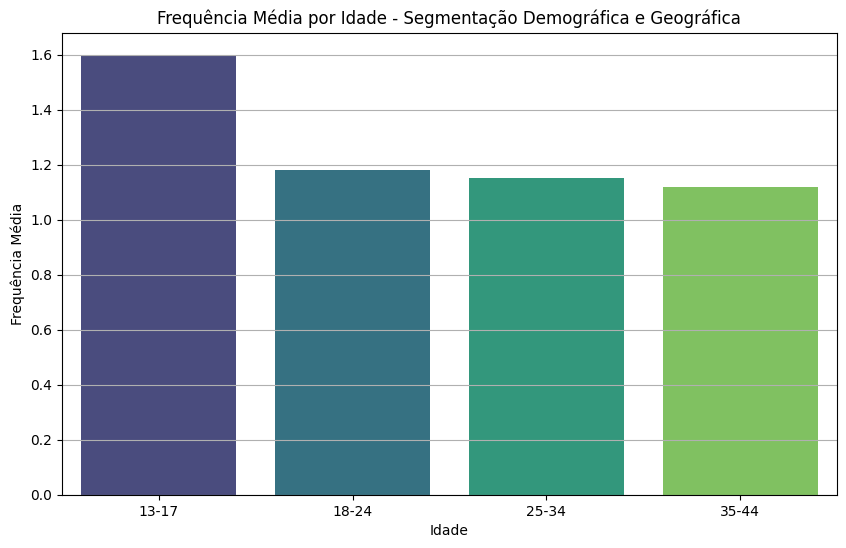

C:\Users\Matheus Rodrigues\AppData\Local\Temp\ipykernel_11544\241082438.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_segmentation_age, x='age', y='ctr_all', palette='viridis')


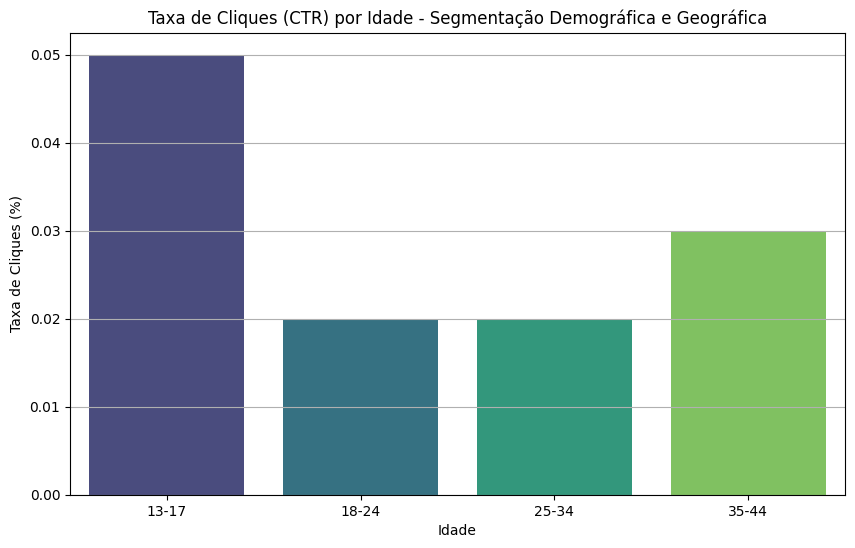

C:\Users\Matheus Rodrigues\AppData\Local\Temp\ipykernel_11544\241082438.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_segmentation_age, x='age', y='cpm_usd', palette='viridis')


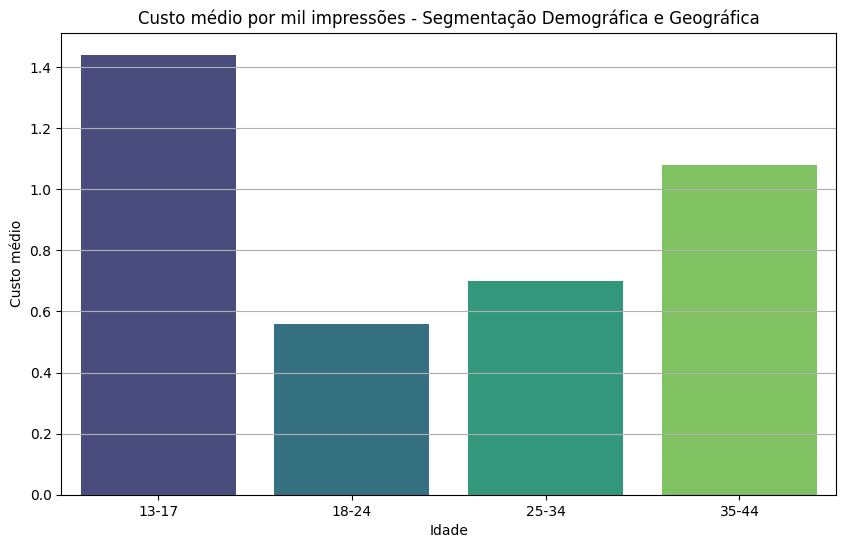

C:\Users\Matheus Rodrigues\AppData\Local\Temp\ipykernel_11544\241082438.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_segmentation_age, x='age', y='reach', palette='viridis')


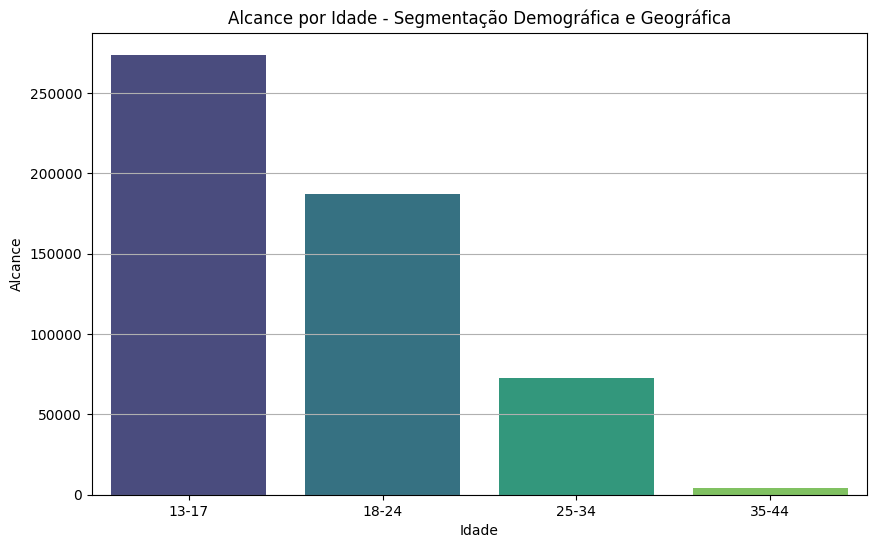

C:\Users\Matheus Rodrigues\AppData\Local\Temp\ipykernel_11544\241082438.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_segmentation_age, x='age', y='cpc_link_usd', palette='viridis')


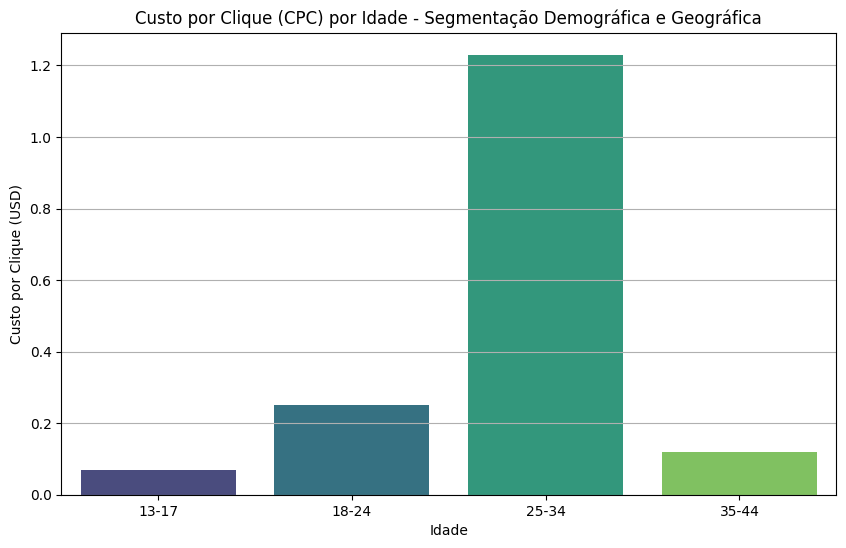

In [71]:
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_segmentation_age, x='age', y='amount_spent_usd', palette='viridis')
plt.title('Amount spent - Segmentação Demográfica e Geográfica')
plt.xlabel('Idade')
plt.ylabel('Amount spent')
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_segmentation_age, x='age', y='frequency', palette='viridis')
plt.title('Frequência Média por Idade - Segmentação Demográfica e Geográfica')
plt.xlabel('Idade')
plt.ylabel('Frequência Média')
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_segmentation_age, x='age', y='ctr_all', palette='viridis')
plt.title('Taxa de Cliques (CTR) por Idade - Segmentação Demográfica e Geográfica')
plt.xlabel('Idade')
plt.ylabel('Taxa de Cliques (%)')
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_segmentation_age, x='age', y='cpm_usd', palette='viridis')
plt.title('Custo médio por mil impressões - Segmentação Demográfica e Geográfica')
plt.xlabel('Idade')
plt.ylabel('Custo médio')
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_segmentation_age, x='age', y='reach', palette='viridis')
plt.title('Alcance por Idade - Segmentação Demográfica e Geográfica')
plt.xlabel('Idade')
plt.ylabel('Alcance')
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_segmentation_age, x='age', y='cpc_link_usd', palette='viridis')
plt.title('Custo por Clique (CPC) por Idade - Segmentação Demográfica e Geográfica')
plt.xlabel('Idade')
plt.ylabel('Custo por Clique (USD)')
plt.grid(axis='y')
plt.show()

<h4>Instagram Campanha<h4>

In [72]:
instagram_campaign_age_df = by_age_df_refatorado[by_age_df_refatorado['group_campanha'] == 'Instagram Campanha']

# Agrupando os dados pela coluna 'Platform' e 'group_campanha'
grouped_instagram_age = instagram_campaign_age_df.groupby(['age', 'group_campanha']).agg({
    'reach': 'sum',
    'link_clicks': 'sum',
    'amount_spent_usd': 'sum',
    'purchase_conversion_value': 'sum',
    'frequency': 'sum',  # Somando a frequência
    'ctr_all': 'mean',   # Média da taxa de cliques
    'cpm_usd': 'mean',   # Média do CPM
    'cpc_link_usd': 'mean'  # Média do CPC
}).reset_index()

# Calculando ROI
grouped_instagram_age['roi'] = ((grouped_instagram_age['purchase_conversion_value'] - grouped_instagram_age['amount_spent_usd']) / grouped_instagram_age['amount_spent_usd']) * 100

# Calculando as porcentagens proporcionais
total_amount_spent_instagram = grouped_instagram_age['amount_spent_usd'].sum()
total_purchase_value_instagram = grouped_instagram_age['purchase_conversion_value'].sum()

grouped_instagram_age['percentage_amount_spent_usd'] = (grouped_instagram_age['amount_spent_usd'] / total_amount_spent_instagram) * 100
grouped_instagram_age['percentage_purchase_conversion_value'] = (grouped_instagram_age['purchase_conversion_value'] / total_purchase_value_instagram) * 100

# Arredondar os resultados para 2 casas decimais
grouped_instagram_age = grouped_instagram_age.round(2)

# Exibindo os resultados
grouped_instagram_age.head()

,age,group_campanha,reach,link_clicks,amount_spent_usd,purchase_conversion_value,frequency,ctr_all,cpm_usd,cpc_link_usd,roi,percentage_amount_spent_usd,percentage_purchase_conversion_value
0,18-24,Instagram Campanha,2033,11,4.02,0.0,1.0,0.01,1.98,0.37,-100.0,80.4,NaN
1,25-34,Instagram Campanha,317,0,0.60,0.0,1.0,0.01,1.89,0.00,-100.0,12.0,NaN
2,35-44,Instagram Campanha,144,2,0.25,0.0,1.0,0.01,1.74,0.12,-100.0,5.0,NaN
3,45-54,Instagram Campanha,38,0,0.08,0.0,1.0,0.00,2.11,0.00,-100.0,1.6,NaN
4,55-64,Instagram Campanha,15,0,0.03,0.0,1.0,0.00,2.00,0.00,-100.0,0.6,NaN


C:\Users\Matheus Rodrigues\AppData\Local\Temp\ipykernel_11544\2199955662.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_instagram_age, x='age', y='reach', palette='viridis')


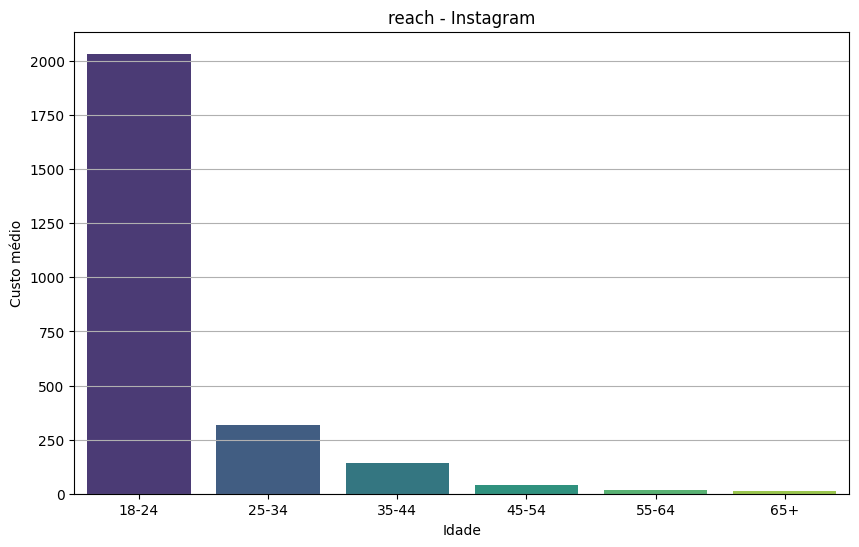

C:\Users\Matheus Rodrigues\AppData\Local\Temp\ipykernel_11544\2199955662.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_instagram_age, x='age', y='cpm_usd', palette='viridis')


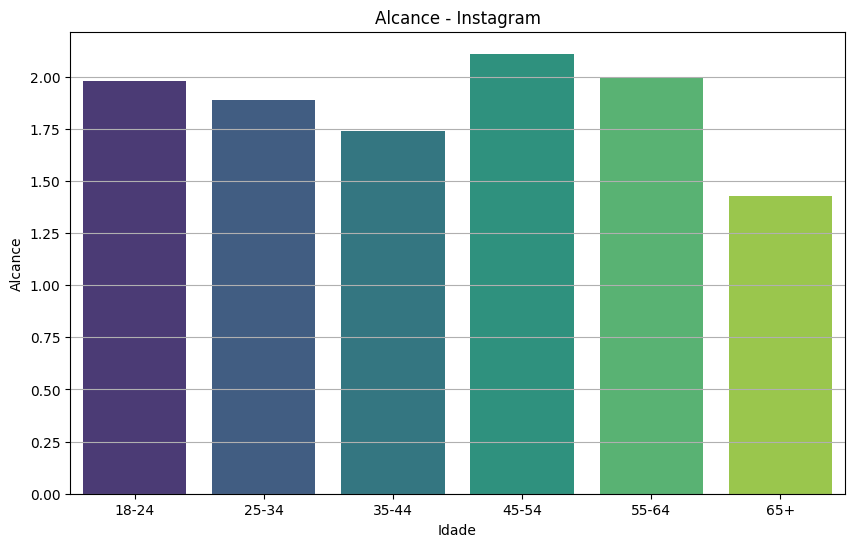

In [73]:
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_instagram_age, x='age', y='reach', palette='viridis')
plt.title('reach - Instagram')
plt.xlabel('Idade')
plt.ylabel('Custo médio')
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_instagram_age, x='age', y='cpm_usd', palette='viridis')
plt.title('Alcance - Instagram')
plt.xlabel('Idade')
plt.ylabel('Alcance')
plt.grid(axis='y')
plt.show()

<h2>Análise por <strong>país<strong><h2>

                               result_rate_std  results_std  reach_std   
result_rate_std                       1.000000     0.114197  -0.085456  \
results_std                           0.114197     1.000000   0.271399   
reach_std                            -0.085456     0.271399   1.000000   
frequency_std                        -0.007601     0.013330   0.033678   
link_clicks_std                      -0.069385     0.118831   0.852484   
ctr_all_std                           0.093596     0.021739   0.014840   
add_to_cart_std                      -0.065772     0.004828   0.755047   
initiate_checkout_std                -0.066125     0.007068   0.758519   
purchase_std                         -0.064955    -0.006577   0.721105   
amount_spent_usd_std                 -0.102616    -0.007805   0.773162   
purchase_conversion_value_std        -0.065445    -0.006814   0.702622   

                               frequency_std  link_clicks_std  ctr_all_std   
result_rate_std                  

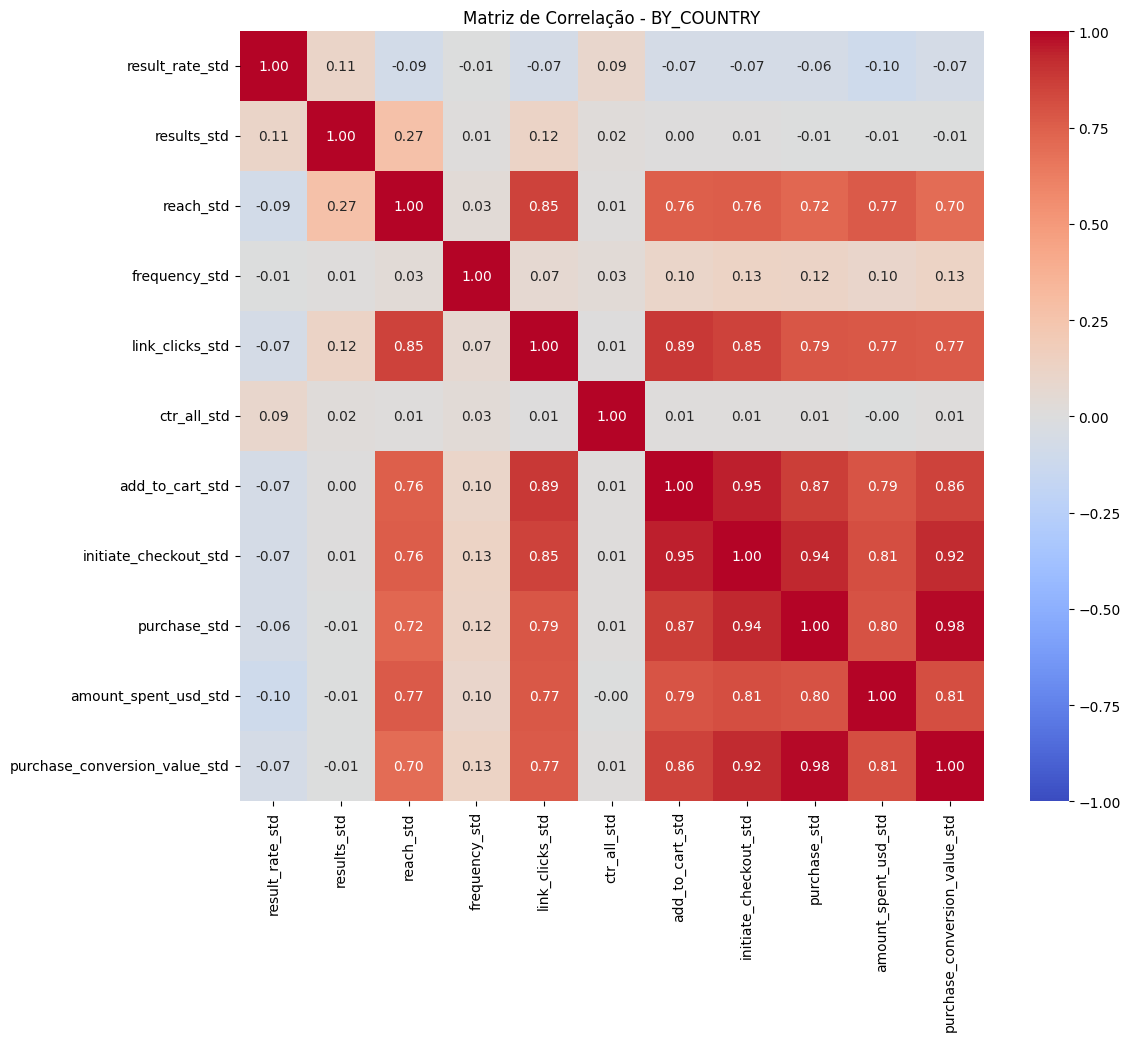

In [74]:
# Chame a função passando o DataFrame e as colunas selecionadas
plot_correlation_matrix(by_country_df_std, selected_columns, title='Matriz de Correlação - BY_COUNTRY')

In [75]:
print(by_country_df_refatorado.columns)

Index(['group_campanha', 'country_name', 'population', 'result_rate',
       'result_indicator', 'results', 'reach', 'frequency', 'link_clicks',
       'cpc_link_usd', 'cpc_all_usd', 'cpm_usd', 'ctr_all', 'add_to_cart',
       'cost_per_add_to_cart_usd', 'initiate_checkout',
       'cost_per_initiate_checkout_usd', 'purchase', 'cost_per_purchase_usd',
       'amount_spent_usd', 'purchase_conversion_value'],
      dtype='object')


<h4>Lookalike Conversion<h4>

In [76]:
by_country_df_refatorado.head(20)

,group_campanha,country_name,population,result_rate,result_indicator,results,reach,frequency,link_clicks,cpc_link_usd,...,cpm_usd,ctr_all,add_to_cart,cost_per_add_to_cart_usd,initiate_checkout,cost_per_initiate_checkout_usd,purchase,cost_per_purchase_usd,amount_spent_usd,purchase_conversion_value
0,Lookalike Conversion,Guam,165768.0,0.159646,actions:post_engagement,379,1533,1.548598,6,0.005000,...,0.019569,0.009267,10,0.003000,1,0.030000,1,0.03,0.03,24.90
1,Lookalike Conversion,Spain,46796540.0,0.046080,actions:post_engagement,191,4095,1.012210,6,0.005000,...,0.007326,0.053317,3,0.010000,1,0.030000,1,0.03,0.03,24.90
2,Lookalike Conversion,Slovakia,5446771.0,0.078705,actions:post_engagement,282,3071,1.166721,34,0.001176,...,0.013025,0.084287,2,0.020000,1,0.040000,1,0.04,0.04,29.40
3,Lookalike Conversion,NaN,NaN,0.139437,actions:post_engagement,198,1023,1.388074,15,0.004000,...,0.058651,0.009859,2,0.030000,1,0.060000,1,0.06,0.06,47.43
4,Viewed,Albania,2866376.0,0.147059,actions:offsite_conversion,5,16,2.125000,0,0.000000,...,4.375000,0.058824,1,0.070000,1,0.070000,1,0.07,0.07,21.90
5,Add to cart,Chile,18729160.0,1.290323,actions:offsite_conversion,40,5,6.200000,2,0.050000,...,20.000000,0.161290,12,0.008333,10,0.010000,1,0.10,0.10,24.90
6,Add to cart,Poland,37974750.0,0.484536,actions:offsite_conversion,47,6,16.166667,2,0.190000,...,63.333333,0.030928,16,0.023750,7,0.054286,2,0.19,0.38,49.80
7,Lookalike Conversion,Ireland,4867309.0,0.006098,actions:offsite_conversion.fb_pixel_initiate_c...,1,144,1.138889,0,0.000000,...,1.736111,0.024390,2,0.125000,1,0.250000,1,0.25,0.25,30.80
8,Viewed,Chile,18729160.0,0.319149,actions:offsite_conversion,45,40,3.525000,1,0.290000,...,7.250000,0.056738,3,0.096667,2,0.145000,1,0.29,0.29,30.80
9,Viewed,Luxembourg,607950.0,0.315789,actions:offsite_conversion,24,40,1.900000,1,0.300000,...,7.500000,0.013158,7,0.042857,7,0.042857,1,0.30,0.30,21.90


In [77]:
lookalike_conversion_country_df = by_country_df_refatorado[by_country_df_refatorado['group_campanha'] == 'Lookalike Conversion']

# Agrupar os dados por país
grouped_lookalike_country = lookalike_conversion_country_df.groupby('country_name').agg({
    'result_rate': 'sum', 
    'population': 'mean',  
    'reach': 'sum',        
    'link_clicks': 'sum',   
    'purchase': 'sum',      
    'amount_spent_usd': 'sum',          
    'purchase_conversion_value': 'sum'  
}).reset_index()

# 1. Calcular a taxa de conversão (Conversion Rate)
grouped_lookalike_country['conversion_rate (%)'] = (grouped_lookalike_country['purchase'] / grouped_lookalike_country['link_clicks']) * 100

# 2. Calcular o CPC (Custo por Clique)
grouped_lookalike_country['cpc_link_usd'] = grouped_lookalike_country['amount_spent_usd'] / grouped_lookalike_country['link_clicks']

# 3. Calcular o CPA (Custo por Aquisição)
grouped_lookalike_country['cpa_usd'] = grouped_lookalike_country['amount_spent_usd'] / grouped_lookalike_country['purchase']

# 4. Calcular o alcance ajustado pela população (Alcance por tamanho da população)
grouped_lookalike_country['reach_per_population (%)'] = (grouped_lookalike_country['reach'] / grouped_lookalike_country['population']) * 100

# 5. Calcular o ROI para cada país
grouped_lookalike_country['ROI (%)'] = ((grouped_lookalike_country['purchase_conversion_value'] - grouped_lookalike_country['amount_spent_usd']) / grouped_lookalike_country['amount_spent_usd']) * 100

# 6. Calcular as porcentagens proporcionais de gastos e valor de conversão
total_amount_spent = grouped_lookalike_country['amount_spent_usd'].sum()
total_purchase_value = grouped_lookalike_country['purchase_conversion_value'].sum()

grouped_lookalike_country['percentage_amount_spent_usd'] = (grouped_lookalike_country['amount_spent_usd'] / total_amount_spent) * 100
grouped_lookalike_country['percentage_purchase_conversion_value'] = (grouped_lookalike_country['purchase_conversion_value'] / total_purchase_value) * 100

# 7. Filtrar as linhas onde o ROI é maior que -100.00
grouped_lookalike_country = grouped_lookalike_country.loc[grouped_lookalike_country['ROI (%)'] > -100.00]

# 8. Remover as linhas com valores NaN
grouped_lookalike_country = grouped_lookalike_country.dropna()

# 9. Selecionar as colunas relevantes
final_columns = [
    'country_name', 'population', 'reach_per_population (%)', 'result_rate', 'conversion_rate (%)', 'link_clicks', 'cpc_link_usd',
    'cpa_usd', 'amount_spent_usd', 'percentage_amount_spent_usd',
    'purchase_conversion_value', 'percentage_purchase_conversion_value', 'ROI (%)'
]
grouped_lookalike_country = grouped_lookalike_country[final_columns].round(2).sort_values(by='reach_per_population (%)', ascending=False).reset_index(drop=True)

# 10. Exibir as primeiras 10 linhas do DataFrame final
grouped_lookalike_country.head(10)

,country_name,population,reach_per_population (%),result_rate,conversion_rate (%),link_clicks,cpc_link_usd,cpa_usd,amount_spent_usd,percentage_amount_spent_usd,purchase_conversion_value,percentage_purchase_conversion_value,ROI (%)
0,Northern Ireland,1885400.0,368.60,8.16,0.67,110664,0.14,20.40,15156.98,7.48,24705.93,9.14,63.00
1,Belgium,11433256.0,64.21,4.97,1.00,80066,0.19,19.27,15417.31,7.61,27109.19,10.03,75.84
2,Luxembourg,607950.0,50.63,3.15,0.95,2727,0.21,21.63,562.31,0.28,1002.93,0.37,78.36
3,Netherlands,17231624.0,34.40,4.43,0.72,116139,0.15,20.99,17460.06,8.62,24575.03,9.09,40.75
4,Switzerland,8513227.0,33.41,2.92,1.49,31530,0.30,20.19,9510.03,4.70,17093.98,6.32,79.75
5,Italy,60421760.0,31.40,3.71,0.56,172572,0.15,27.03,26080.29,12.88,31361.40,11.60,20.25
6,Austria,8840521.0,23.99,3.02,0.72,28879,0.21,29.47,6129.54,3.03,7324.46,2.71,19.49
7,Spain,46796540.0,23.80,3.28,0.44,150313,0.12,28.31,18687.67,9.23,21397.90,7.91,14.50
8,Portugal,10283822.0,19.46,2.48,0.31,20705,0.11,36.43,2367.95,1.17,2310.81,0.85,-2.41
9,Ireland,4867309.0,19.00,2.67,0.89,8091,0.19,21.47,1546.18,0.76,2405.31,0.89,55.56


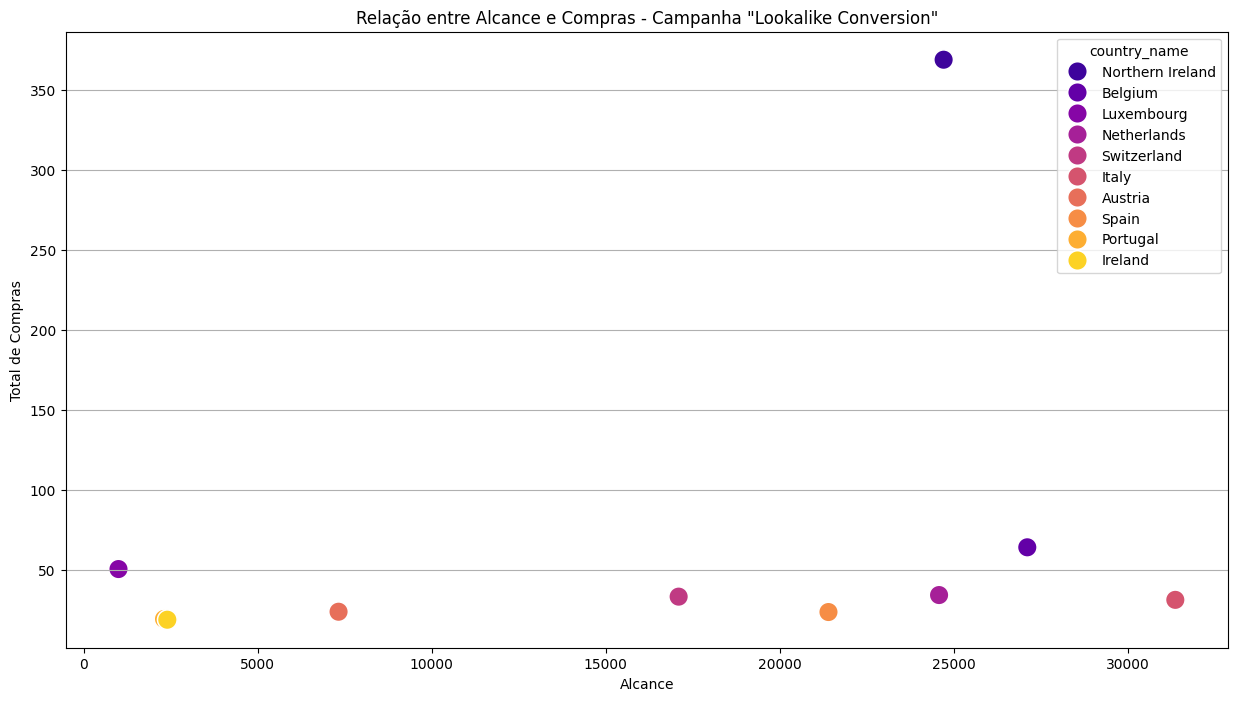

C:\Users\Matheus Rodrigues\AppData\Local\Temp\ipykernel_11544\3794700097.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10, x='country_name', y='reach_per_population (%)', palette='viridis')


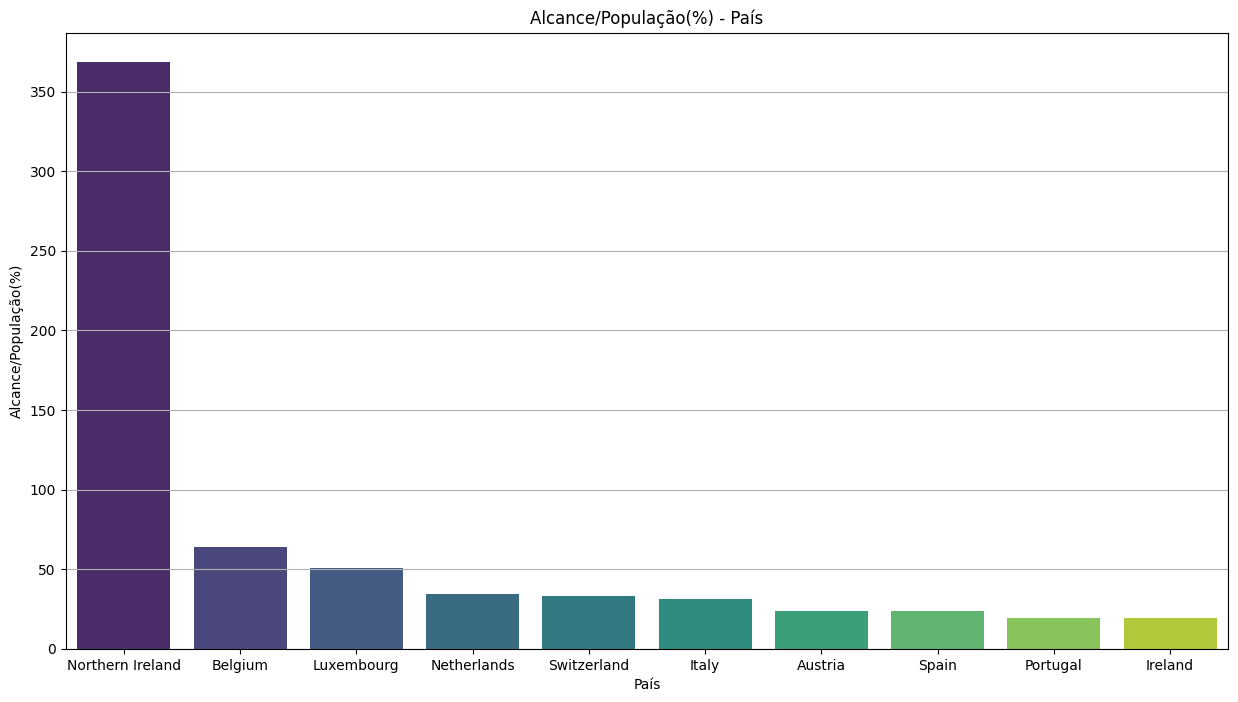

C:\Users\Matheus Rodrigues\AppData\Local\Temp\ipykernel_11544\3794700097.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10, x='country_name', y='result_rate', palette='viridis')


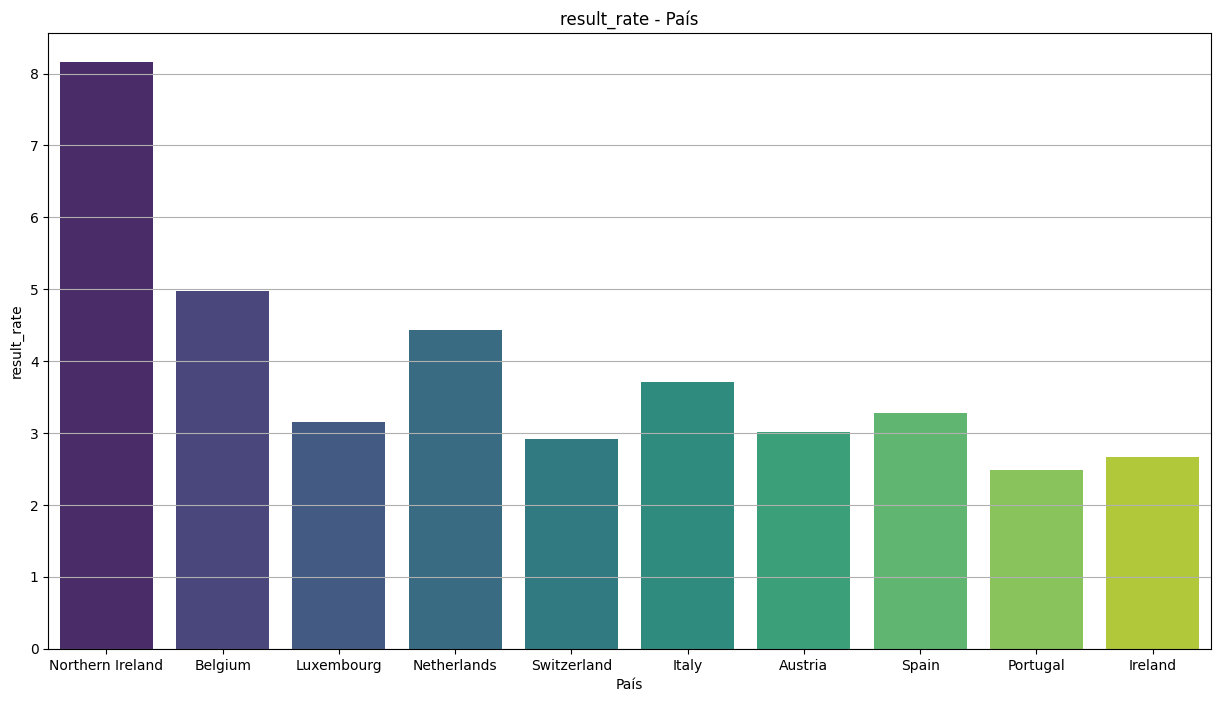

C:\Users\Matheus Rodrigues\AppData\Local\Temp\ipykernel_11544\3794700097.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10, x='country_name', y='amount_spent_usd', palette='viridis')


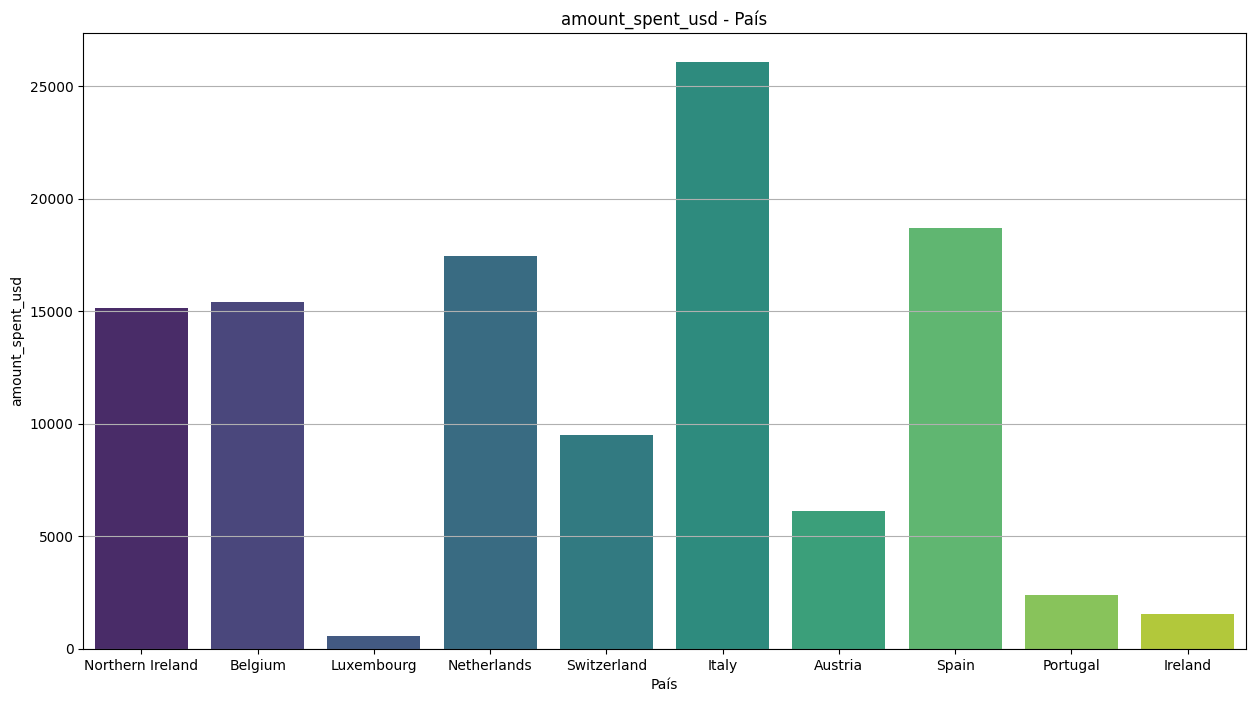

C:\Users\Matheus Rodrigues\AppData\Local\Temp\ipykernel_11544\3794700097.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10, x='country_name', y='conversion_rate (%)', palette='viridis')


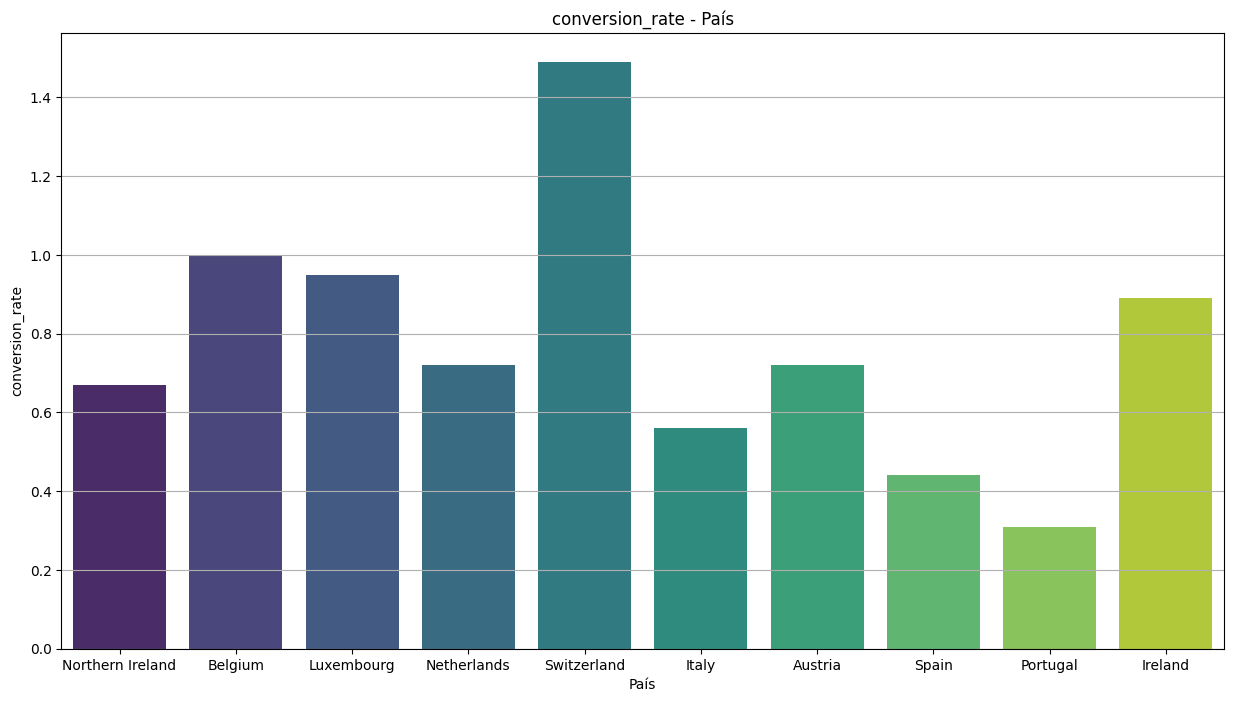

In [78]:
top_10 = grouped_lookalike_country.head(10)

plt.figure(figsize=(15, 8))
sns.scatterplot(data=top_10, x='purchase_conversion_value', y='reach_per_population (%)', hue='country_name', palette='plasma', s=200)
plt.title('Relação entre Alcance e Compras - Campanha "Lookalike Conversion"')
plt.ylabel('Total de Compras')
plt.xlabel('Alcance')
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(15, 8))
sns.barplot(data=top_10, x='country_name', y='reach_per_population (%)', palette='viridis')
plt.title('Alcance/População(%) - País')
plt.xlabel('País')
plt.ylabel('Alcance/População(%)')
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(15, 8))
sns.barplot(data=top_10, x='country_name', y='result_rate', palette='viridis')
plt.title('result_rate - País')
plt.xlabel('País')
plt.ylabel('result_rate')
plt.grid(axis='y')
plt.show()


plt.figure(figsize=(15, 8))
sns.barplot(data=top_10, x='country_name', y='amount_spent_usd', palette='viridis')
plt.title('amount_spent_usd - País')
plt.xlabel('País')
plt.ylabel('amount_spent_usd')
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(15, 8))
sns.barplot(data=top_10, x='country_name', y='conversion_rate (%)', palette='viridis')
plt.title('conversion_rate - País')
plt.xlabel('País')
plt.ylabel('conversion_rate')
plt.grid(axis='y')
plt.show()


<h4>Add to cart<h4>

In [195]:
# Filtrar os dados da campanha 'Add to Cart'
add_to_cart_country_df = by_country_df_refatorado[by_country_df_refatorado['group_campanha'] == 'Add to cart']

# Agrupar os dados pela coluna 'country_name' e 'group_campanha'
grouped_add_to_cart_country = add_to_cart_country_df.groupby(['country_name', 'group_campanha']).agg({
    'reach': 'sum',
    'link_clicks': 'sum',
    'purchase': 'sum',
    'amount_spent_usd': 'sum',
    'purchase_conversion_value': 'sum',
    'population': 'mean'
}).reset_index()

# Calcular a taxa de conversão
grouped_add_to_cart_country['conversion_rate'] = (grouped_add_to_cart_country['purchase'] / grouped_add_to_cart_country['link_clicks']) * 100

# Calcular o CPC (Custo por Clique)
grouped_add_to_cart_country['cpc_link_usd'] = grouped_add_to_cart_country['amount_spent_usd'] / grouped_add_to_cart_country['link_clicks']

# Calcular o alcance ajustado pela população (Alcance por tamanho da população)
grouped_add_to_cart_country['reach_per_population (%)'] = (grouped_add_to_cart_country['reach'] / grouped_add_to_cart_country['population']) * 100

# Calcular o ROI (Retorno sobre Investimento)
grouped_add_to_cart_country['roi(%)'] = ((grouped_add_to_cart_country['purchase_conversion_value'] - grouped_add_to_cart_country['amount_spent_usd']) / grouped_add_to_cart_country['amount_spent_usd']) * 100

# Calcular as porcentagens proporcionais
total_amount_spent = grouped_add_to_cart_country['amount_spent_usd'].sum()
total_purchase_value = grouped_add_to_cart_country['purchase_conversion_value'].sum()

grouped_add_to_cart_country['percentage_amount_spent_usd'] = (grouped_add_to_cart_country['amount_spent_usd'] / total_amount_spent) * 100
grouped_add_to_cart_country['percentage_purchase_conversion_value'] = (grouped_add_to_cart_country['purchase_conversion_value'] / total_purchase_value) * 100

# Filtrar linhas onde o ROI é maior que -100.00
grouped_add_to_cart_country = grouped_add_to_cart_country.loc[grouped_add_to_cart_country['roi(%)'] > -100.00]

# Remover linhas com valores NaN
grouped_add_to_cart_country = grouped_add_to_cart_country.dropna()

# Selecionar as colunas relevantes
final_columns = [
    'country_name', 'population', 'reach_per_population (%)', 'conversion_rate', 'link_clicks', 'cpc_link_usd',
    'purchase', 'amount_spent_usd', 'percentage_amount_spent_usd',
    'purchase_conversion_value', 'percentage_purchase_conversion_value', 'roi(%)'
]

# Ordenar o DataFrame pelas colunas especificadas
grouped_add_to_cart_country = grouped_add_to_cart_country[final_columns].round(2).sort_values(
    by=['purchase_conversion_value'], ascending=False  # Corrigido: removida a chamada errada ao método reset_index()
).reset_index(drop=True)

# Exibir as primeiras linhas do DataFrame final
grouped_add_to_cart_country.head(10)


,country_name,population,reach_per_population (%),conversion_rate,link_clicks,cpc_link_usd,purchase,amount_spent_usd,percentage_amount_spent_usd,purchase_conversion_value,percentage_purchase_conversion_value,roi(%)
0,Italy,60421760.0,0.04,4.45,2227,0.37,99,829.97,15.59,3400.53,15.35,309.72
1,Germany,82905782.0,0.02,7.80,1102,0.58,86,633.96,11.91,3142.68,14.19,395.72
2,United States,326687501.0,0.00,8.15,871,0.70,71,609.82,11.45,2497.98,11.28,309.63
3,Netherlands,17231624.0,0.07,7.63,865,0.59,66,510.87,9.59,2219.33,10.02,334.42
4,France,66977107.0,0.02,4.66,1138,0.49,53,561.49,10.55,1989.82,8.98,254.38
5,Belgium,11433256.0,0.12,5.35,1046,0.53,56,553.44,10.39,1973.81,8.91,256.64
6,Spain,46796540.0,0.03,2.94,1632,0.37,48,596.40,11.20,1850.17,8.35,210.22
7,Switzerland,8513227.0,0.08,8.16,441,0.66,36,291.77,5.48,1266.45,5.72,334.06
8,Northern Ireland,1885400.0,0.34,7.46,469,0.49,35,228.34,4.29,1142.05,5.16,400.15
9,Austria,8840521.0,0.05,7.71,363,0.48,28,174.87,3.28,905.17,4.09,417.62


C:\Users\Matheus Rodrigues\AppData\Local\Temp\ipykernel_11544\3423897888.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_add_to_cart, x='country_name', y='conversion_rate', palette='viridis')


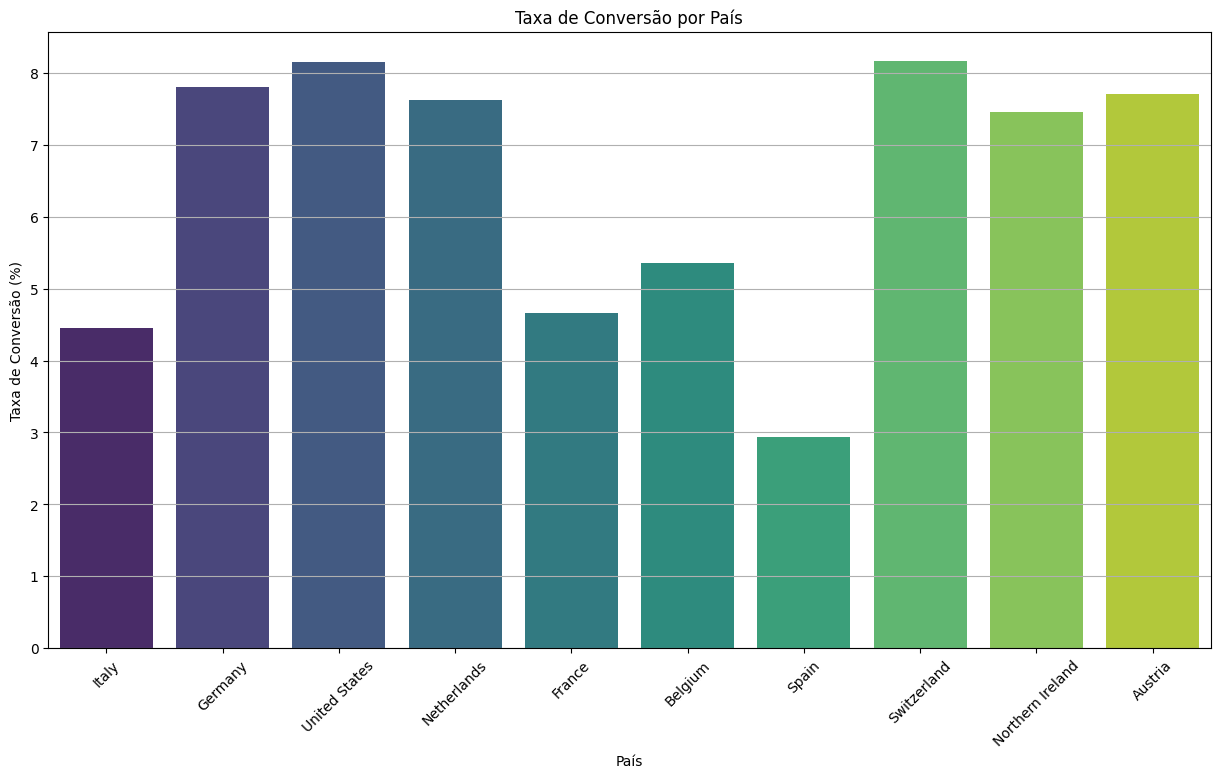

C:\Users\Matheus Rodrigues\AppData\Local\Temp\ipykernel_11544\3423897888.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_add_to_cart, x='country_name', y='link_clicks', palette='viridis')


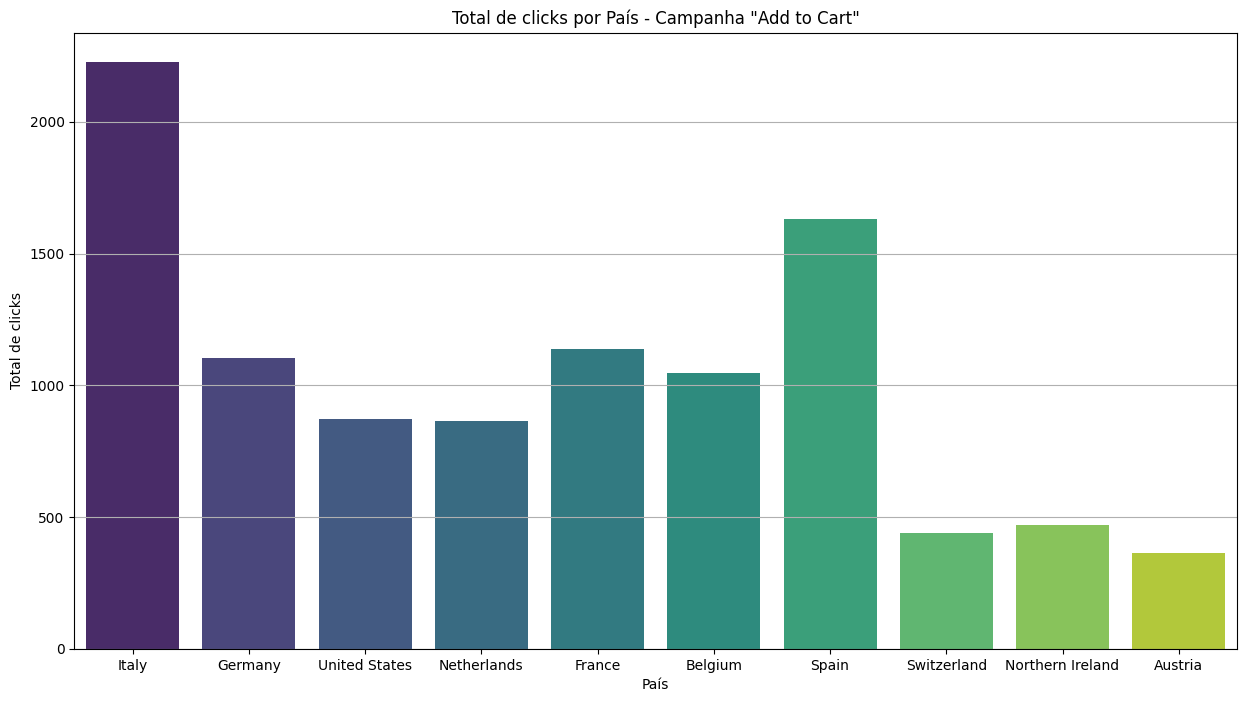

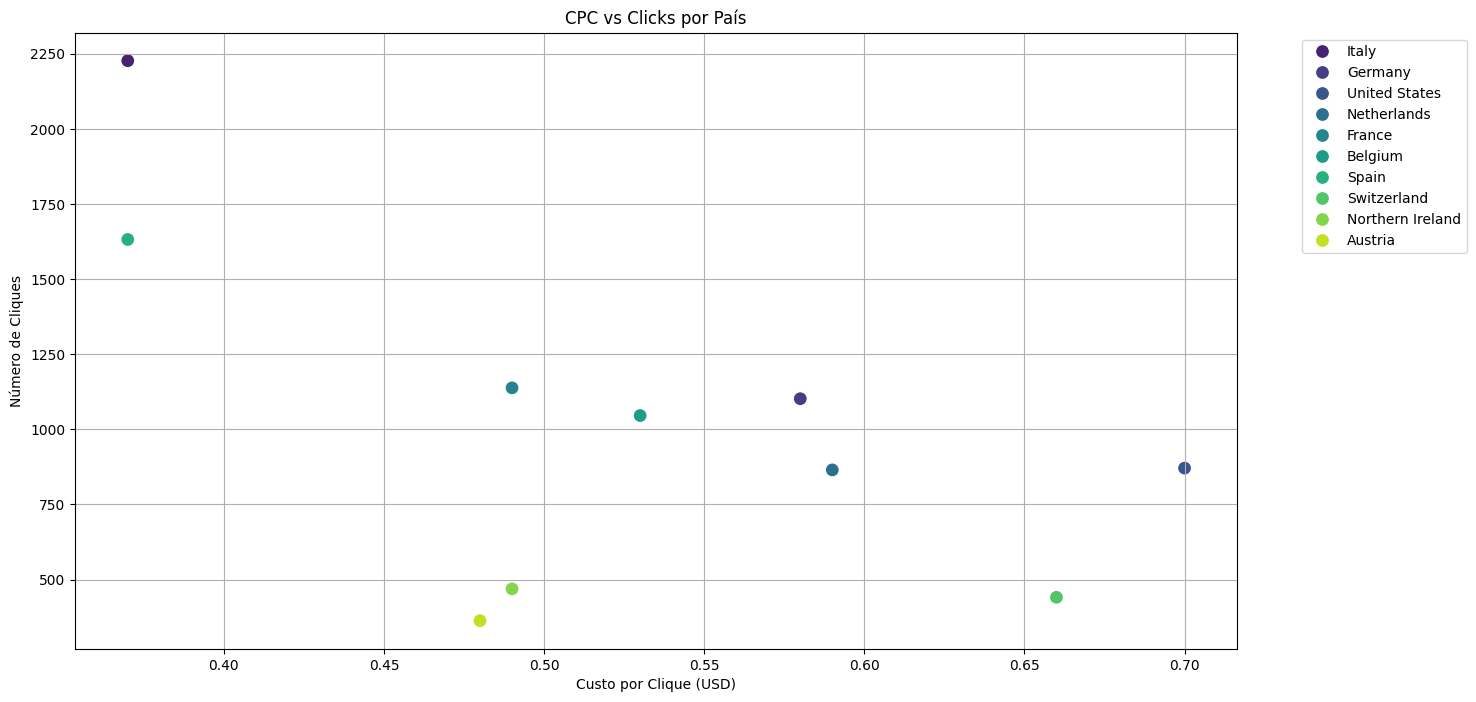

C:\Users\Matheus Rodrigues\AppData\Local\Temp\ipykernel_11544\3423897888.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_add_to_cart, x='country_name', y='purchase', palette='viridis')


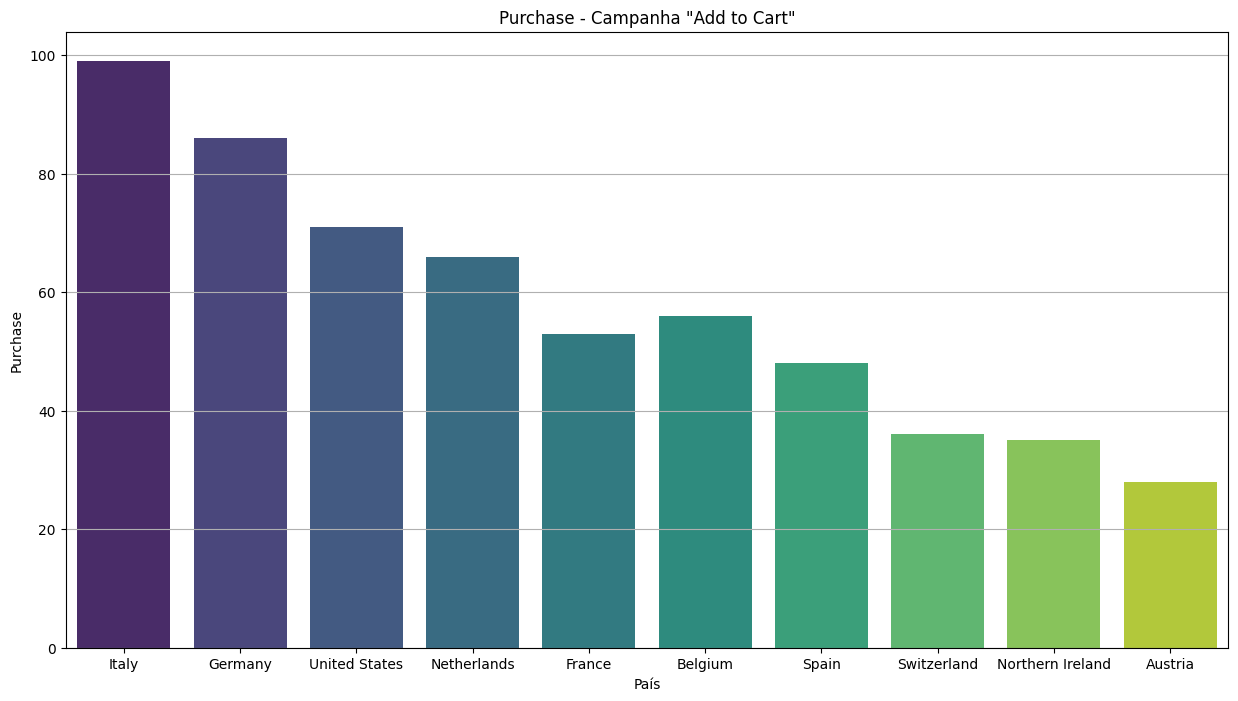

C:\Users\Matheus Rodrigues\AppData\Local\Temp\ipykernel_11544\3423897888.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_add_to_cart, x='country_name', y='cpc_link_usd', palette='viridis')


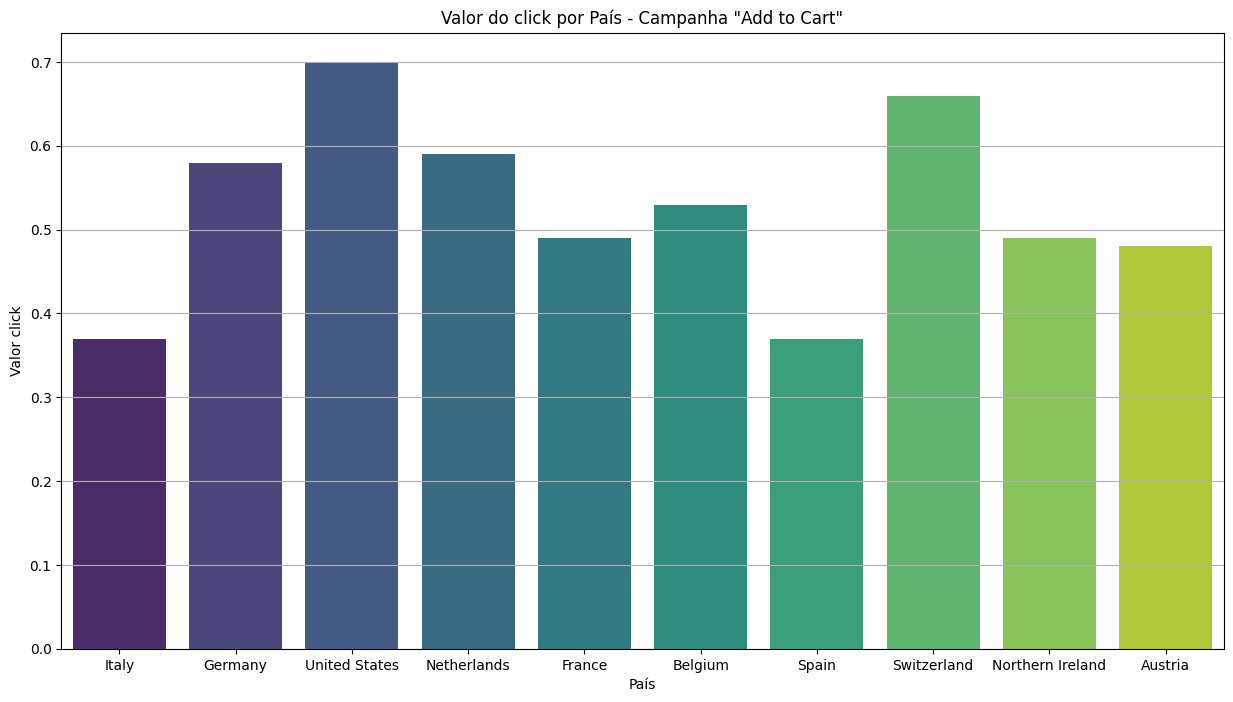

C:\Users\Matheus Rodrigues\AppData\Local\Temp\ipykernel_11544\3423897888.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_add_to_cart, x='country_name', y='roi(%)', palette='viridis')


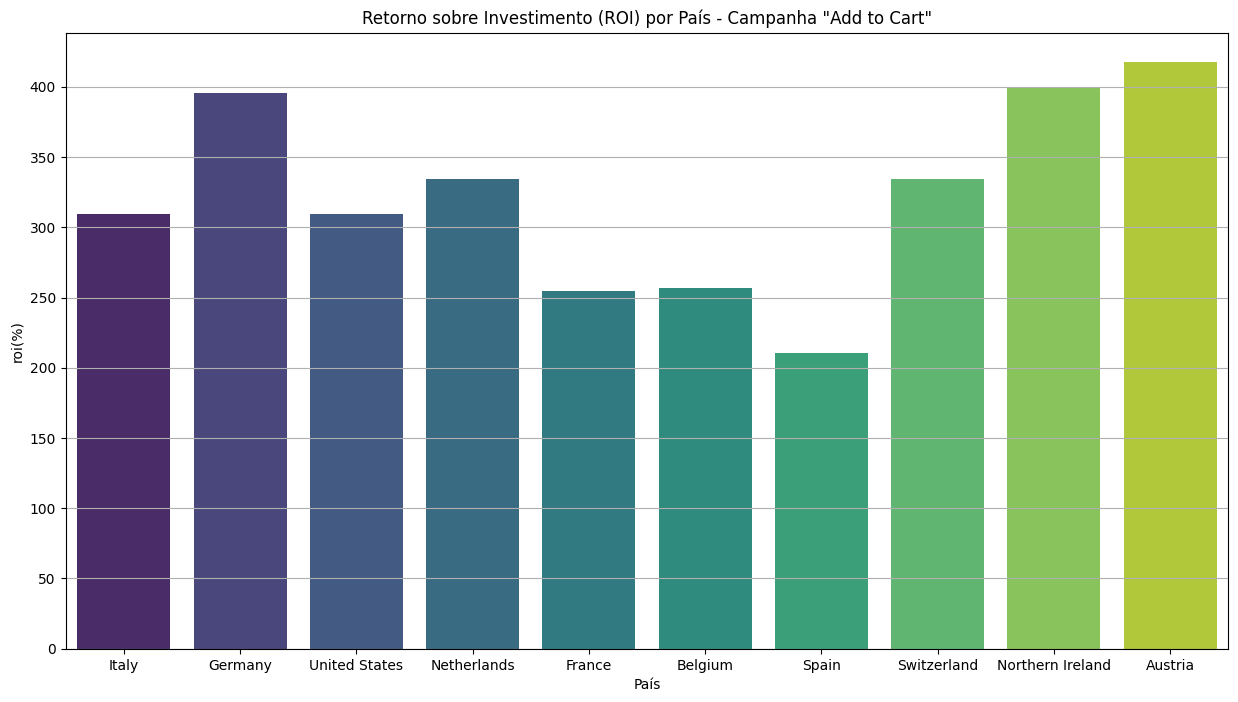

In [80]:
top_10_add_to_cart = grouped_add_to_cart_country.head(10)

plt.figure(figsize=(15, 8))
sns.barplot(data=top_10_add_to_cart, x='country_name', y='conversion_rate', palette='viridis')
plt.title('Taxa de Conversão por País')
plt.ylabel('Taxa de Conversão (%)')
plt.xlabel('País')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(15, 8))
sns.barplot(data=top_10_add_to_cart, x='country_name', y='link_clicks', palette='viridis')
plt.title('Total de clicks por País - Campanha "Add to Cart"')
plt.ylabel('Total de clicks')
plt.xlabel('País')
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(15, 8))
sns.scatterplot(data=top_10_add_to_cart, x='cpc_link_usd', y='link_clicks', hue='country_name', palette='viridis', s=100)
plt.title('CPC vs Clicks por País')
plt.ylabel('Número de Cliques')
plt.xlabel('Custo por Clique (USD)')
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

plt.figure(figsize=(15, 8))
sns.barplot(data=top_10_add_to_cart, x='country_name', y='purchase', palette='viridis')
plt.title('Purchase - Campanha "Add to Cart"')
plt.ylabel('Purchase')
plt.xlabel('País')
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(15, 8))
sns.barplot(data=top_10_add_to_cart, x='country_name', y='cpc_link_usd', palette='viridis')
plt.title('Valor do click por País - Campanha "Add to Cart"')
plt.ylabel('Valor click')
plt.xlabel('País')
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(15, 8))
sns.barplot(data=top_10_add_to_cart, x='country_name', y='roi(%)', palette='viridis')
plt.title('Retorno sobre Investimento (ROI) por País - Campanha "Add to Cart"')
plt.ylabel('roi(%)')
plt.xlabel('País')
plt.grid(axis='y')
plt.show()

<h4>Viewed<h4>

In [199]:
# Filtrar os dados da campanha 'Viewed'
viewed_country_df = by_country_df_refatorado[by_country_df_refatorado['group_campanha'] == 'Viewed']

grouped_viewed_country = viewed_country_df.groupby(['country_name', 'group_campanha']).agg({
    'reach': 'sum',
    'link_clicks': 'sum',
    'amount_spent_usd': 'sum',
    'population': 'mean',
    'purchase_conversion_value': 'sum',
    'purchase': 'sum'
}).reset_index()

# 1. Calcular a taxa de cliques (CTR)
grouped_viewed_country['ctr_all'] = (grouped_viewed_country['link_clicks'] / grouped_viewed_country['reach']) * 100

# 2. Calcular o CPM (Custo por Mil Impressões)
grouped_viewed_country['cpm_usd'] = (grouped_viewed_country['amount_spent_usd'] / grouped_viewed_country['reach']) * 1000

# 3. Calcular o alcance ajustado pela população (Alcance por tamanho da população)
grouped_viewed_country['reach_per_population (%)'] = (grouped_viewed_country['reach'] / grouped_viewed_country['population']) * 100

# 4. Calcular o CPC (Custo por Clique)
grouped_viewed_country['cpc_link_usd'] = grouped_viewed_country['amount_spent_usd'] / grouped_viewed_country['link_clicks']

# 5. Calcular o ROI (Retorno sobre Investimento)
grouped_viewed_country['roi(%)'] = ((grouped_viewed_country['purchase_conversion_value'] - grouped_viewed_country['amount_spent_usd']) / grouped_viewed_country['amount_spent_usd']) * 100
grouped_viewed_country['conversion_rate'] = (grouped_viewed_country['purchase'] / grouped_viewed_country['link_clicks']) * 100
# Calcular os totais para porcentagens
total_amount_spent = grouped_viewed_country['amount_spent_usd'].sum()
total_purchase_value = grouped_viewed_country['purchase_conversion_value'].sum()

grouped_viewed_country['percentage_amount_spent_usd'] = (grouped_viewed_country['amount_spent_usd'] / total_amount_spent) * 100
grouped_viewed_country['percentage_purchase_conversion_value'] = (grouped_viewed_country['purchase_conversion_value'] / total_purchase_value) * 100

# 6. Filtrar as linhas onde o ROI é maior que -100.00
grouped_viewed_country = grouped_viewed_country.loc[grouped_viewed_country['roi(%)'] > -100.00]

# 7. Remover as linhas com valores NaN
grouped_viewed_country = grouped_viewed_country.dropna()

# 8. Selecionar as colunas relevantes
final_columns = [
    'country_name', 'population', 'reach_per_population (%)', 'conversion_rate', 'ctr_all', 'link_clicks', 'cpc_link_usd', 'cpm_usd',
    'amount_spent_usd', 'percentage_amount_spent_usd',
    'purchase_conversion_value', 'percentage_purchase_conversion_value', 'roi(%)'
]

# 9. Ordenar o DataFrame pelas colunas especificadas
grouped_viewed_country = grouped_viewed_country[final_columns].round(2).sort_values(
    by=['reach_per_population (%)'], ascending=[False]  # Corrigido: adicionada a vírgula
).reset_index(drop=True)

# 10. Exibir as primeiras linhas do DataFrame final
grouped_viewed_country.head(10)


,country_name,population,reach_per_population (%),conversion_rate,ctr_all,link_clicks,cpc_link_usd,cpm_usd,amount_spent_usd,percentage_amount_spent_usd,purchase_conversion_value,percentage_purchase_conversion_value,roi(%)
0,Northern Ireland,1885400.0,1.52,2.71,4.12,1182,0.21,8.82,253.28,6.28,1002.69,9.42,295.88
1,Belgium,11433256.0,0.40,1.77,3.95,1811,0.22,8.57,392.98,9.75,1049.64,9.86,167.10
2,Luxembourg,607950.0,0.26,1.49,4.19,67,0.28,11.79,18.87,0.47,21.90,0.21,16.06
3,Netherlands,17231624.0,0.26,1.24,4.25,1938,0.21,8.85,403.42,10.01,764.96,7.19,89.62
4,Italy,60421760.0,0.17,0.97,5.04,5156,0.13,6.34,648.83,16.10,1579.74,14.84,143.48
5,Austria,8840521.0,0.16,0.74,4.63,674,0.18,8.52,124.15,3.08,275.52,2.59,121.93
6,Switzerland,8513227.0,0.16,2.15,4.21,558,0.20,8.41,111.38,2.76,445.06,4.18,299.59
7,Spain,46796540.0,0.16,0.81,6.86,5182,0.11,7.60,573.60,14.23,1306.45,12.27,127.76
8,Ireland,4867309.0,0.10,1.72,4.99,233,0.20,9.86,46.10,1.14,87.83,0.83,90.52
9,France,66977107.0,0.08,1.54,5.26,2656,0.18,9.28,468.85,11.63,1237.54,11.63,163.95


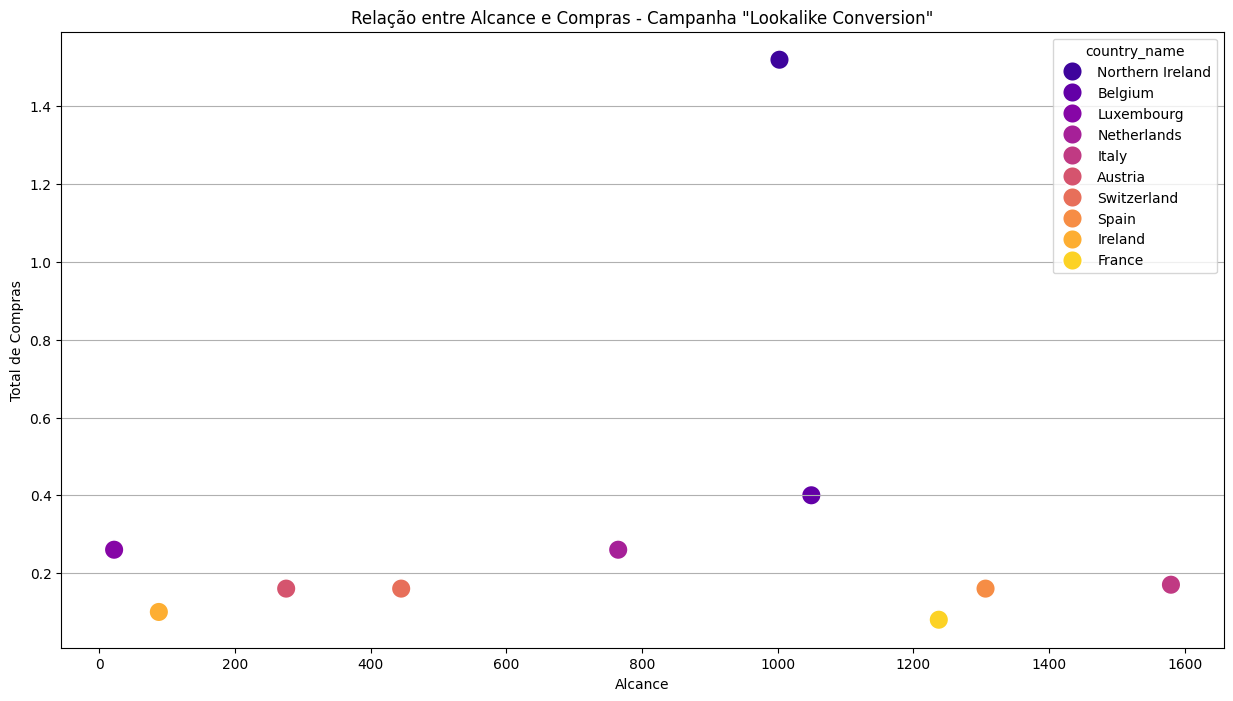

In [196]:
top_10 = grouped_viewed_country.head(10)

plt.figure(figsize=(15, 8))
sns.scatterplot(data=top_10, x='purchase_conversion_value', y='reach_per_population (%)', hue='country_name', palette='plasma', s=200)
plt.title('Relação entre Alcance e Compras - Campanha "Lookalike Conversion"')
plt.ylabel('Total de Compras')
plt.xlabel('Alcance')
plt.grid(axis='y')
plt.show()


C:\Users\Matheus Rodrigues\AppData\Local\Temp\ipykernel_11544\239369599.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_viewed, x='country_name', y='reach_per_population (%)', palette='viridis')


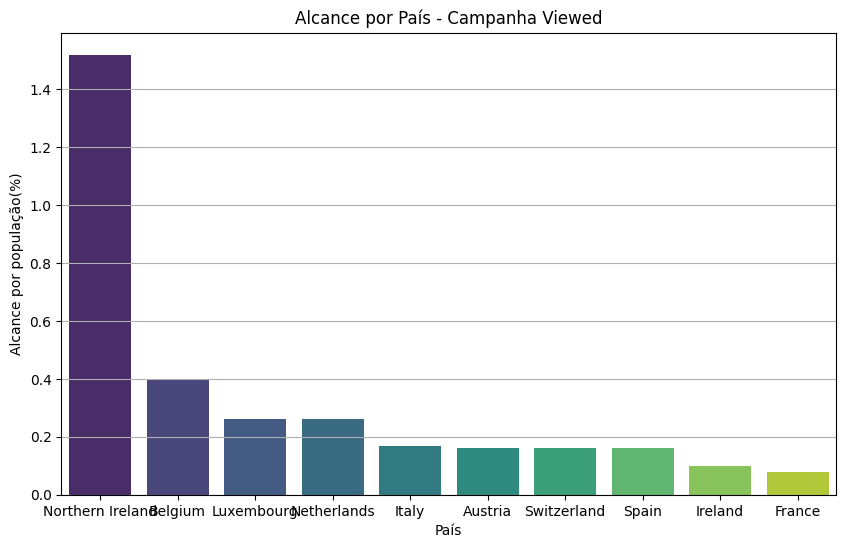

C:\Users\Matheus Rodrigues\AppData\Local\Temp\ipykernel_11544\239369599.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_viewed, x='country_name', y='ctr_all', palette='viridis')


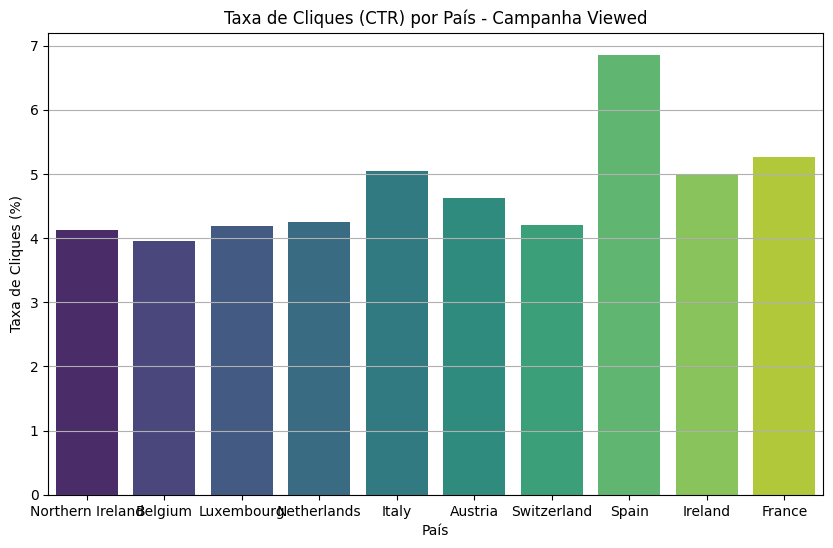

C:\Users\Matheus Rodrigues\AppData\Local\Temp\ipykernel_11544\239369599.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_viewed, x='country_name', y='cpc_link_usd', palette='viridis')


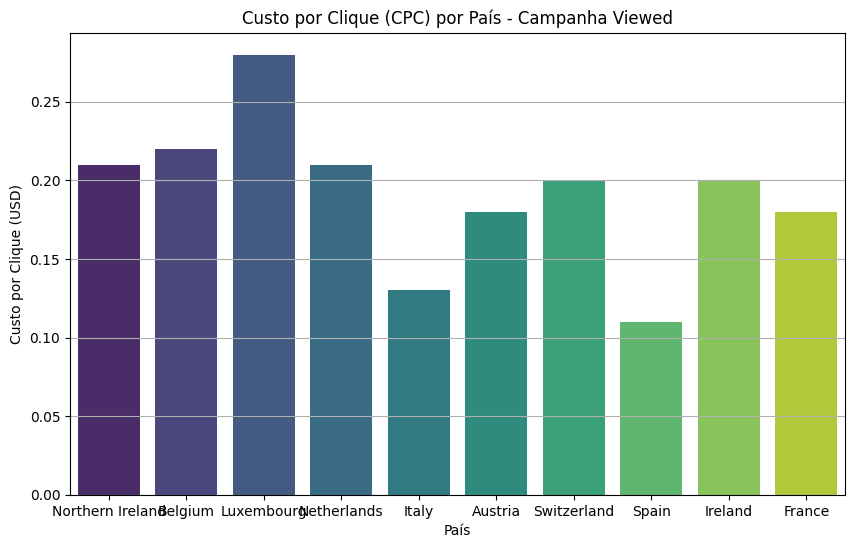

C:\Users\Matheus Rodrigues\AppData\Local\Temp\ipykernel_11544\239369599.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_viewed, x='country_name', y='cpm_usd', palette='viridis')


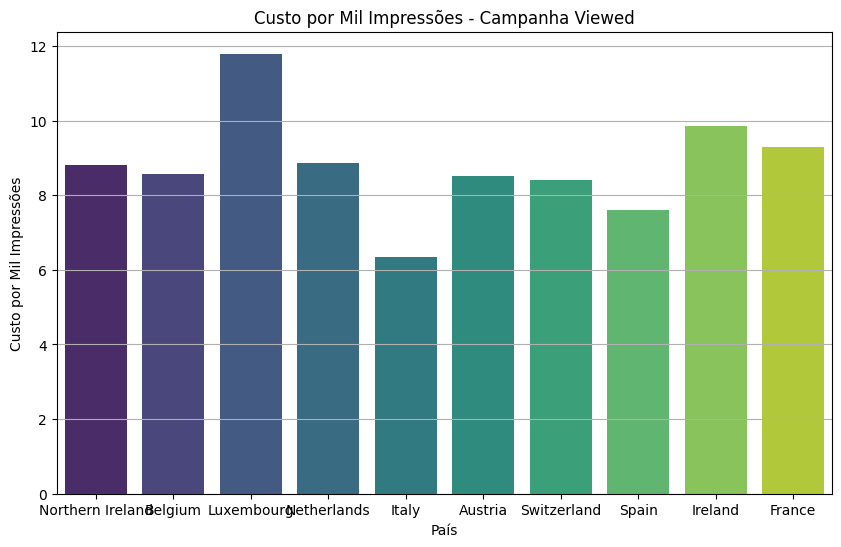

C:\Users\Matheus Rodrigues\AppData\Local\Temp\ipykernel_11544\239369599.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_viewed, x='country_name', y='roi(%)', palette='viridis')


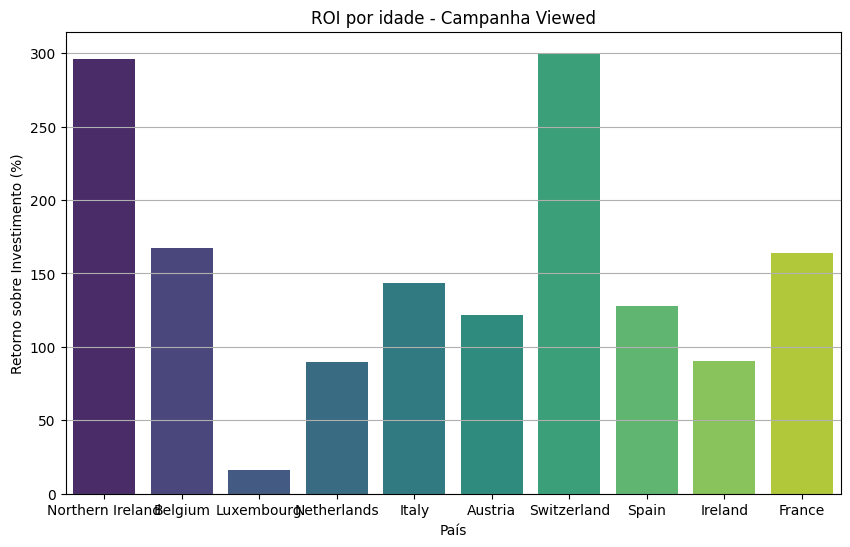

In [82]:
top_10_viewed = grouped_viewed_country.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_viewed, x='country_name', y='reach_per_population (%)', palette='viridis')
plt.title('Alcance por País - Campanha Viewed')
plt.xlabel('País')
plt.ylabel('Alcance por população(%)')
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_viewed, x='country_name', y='ctr_all', palette='viridis')
plt.title('Taxa de Cliques (CTR) por País - Campanha Viewed')
plt.xlabel('País')
plt.ylabel('Taxa de Cliques (%)')
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_viewed, x='country_name', y='cpc_link_usd', palette='viridis')
plt.title('Custo por Clique (CPC) por País - Campanha Viewed')
plt.xlabel('País')
plt.ylabel('Custo por Clique (USD)')
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_viewed, x='country_name', y='cpm_usd', palette='viridis')
plt.title('Custo por Mil Impressões - Campanha Viewed')
plt.xlabel('País')
plt.ylabel('Custo por Mil Impressões')
plt.grid(axis='y')
plt.show()
	
# Gráfico de Barras do ROI por Plataforma
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_viewed, x='country_name', y='roi(%)', palette='viridis')
plt.title('ROI por idade - Campanha Viewed')
plt.xlabel('País')
plt.ylabel('Retorno sobre Investimento (%)')
plt.grid(axis='y')
plt.show()

<h4>Segmentação demoragráfica e geográfica<h4>

In [83]:
segmentation_df_country = by_country_df_refatorado[by_country_df_refatorado['group_campanha'] == 'Segmentação Demográfica e Geográfica']

grouped_segmentation_country = segmentation_df_country.groupby(['country_name', 'group_campanha']).agg({
    'reach': 'sum',
    'link_clicks': 'sum',
    'amount_spent_usd': 'sum',
    'purchase_conversion_value': 'sum',
    'frequency': 'mean',  
    'ctr_all': 'mean',    
    'cpm_usd': 'mean',     
    'cpc_link_usd': 'mean', 
    'population': 'mean'
}).reset_index()

# Calcular o ROI (Retorno sobre Investimento)
grouped_segmentation_country['roi(%)'] = ((grouped_segmentation_country['purchase_conversion_value'] - grouped_segmentation_country['amount_spent_usd']) / grouped_segmentation_country['amount_spent_usd']) * 100
# Calcular o Alcance/Pop
grouped_segmentation_country['reach_per_population (%)'] = (grouped_segmentation_country['reach'] / grouped_segmentation_country['population']) * 100
# Calcular as porcentagens proporcionais
total_amount_spent_segmentation = grouped_segmentation_country['amount_spent_usd'].sum()
total_purchase_value_segmentation = grouped_segmentation_country['purchase_conversion_value'].sum()

grouped_segmentation_country['percentage_amount_spent_usd'] = (grouped_segmentation_country['amount_spent_usd'] / total_amount_spent_segmentation) * 100
grouped_segmentation_country['percentage_purchase_conversion_value'] = (grouped_segmentation_country['purchase_conversion_value'] / total_purchase_value_segmentation) * 100

grouped_segmentation_country = grouped_segmentation_country.loc[grouped_segmentation_country['roi(%)'] > -100.00]
grouped_segmentation_country = grouped_segmentation_country.dropna()

# 8. Selecionar as colunas relevantes
final_columns = [
    'country_name', 'population', 'frequency', 'reach_per_population (%)', 'link_clicks', 'cpc_link_usd', 'cpm_usd',
    'ctr_all', 'amount_spent_usd', 'percentage_amount_spent_usd',
    'purchase_conversion_value', 'percentage_purchase_conversion_value', 'roi(%)'
]

# 9. Ordenar o DataFrame pelas colunas especificadas
grouped_segmentation_country = grouped_segmentation_country[final_columns].round(2).sort_values(
    by=['reach_per_population (%)'], ascending=[False]  # Corrigido: adicionada a vírgula
).reset_index(drop=True)

# 10. Exibir as primeiras linhas do DataFrame final
grouped_segmentation_country.head(10)


,country_name,population,frequency,reach_per_population (%),link_clicks,cpc_link_usd,cpm_usd,ctr_all,amount_spent_usd,percentage_amount_spent_usd,purchase_conversion_value,percentage_purchase_conversion_value,roi(%)
0,Northern Ireland,1885400.0,0.94,1.76,495,0.02,0.76,0.02,31.45,5.69,29.23,5.17,-7.06
1,Netherlands,17231624.0,1.43,0.21,575,0.05,1.29,0.03,54.79,9.91,79.70,14.10,45.46
2,Sweden,10175214.0,1.55,0.17,168,0.16,1.52,0.02,27.05,4.89,79.70,14.10,194.64
3,Switzerland,8513227.0,1.34,0.16,175,0.22,1.24,0.05,17.03,3.08,60.53,10.70,255.43
4,Italy,60421760.0,1.03,0.15,1137,0.31,0.57,0.02,63.24,11.44,49.80,8.81,-21.25
5,France,66977107.0,1.32,0.10,1091,0.05,0.97,0.04,61.27,11.09,24.90,4.40,-59.36
6,Australia,24982688.0,1.34,0.06,81,0.11,0.63,0.01,18.01,3.26,24.01,4.25,33.31
7,Germany,82905782.0,1.30,0.06,710,0.04,1.39,0.05,54.08,9.79,49.80,8.81,-7.91
8,United States,326687501.0,1.32,0.02,964,0.06,1.59,0.07,105.86,19.15,167.77,29.67,58.48


In [9]:
# Plotagem

plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_segmentation_country, x='country_name', y='amount_spent_usd', palette='viridis')
plt.title('Amount spent - Segmentação Demográfica e Geográfica')
plt.xlabel('Idade')
plt.ylabel('Amount spent')
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_segmentation_country, x='country_name', y='reach_per_population (%)', palette='viridis')
plt.title('Alcande por população(%) - Segmentação Demográfica e Geográfica')
plt.xlabel('País')
plt.ylabel('Alcande por população(%)')
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_segmentation_country, x='country_name', y='frequency', palette='viridis')
plt.title('Frequência Média por País - Segmentação Demográfica e Geográfica')
plt.xlabel('País')
plt.ylabel('Frequência Média')
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_segmentation_country, x='country_name', y='ctr_all', palette='viridis')
plt.title('Taxa de Cliques (CTR) por País - Segmentação Demográfica e Geográfica')
plt.xlabel('País')
plt.ylabel('Taxa de Cliques (%)')
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_segmentation_country, x='country_name', y='cpm_usd', palette='viridis')
plt.title('Custo médio por mil impressões - Segmentação Demográfica e Geográfica')
plt.xlabel('País')
plt.ylabel('Custo médio')
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_segmentation_country, x='country_name', y='cpc_link_usd', palette='viridis')
plt.title('Custo por Clique (CPC) por País - Segmentação Demográfica e Geográfica')
plt.xlabel('País')
plt.ylabel('Custo por Clique (USD)')
plt.grid(axis='y')
plt.show()

NameError: name 'plt' is not defined

<h4>Instagram Campanha<h4>

In [85]:
instagram_campaign_country_df = by_country_df_refatorado[by_country_df_refatorado['group_campanha'] == 'Instagram Campanha']

# Agrupando os dados pela coluna 'Platform' e 'group_campanha'
grouped_instagram_country = instagram_campaign_country_df.groupby(['country_name', 'group_campanha']).agg({
    'reach': 'sum',
    'link_clicks': 'sum',
    'amount_spent_usd': 'sum',
    'purchase_conversion_value': 'sum',
    'frequency': 'sum',  # Somando a frequência
    'ctr_all': 'mean',   # Média da taxa de cliques
    'cpm_usd': 'mean',   # Média do CPM
    'cpc_link_usd': 'mean',  # Média do CPC
    'population': 'mean'
}).reset_index()

# Calculando ROI
grouped_instagram_country['roi(%)'] = ((grouped_instagram_country['purchase_conversion_value'] - grouped_instagram_country['amount_spent_usd']) / grouped_instagram_country['amount_spent_usd']) * 100

# Calculando as porcentagens proporcionais
total_amount_spent_instagram = grouped_instagram_country['amount_spent_usd'].sum()
total_purchase_value_instagram = grouped_instagram_country['purchase_conversion_value'].sum()

grouped_instagram_country['percentage_amount_spent_usd'] = (grouped_instagram_country['amount_spent_usd'] / total_amount_spent_instagram) * 100
grouped_instagram_country['percentage_purchase_conversion_value'] = (grouped_instagram_country['purchase_conversion_value'] / total_purchase_value_instagram) * 100

# Arredondar os resultados para 2 casas decimais
grouped_instagram_country = grouped_instagram_country.round(2)

# Exibindo os resultados
grouped_instagram_country.head()

,country_name,group_campanha,reach,link_clicks,amount_spent_usd,purchase_conversion_value,frequency,ctr_all,cpm_usd,cpc_link_usd,population,roi(%),percentage_amount_spent_usd,percentage_purchase_conversion_value
0,United States,Instagram Campanha,2561,13,5.0,0.0,1.0,0.01,1.95,0.38,326687501.0,-100.0,100.0,NaN


Visualizações extras

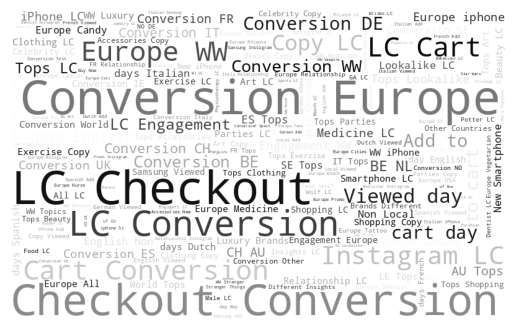

In [102]:
# Remover valores NaN da coluna 'Ad Set Name'
text = " ".join(by_age_df['Ad Set Name'].dropna().astype(str))

# Gerar a WordCloud
wc = WordCloud().generate(text)

wc = WordCloud(background_color='white', colormap = 'binary',
     stopwords = ['meta'], width = 800, height = 500).generate(text)
plt.axis("off")
plt.imshow(wc)

In [148]:
# Calcular a incidência de cada tipo de campanha para cada DataFrame
incidencia_age = by_age_df_refatorado['group_campanha'].value_counts()
incidencia_country = by_country_df_refatorado['group_campanha'].value_counts()
incidencia_platform = by_platform_df_refatorado['group_campanha'].value_counts()

# Criar um DataFrame para armazenar as incidências
incidencia_total = pd.DataFrame({
    'group_campanha': incidencia_age.index,
    'age_count': incidencia_age.values,
    'country_count': incidencia_country.reindex(incidencia_age.index, fill_value=0).values,
    'platform_count': incidencia_platform.reindex(incidencia_age.index, fill_value=0).values
})

# Calcular a média das contagens e arredondar os valores para duas casas decimais
incidencia_total['mean_count'] = incidencia_total[['age_count', 'country_count', 'platform_count']].mean(axis=1).round(2)

# Obter os grupos e os valores
grupo_labels = incidencia_total['group_campanha'].astype(str)  # Labels dos grupos (tipos de campanha)
grupo_valores = incidencia_total['mean_count']  # Valores da média de contagem de campanhas

# Criar o gráfico de barras
fig = go.Figure(data=[
    go.Bar(
        x=grupo_labels,
        y=grupo_valores,
        marker_color='lightskyblue',
        text=grupo_valores, 
        textposition='outside', 
    )
])

# Adicionar título e rótulos
fig.update_layout(
   title='Distribuição Média das Campanhas após Agrupamento',
    title_font=dict(size=20, color='black'), 
    xaxis_title='Tipo de Campanha',
    yaxis_title='Número de Campanhas',
    xaxis_title_font=dict(size=14, color='black'), 
    yaxis_title_font=dict(size=14, color='black'),  
    plot_bgcolor='rgba(240, 240, 240, 0.8)', 
    barmode='group',  
    margin=dict(l=40, r=40, t=40, b=40) 
)

# Exibir o gráfico
fig.show()


In [5]:
data = {
    'country': ['Bélgica', 'Itália', 'Irlanda do Norte'],
    'investment': [4500, 3500, 2000],
}

df = pd.DataFrame(data)

# Adicionando informações do continente
df['continent'] = 'Europa'
df['iso_alpha'] = ['BEL', 'ITA', 'GBR']  # Códigos ISO como exemplo

# Gráfico de treemap focado em investimentos
fig = px.treemap(df, path=[px.Constant("Mundo"), 'continent', 'country'], 
                   values='investment', color='investment', 
                   hover_data=['iso_alpha'],
                   color_continuous_scale='RdBu',
                   color_continuous_midpoint=df['investment'].mean())

# Adiciona rótulos para mostrar o valor do investimento
fig.update_traces(texttemplate="%{label}: %{value}", textfont_size=12)

# Atualiza o layout para ter um aspecto quadrado
fig.update_layout(
    margin=dict(t=50, l=25, r=25, b=25),
    title='Investimentos por País',
)

fig.show()


In [7]:
data = {
    'plataforma': ['Instagram', 'Facebook'],
    'investment': [3000, 7000],
}

df = pd.DataFrame(data)

df['categoria'] = 'Plataforma'
df['iso_alpha'] = ['INS', 'FB']  # Códigos ISO como exemplo

# Gráfico de treemap focado em investimentos
fig = px.treemap(df, path=[px.Constant("Internet"), 'categoria', 'plataforma'], 
                   values='investment', color='investment', 
                   hover_data=['iso_alpha'],
                   color_continuous_scale='RdBu',
                   color_continuous_midpoint=df['investment'].mean())

# Adiciona rótulos para mostrar o valor do investimento
fig.update_traces(texttemplate="%{label}: %{value}", textfont_size=12)

# Atualiza o layout para ter um aspecto quadrado
fig.update_layout(
    margin=dict(t=50, l=25, r=25, b=25),
    title='Investimentos por Plataforma',
)

fig.show()


In [8]:
data = {
    'faixa_etaria': ['18-24', '25-34', '35-44'],
    'investment': [4000, 4000, 1000],
}

df = pd.DataFrame(data)

df['categoria'] = 'Idade'
df['iso_alpha'] = ['18-24', '25-34', '35-44']  # Identificadores para as faixas etárias

# Gráfico de treemap focado em investimentos
fig = px.treemap(df, path=[px.Constant("Mundo"), 'categoria', 'faixa_etaria'], 
                   values='investment', color='investment', 
                   hover_data=['iso_alpha'],
                   color_continuous_scale='RdBu',
                   color_continuous_midpoint=df['investment'].mean())

# Adiciona rótulos para mostrar o valor do investimento
fig.update_traces(texttemplate="%{label}: %{value}", textfont_size=12)

# Atualiza o layout para ter um aspecto quadrado
fig.update_layout(
    margin=dict(t=50, l=25, r=25, b=25),
    title='Investimentos por Faixa Etária',

)

fig.show()
